In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopy
from geopy.geocoders import Nominatim
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from scipy.stats import chi2_contingency
from collections import Counter

/Users/Isha/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Read CSV files from data folder and store in dataframes
hackathons_webscraped = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/hackathons_webscraped_cleaned.csv')
hackathons = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/hackathons_modified.csv')
hackathons_post_stats = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/hackathons_post_stats.csv')
projects = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/projects_modified.csv')
participants_expanded = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/participants_expanded_post_inference.csv')

In [3]:
# Columns of each loaded dataframe
print('hackathons columns: ',hackathons.columns)
print('hackathons_webscraped columns: ',hackathons_webscraped.columns)
print('participants_expanded columns: ',participants_expanded.columns)
print('projects columns: ',projects.columns)

hackathons columns:  Index(['Unnamed: 0', 'URL', 'Criteria', 'schedule', 'hack_type', 'info',
       'start_date_format', 'end_date_format', 'Prizes', 'prize_money', 'Id',
       'Title', 'Location', 'start_date', 'end_date', 'year', 'themes',
       'prize', 'registered_N', 'featured', 'organization_name',
       'winners_announced', 'submission_gallery_url',
       'start_a_submission_url'],
      dtype='object')
hackathons_webscraped columns:  Index(['Unnamed: 0', 'Subtitles', 'Sponsors', 'Tags', 'Judges',
       'Judging Criteria', 'Eligibility', 'Requirements', 'URL',
       'Cleaned_Sponsors', 'Cleaned_Judges', 'Cleaned_Eligibility',
       'Cleaned_Requirements'],
      dtype='object')
participants_expanded columns:  Index(['Unnamed: 0.1', 'Unnamed: 0', 'url', 'name', 'website', 'github',
       'twitter', 'address', 'skills', 'interests', 'projects', 'hackathons',
       'cleaned_names', 'Gender', 'genderize.io', 'Gender Probability',
       'Genderize.io Probability'],
      d

In [4]:
# Removing unnecessary columns from dataframes
del hackathons_webscraped['Unnamed: 0']
del hackathons['Unnamed: 0']
del participants_expanded['Unnamed: 0.1']
del participants_expanded['Unnamed: 0']
del projects['Unnamed: 0']
del participants_expanded['website']
del participants_expanded['github']
del participants_expanded['twitter']
del participants_expanded['address']

Transferring columns from hackathons_webscraped to hackathons df so that it is all combined in one df, easier for exploration. Transferred columns are - 'Subtitles', 'Judging Criteria', 'Cleaned_Sponsors', 'Cleaned_Judges', 'Cleaned_Eligibility', 'Cleaned_Requirements'

In [5]:
# Columns being transferred from hackathons_webscraped to hackathons are - 'Subtitles', 'Judging Criteria', 'Cleaned_Sponsors', 'Cleaned_Judges', 'Cleaned_Eligibility', 'Cleaned_Requirements'

hackathons['Subtitles'] = hackathons_webscraped['Subtitles']
hackathons['Sponsors'] = hackathons_webscraped['Cleaned_Sponsors']
hackathons['Judges'] = hackathons_webscraped['Cleaned_Judges']
hackathons['Eligibility'] = hackathons_webscraped['Cleaned_Eligibility']
hackathons['Requirements'] = hackathons_webscraped['Cleaned_Requirements']

# Rename column 'Criteria' to 'Judging Criteria'
hackathons = hackathons.rename(columns={'Criteria': 'Judging Criteria'})

print('hackathons columns: ',hackathons.columns)

hackathons columns:  Index(['URL', 'Judging Criteria', 'schedule', 'hack_type', 'info',
       'start_date_format', 'end_date_format', 'Prizes', 'prize_money', 'Id',
       'Title', 'Location', 'start_date', 'end_date', 'year', 'themes',
       'prize', 'registered_N', 'featured', 'organization_name',
       'winners_announced', 'submission_gallery_url', 'start_a_submission_url',
       'Subtitles', 'Sponsors', 'Judges', 'Eligibility', 'Requirements'],
      dtype='object')


In [6]:
participants_expanded.head(20)

url                name  \
0        https://devpost.com/CraigHiller        Craig Hiller   
1           https://devpost.com/asheleby      Andrew Sheleby   
2          https://devpost.com/evanho239             Evan Ho   
3            https://devpost.com/brilamb           Brian Lam   
4          https://devpost.com/linpeng06            lin peng   
5           https://devpost.com/Dendygar        Denis Mukhin   
6      https://devpost.com/FarnazFooladi      Farnaz Fooladi   
7             https://devpost.com/Farnad    Farnad Jahanshah   
8           https://devpost.com/BookSock        Jason Seibel   
9          https://devpost.com/cathyjiao          Cathy Jiao   
10          https://devpost.com/YichenLu           Yichen Lu   
11        https://devpost.com/jorgec4444       Jorge Vinagre   
12       https://devpost.com/MariaMangru  MariaMangru Mangru   
13          https://devpost.com/YunChuan      Yun Chuan Ngin   
14  https://devpost.com/AbdullahAlhutami   Abdullah Alhutami   
15    https://devpost.com/mariamsinger08       Mariam Singer   
16          https://devpost.com/bonnieli           Bonnie Li   
17          https://devpost.com/prasang7      Prasang Sharma   
18           https://devpost.com/Crashnb             Crashnb   
19    https://devpost.com/lakshmidevi777        Lakshmi Devi   

                                               skills  \
0                                                 NaN   
1          wordpress|python|tableau|excel|Blockchain|   
2   java|c++|javascript|angular.js|css|html|Blockc...   
3                                    java|javascript|   
4   android|javascript|php|java|ios|jquery|css|htm...   
5                                                 NaN   
6                              python|c++|html5|css3|   
7                                         c#|mongodb|   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                          python|java|c|c++|pandas|   
12            python|javascript|html5|css3|bootstrap|   
13                                                NaN   
14            html|php|asp.net|css|jquery|javascript|   
15                                                NaN   
16                                               web|   
17  android|react-native|redux|javascript|photosho...   
18                                                NaN   
19                    javascript|html5|python|c#|sql|   

                                            interests  \
0                                                 NaN   
1   AR/VR|Blockchain|Communication|Cybersecurity|D...   
2   Beginner Friendly|Blockchain|Cybersecurity|Des...   
3   Communication|Cybersecurity|Gaming|IoT|Machine...   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                           Machine Learning/AI|Web|   
12  Beginner Friendly|Communication|DevOps|E-comme...   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18                                                NaN   
19                                                NaN   

                                             projects  \
0                 https://devpost.com/software/googme   
1           https://devpost.com/software/helpr-27tjik   
2       https://devpost.com/software/untitled-for-now   
3   https://devpost.com/software/the-hummingbird-p...   
4          

### Cleaning the skills and interests column

In [7]:
participants_expanded[['skills','interests']]

skills  \
0                                                    NaN   
1             wordpress|python|tableau|excel|Blockchain|   
2      java|c++|javascript|angular.js|css|html|Blockc...   
3                                       java|javascript|   
4      android|javascript|php|java|ios|jquery|css|htm...   
...                                                  ...   
56490  python|java|react|react-native|firebase|c#|nod...   
56491                                   mac|web|windows|   
56492                                                NaN   
56493  web|react|python|flask|html5|websockets|node.j...   
56494                               java|c++|Blockchain|   

                                               interests  
0                                                    NaN  
1      AR/VR|Blockchain|Communication|Cybersecurity|D...  
2      Beginner Friendly|Blockchain|Cybersecurity|Des...  
3      Communication|Cybersecurity|Gaming|IoT|Machine...  
4                                                    NaN  
...                                                  ...  
56490  AR/VR|Blockchain|E-commerce/Retail|Fintech|Mac...  
56491                                                NaN  
56492                                                NaN  
56493  Beginner Friendly|Design|Education|Health|Mach...  
56494  AR/VR|Blockchain|Cybersecurity|DevOps|IoT|Life...  

[56495 rows x 2 columns]

In [8]:
# Define a function to convert the column to a list
def convert_to_list(x):
    if pd.isna(x):
        return []
    return x.split('|')

# Apply the function to the skills and interests columns
participants_expanded['skills'] = participants_expanded['skills'].apply(convert_to_list)
participants_expanded['interests'] = participants_expanded['interests'].apply(convert_to_list)

# Display the updated DataFrame
participants_expanded[['skills', 'interests']]

skills  \
0                                                     []   
1      [wordpress, python, tableau, excel, Blockchain, ]   
2      [java, c++, javascript, angular.js, css, html,...   
3                                   [java, javascript, ]   
4      [android, javascript, php, java, ios, jquery, ...   
...                                                  ...   
56490  [python, java, react, react-native, firebase, ...   
56491                              [mac, web, windows, ]   
56492                                                 []   
56493  [web, react, python, flask, html5, websockets,...   
56494                          [java, c++, Blockchain, ]   

                                               interests  
0                                                     []  
1      [AR/VR, Blockchain, Communication, Cybersecuri...  
2      [Beginner Friendly, Blockchain, Cybersecurity,...  
3      [Communication, Cybersecurity, Gaming, IoT, Ma...  
4                                                     []  
...                                                  ...  
56490  [AR/VR, Blockchain, E-commerce/Retail, Fintech...  
56491                                                 []  
56492                                                 []  
56493  [Beginner Friendly, Design, Education, Health,...  
56494  [AR/VR, Blockchain, Cybersecurity, DevOps, IoT...  

[56495 rows x 2 columns]

### Number of hackathons and projects the participants have been involved in

In [9]:
# Count the number of projects
participants_expanded['num_projects'] = participants_expanded['projects'].fillna("").apply(
    lambda x: len(x.split(",")) if x else 0
)

# Count the number of hackathons
participants_expanded['num_hackathons'] = participants_expanded['hackathons'].fillna("").apply(
    lambda x: len(x.split(",")) if x else 0
)

# Display the results
print(participants_expanded[['name', 'num_projects', 'num_hackathons']])
print("Descriptive Statistics for Number of Projects engaged in by Participants:")
print(participants_expanded['num_projects'].describe())

print("Descriptive Statistics for Number of Hackathons engaged in by Participants:")
print(participants_expanded['num_hackathons'].describe())


                   name  num_projects  num_hackathons
0          Craig Hiller             1               1
1        Andrew Sheleby             1               1
2               Evan Ho             1               1
3             Brian Lam             4               4
4              lin peng             1               1
...                 ...           ...             ...
56490     Mike Dimitrov             1               1
56491  Baiyun (Ben) Gao             1               1
56492       Everet Siew             1               1
56493  Amulya Garimella             1               1
56494  Dairon Rodriguez             1               1

[56495 rows x 3 columns]
Descriptive Statistics for Number of Projects engaged in by Participants:
count    56495.000000
mean         1.365838
std          1.338204
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         66.000000
Name: num_projects, dtype: float64
Descriptive Statistics for Number of Hack

### 1) Registered participants of hackathons described and visualised 

In [10]:
print("Descriptive Statistics for Number of Registered Participants:")
print(hackathons['registered_N'].describe())

Descriptive Statistics for Number of Registered Participants:
count     7053.000000
mean       142.314193
std        432.513814
min          0.000000
25%         24.000000
50%         60.000000
75%        143.000000
max      18701.000000
Name: registered_N, dtype: float64


/Users/Isha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


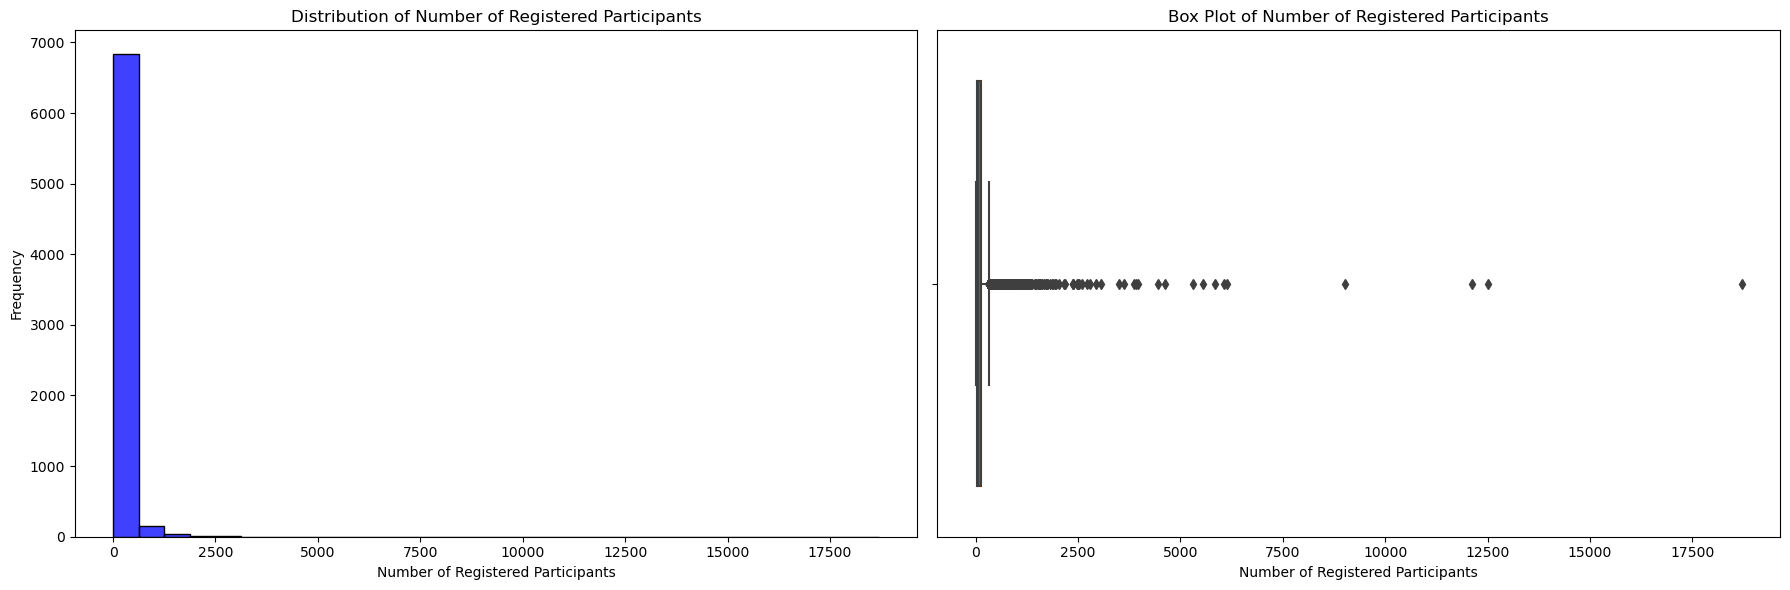

In [11]:
# Visualising registered_N using descriptive stats

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Histogram
sns.histplot(hackathons['registered_N'], kde=False, bins=30, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Number of Registered Participants")
axes[0].set_xlabel("Number of Registered Participants")
axes[0].set_ylabel("Frequency")

# Box Plot
sns.boxplot(x=hackathons['registered_N'], ax=axes[1])
axes[1].set_title("Box Plot of Number of Registered Participants")
axes[1].set_xlabel("Number of Registered Participants")

plt.tight_layout()
plt.show()

### <span style='color:Green'> Feedback:cut off the top 10% so that it shows the most relevant but mention in report that you did that </span>

/Users/Isha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


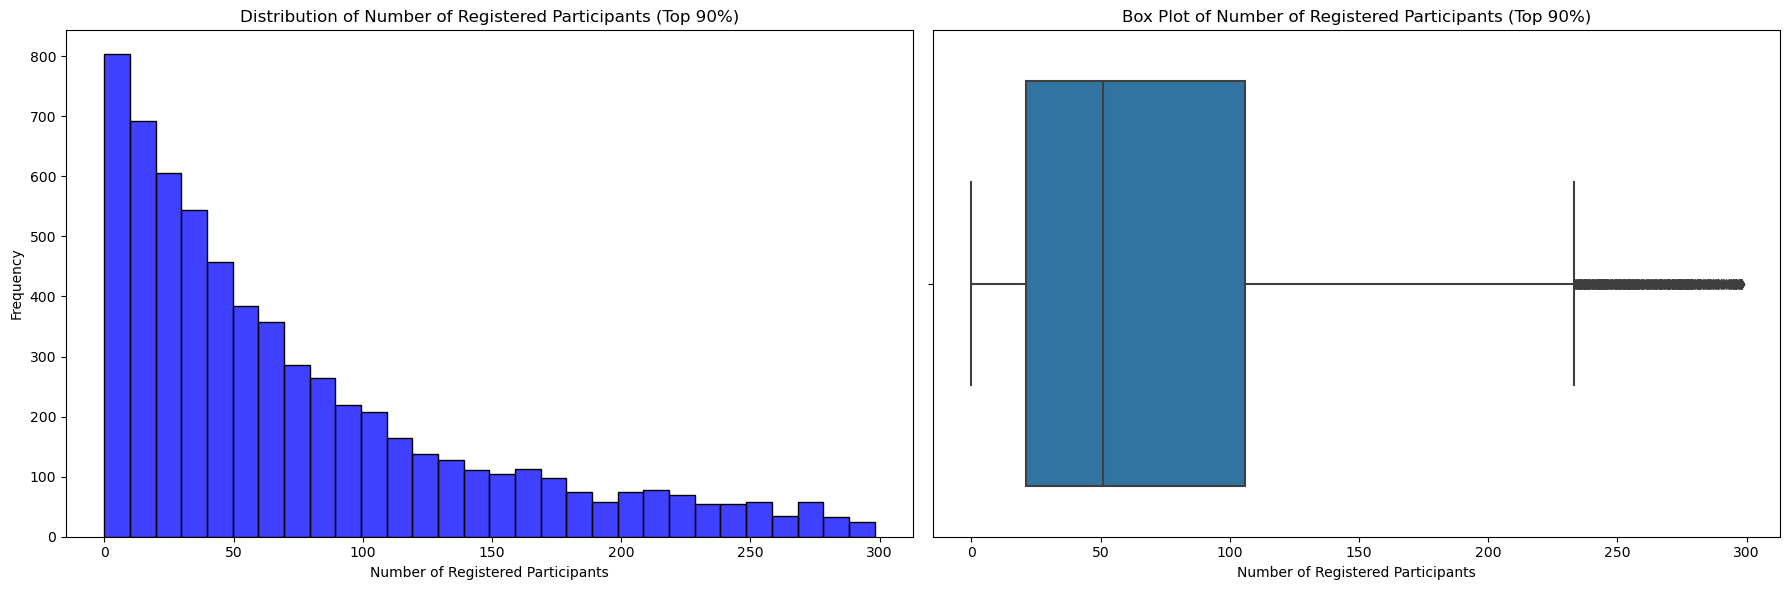

count    6348.000000
mean       74.352237
std        69.753608
min         0.000000
25%        21.000000
50%        51.000000
75%       106.000000
max       298.000000
Name: registered_N, dtype: float64

In [12]:
## APPROACH 1: CUT OFF THE TOP 10%
# Calculate the threshold to cut off the top 10% of the data
threshold_regN = hackathons['registered_N'].quantile(0.90)
filtered_data_regN = hackathons[hackathons['registered_N'] <= threshold_regN]

# Visualizing the filtered data
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Histogram
sns.histplot(filtered_data_regN['registered_N'], kde=False, bins=30, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Number of Registered Participants (Top 90%)")
axes[0].set_xlabel("Number of Registered Participants")
axes[0].set_ylabel("Frequency")

# Box Plot
sns.boxplot(x=filtered_data_regN['registered_N'], ax=axes[1])
axes[1].set_title("Box Plot of Number of Registered Participants (Top 90%)")
axes[1].set_xlabel("Number of Registered Participants")

plt.tight_layout()
plt.show()

filtered_data_regN['registered_N'].describe()

Insights:

- The majority of hackathons have fewer than 100 participants.
- There is a long tail in the distribution, indicating that while most hackathons have lower participation, a few still have high numbers.
- Removing the top 10% reduces the impact of outliers, making it easier to see the central tendency and variability of the bulk of the data.

/Users/Isha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


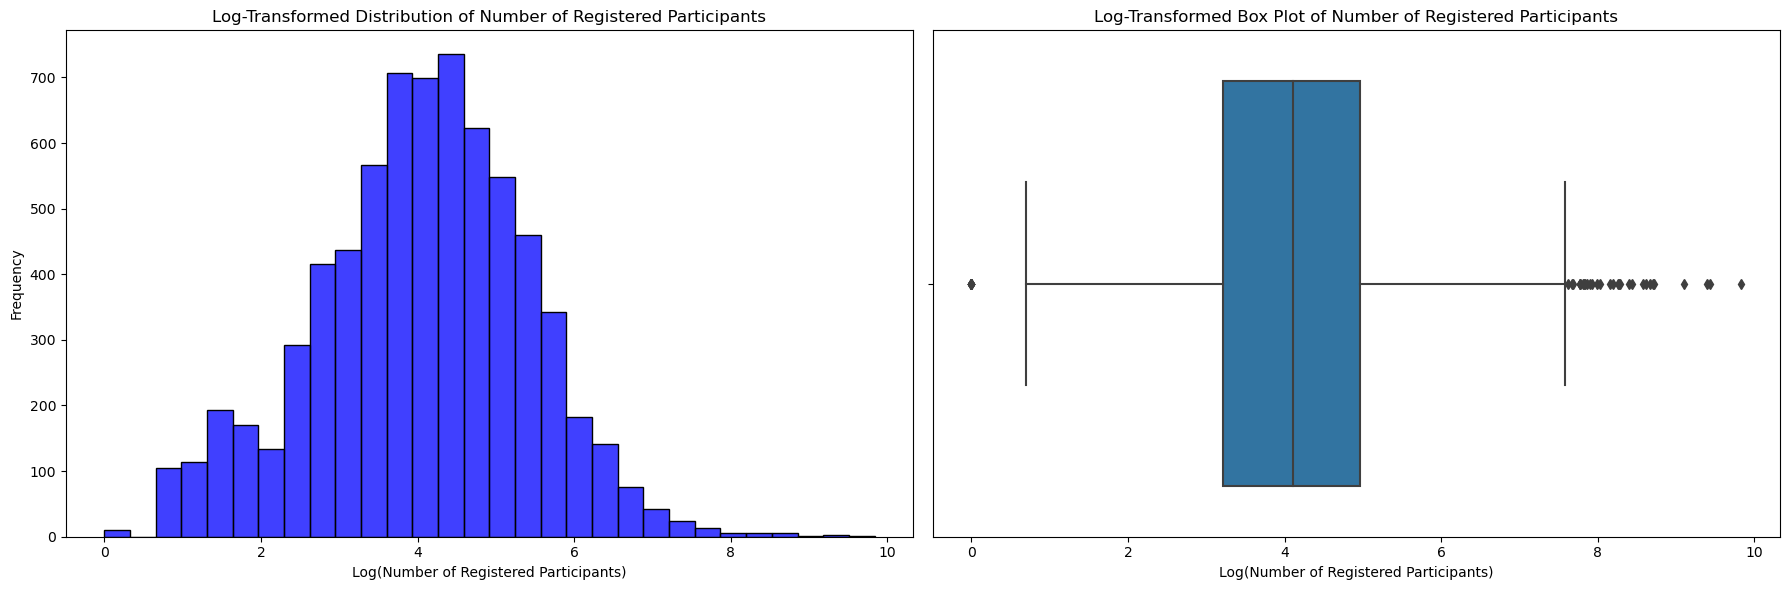

In [13]:
## APPROACH 2: Log Transformation: Apply a log transformation to the data to compress the range of values and make the distribution more interpretable

# Apply log transformation to the data
log_registered_N = np.log1p(hackathons['registered_N'])

# Visualizing the log-transformed data
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Histogram
sns.histplot(log_registered_N, kde=False, bins=30, ax=axes[0], color='blue')
axes[0].set_title("Log-Transformed Distribution of Number of Registered Participants")
axes[0].set_xlabel("Log(Number of Registered Participants)")
axes[0].set_ylabel("Frequency")

# Box Plot
sns.boxplot(x=log_registered_N, ax=axes[1])
axes[1].set_title("Log-Transformed Box Plot of Number of Registered Participants")
axes[1].set_xlabel("Log(Number of Registered Participants)")

plt.tight_layout()
plt.show()


The log-transformed data shows a more normal distribution.
This transformation helps to visualize and analyze data that spans several orders of magnitude.
It is useful for making the data more comparable and for mitigating the effect of extreme values.

/Users/Isha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


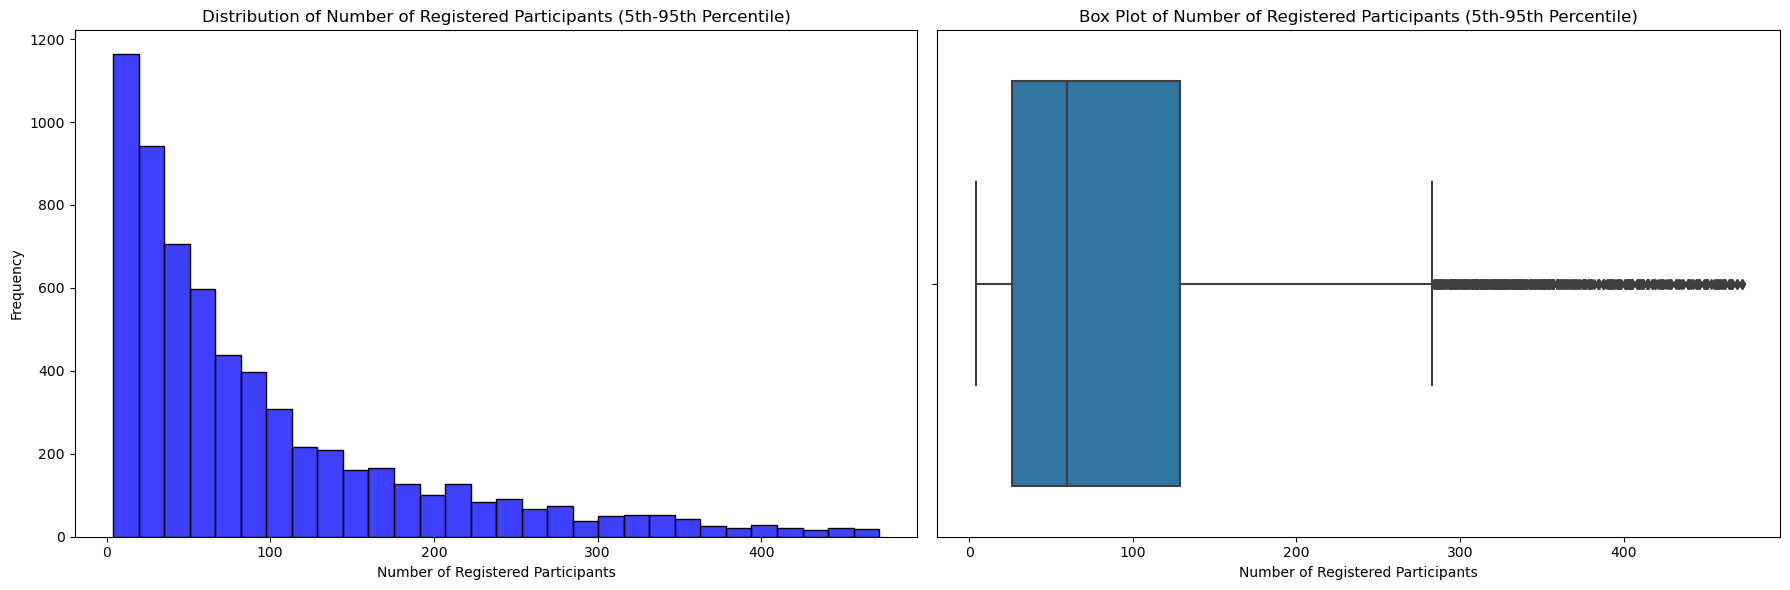

In [14]:
## APPROACH 3: Focus on Different Percentile: Instead of cutting off a specific percentage, you could focus on visualizing a specific percentile range, such as the 5th to 95th percentiles.

# Define the percentile range
lower_percentile = 0.05
upper_percentile = 0.95
lower_threshold = hackathons['registered_N'].quantile(lower_percentile)
upper_threshold = hackathons['registered_N'].quantile(upper_percentile)
percentile_filtered_data = hackathons[(hackathons['registered_N'] >= lower_threshold) & 
                                      (hackathons['registered_N'] <= upper_threshold)]

# Visualizing the percentile filtered data
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Histogram
sns.histplot(percentile_filtered_data['registered_N'], kde=False, bins=30, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Number of Registered Participants (5th-95th Percentile)")
axes[0].set_xlabel("Number of Registered Participants")
axes[0].set_ylabel("Frequency")

# Box Plot
sns.boxplot(x=percentile_filtered_data['registered_N'], ax=axes[1])
axes[1].set_title("Box Plot of Number of Registered Participants (5th-95th Percentile)")
axes[1].set_xlabel("Number of Registered Participants")

plt.tight_layout()
plt.show()


Insights:

- The distribution is more concentrated and less influenced by outliers on both ends.
- This approach allows you to focus on the majority of the data without the influence of the very smallest or largest values.
- The majority of hackathons fall within a certain range, with most having fewer than 300 participants.

**Recommendation:**
Depending on your objective, you can choose the appropriate approach:

- Use the top 90% cutoff if you want to eliminate extreme outliers and focus on the main bulk of the data.
- Use log transformation if you need to normalize the data for statistical analysis.
- Use the percentile focus if you want a balanced view of the central part of the data, excluding both low and high extremes.

### 2) Gender distribution and hackathons

Gender Distribution in Hackathons:
Gender
m          39617
f          13684
unknown     3194
Name: count, dtype: int64


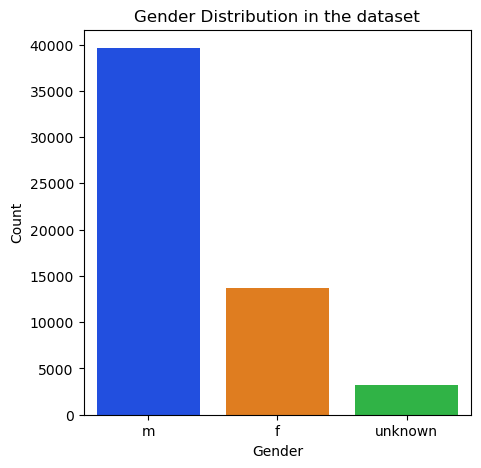

Number of Hackathons by Gender:
Gender
f          3866
m          4900
unknown    1875
Name: hackathons_list, dtype: int64


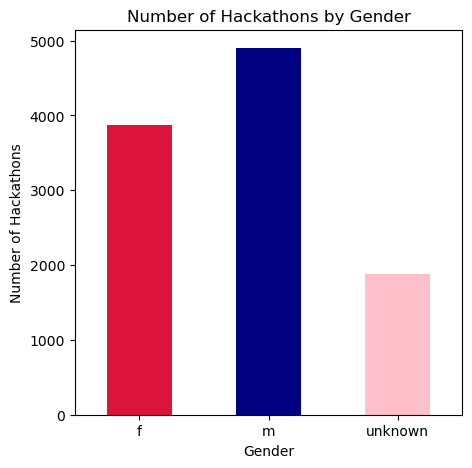

In [15]:
# Ensure the relevant columns are present in the dataset
if 'Gender' in participants_expanded.columns and 'hackathons' in participants_expanded.columns:
    
    # Gender distribution in dataset - calculates the count of each gender in the dataset 
    gender_distribution = participants_expanded['Gender'].value_counts() 
    print("Gender Distribution in Hackathons:")
    print(gender_distribution)
    
    # Plotting the gender distribution
    plt.figure(figsize=(5, 5))
    sns.countplot(x='Gender', data=participants_expanded, palette='bright')
    plt.title("Gender Distribution in the dataset")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()
    
    # Exploding the hackathons column to find the number of hackathons by gender
    participants_expanded['hackathons_list'] = participants_expanded['hackathons'].str.split(',')
    participants_expanded_exploded = participants_expanded.explode('hackathons_list')
    
    # Number of hackathons by gender
    hackathons_by_gender = participants_expanded_exploded.groupby('Gender')['hackathons_list'].nunique()
    print("Number of Hackathons by Gender:")
    print(hackathons_by_gender)
    
    # Plotting the number of hackathons by gender
    plt.figure(figsize=(5, 5))
    hackathons_by_gender.plot(kind='bar', color=['crimson', 'navy', 'pink', 'orange'])
    plt.title("Number of Hackathons by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Number of Hackathons")
    plt.xticks(rotation=0)
    plt.show()

    
else:
    print("The required columns ('Gender' and 'hackathons') are not present in the dataset.")

***Explaining the code above:***
Check Columns: Ensure the Gender and hackathons columns are present in the participants_expanded dataframe.
Gender Distribution: Calculate and print the gender distribution using value_counts(), and plot it using a count plot.
Explode Hackathons List: Split the hackathons column into a list and then explode it to analyze the number of unique hackathons attended by each gender.
Number of Hackathons by Gender: Calculate the number of unique hackathons attended by each gender using groupby and nunique(), then plot it using a bar plot.

### 2a) Exploring the distribution of m:f:unknown for each hackathon

In [16]:
    
# Group by hackathon URL and Gender and count unique participants
grouped_counts = participants_expanded_exploded.groupby(['hackathons_list', 'Gender']).size().reset_index(name='count')

# Pivot the counts
pivoted_counts = grouped_counts.pivot(index='hackathons_list', columns='Gender', values='count').fillna(0)

# Rename columns
pivoted_counts = pivoted_counts.rename(columns={'f': 'females_participating', 
                                                'm': 'males_participating',
                                                'unknown': 'unknown_gender_participating'})

# Step 4: Merge with the hackathons DataFrame
hackathons = hackathons.merge(pivoted_counts, left_on='URL', right_index=True, how='left')

# Step 5: Validation (optional)
hackathons['total_participating'] = hackathons[['females_participating', 'males_participating', 'unknown_gender_participating']].sum(axis=1)

hackathons['is_valid'] = hackathons['total_participating'] == hackathons['registered_N']

# Drop the validation columns for the final result
hackathons = hackathons.drop(columns=['total_participating', 'is_valid'])

# Final result
hackathons

URL  \
0         https://wirvsvirushackathon.devpost.com/   
1               https://theglobalhack.devpost.com/   
2                   https://supernova.devpost.com/   
3               https://hajjhackathon.devpost.com/   
4         https://chainlinkspring2022.devpost.com/   
...                                            ...   
7048           https://checkinproject.devpost.com/   
7049                  https://fgtfrgf.devpost.com/   
7050                https://old-hacks.devpost.com/   
7051  https://thailand-champion-13627.devpost.com/   
7052        https://manager-hackathon.devpost.com/   

                                       Judging Criteria     schedule  \
0     Gesellschaftlicher Mehrwert, Innovationsgrad, ...  no schedule   
1     Potential impact of the project, Technical exe...  no schedule   
2     X Factor and Potential, Technical Competence, ...  no schedule   
3     Design           |             التصميم, Simpli...  no schedule   
4     User Experience / User Interface, Originality ...  no schedule   
...                                                 ...          ...   
7048                                              biden  no schedule   
7049                   Criteria 1, Criteria 1, criteria  no schedule   
7050                                                TBA  no schedule   
7051                                              biden  no schedule   
7052                                     Firts criteria  no schedule   

     hack_type                                               info  \
0       Public  Mar 29, 2020, Online, Public, Social Good     ...   
1       Public             Apr 12, 2020, Online, Public, COVID-19   
2       Public  Jul 11, 2022, Online, Public, DFINITY Foundati...   
3       Public  Aug 3, 2018, Jeddah International Exhibition &...   
4       Public  Jun 8, 2022, Online, Public, Chainlink Labs, B...   
...        ...                                                ...   
7048    Public  Aug 30, 2021, Thái Lan, Public, ACM Monterrey,...   
7049    Public  Jul 15, 2021, Online, Public, Dong Trinh LTD, ...   
7050    Public  May 7, 2021, Quận 2, Vietnam, Public, Hackers ...   
7051    Public  Sep 15, 2021, Thái Lan, Public, Screen Compose...   
7052    Public  Aug 9, 2021, Việt Nam, Public, Girls Who Code ...   

     start_date_format end_date_format  \
0           2020-03-20      2020-03-22   
1           2020-04-03      2020-04-09   
2           2022-05-10      2022-06-22   
3           2018-08-01      2018-08-03   
4           2022-04-22      2022-05-28   
...                ...             ...   
7048        2021-08-30      2021-08-30   
7049        2021-07-15      2021-07-15   
7050        2021-05-07      2021-05-07   
7051        2021-09-15      2021-09-15   
7052        2021-08-09      2021-08-09   

                                                 Prizes     prize_money  \
0     Euer Preis ist Anerkennung und Ehre!, Habt Spa...  no money prize   
1                                        Overall Winner  no money prize   
2     SocialFi - 1ST PLACE, SocialFi - 2ND PLACE, So...        $765,000   
3     1st place: 1 million Saudi Riyal (15% equity i...    SAR2,000,000   
4     Chainlink Grand Prize - $40,000, Chainlink NFT...      $1,019,000   
...                                                 ...             ...   
7048                                         cash value          $1,000   
7049               1st place, 2nd place, 3rd place, 4nd          $1,100   
7050                                                TBA  no money prize   
7051                                      Thailand cash            $100   
7052                                                  1              $1   

         Id  ...                             submission_gallery_url  \
0      9683  ...  https://wirvsvirushackathon.devpost.com/projec...   
1      9854  ...  https://theglobalhack.devpost.com/project-gallery   
2     13738  ...      https://supernova.devpost.com/project-gallery   
3      6815  .

***Explaining the code above***:
Explode Hackathons Column: Ensure the hackathons column is split into a list and then exploded to create individual rows for each hackathon a participant has attended.
Group and Count: Group by hackathons_list (individual hackathon URLs) and Gender, then count the occurrences.
Pivot Counts: Pivot the counts to create a wide format dataframe where each row corresponds to a hackathon and columns represent the count of participants by gender.
Merge with Hackathons: Merge this pivoted dataframe with the hackathons dataframe on the URL.
Validation (Optional): Add a validation step to ensure the sum of participants matches the registered_N column. Drop these validation columns for the final result.
Rename Final DataFrame: Rename final_df back to hackathons to keep the original name.

In [17]:
hackathons[['females_participating', 'males_participating',
       'unknown_gender_participating','registered_N','URL']]

females_participating  males_participating  \
0                     193.0                479.0   
1                      99.0                239.0   
2                       8.0                 48.0   
3                     116.0                287.0   
4                      14.0                 70.0   
...                     ...                  ...   
7048                    NaN                  NaN   
7049                    NaN                  NaN   
7050                    NaN                  NaN   
7051                    NaN                  NaN   
7052                    NaN                  NaN   

      unknown_gender_participating  registered_N  \
0                             31.0         12505   
1                             23.0          6059   
2                              1.0          3633   
3                             19.0          2935   
4                              1.0          1481   
...                            ...           ...   
7048                           NaN             1   
7049                           NaN             1   
7050                           NaN             1   
7051                           NaN             0   
7052                           NaN             0   

                                               URL  
0         https://wirvsvirushackathon.devpost.com/  
1               https://theglobalhack.devpost.com/  
2                   https://supernova.devpost.com/  
3               https://hajjhackathon.devpost.com/  
4         https://chainlinkspring2022.devpost.com/  
...                                            ...  
7048           https://checkinproject.devpost.com/  
7049                  https://fgtfrgf.devpost.com/  
7050                https://old-hacks.devpost.com/  
7051  https://thailand-champion-13627.devpost.com/  
7052        https://manager-hackathon.devpost.com/  

[7053 rows x 5 columns]

From this it is clear that the registered_N may not be equal to the number of people who actually ended up participating and submitting something. Thus, creating another column that is called actual_participants_N which is a sum of the values of females_participating + males_participating + unknown_gender_participating:

In [18]:
# Creating the actual_participants_N column
hackathons['actual_participants_N'] = (
    hackathons['females_participating'].fillna(0) +
    hackathons['males_participating'].fillna(0) +
    hackathons['unknown_gender_participating'].fillna(0)
)

# Displaying the result
hackathons[['females_participating', 'males_participating',
                 'unknown_gender_participating', 'registered_N',
                 'actual_participants_N', 'URL']]

females_participating  males_participating  \
0                     193.0                479.0   
1                      99.0                239.0   
2                       8.0                 48.0   
3                     116.0                287.0   
4                      14.0                 70.0   
...                     ...                  ...   
7048                    NaN                  NaN   
7049                    NaN                  NaN   
7050                    NaN                  NaN   
7051                    NaN                  NaN   
7052                    NaN                  NaN   

      unknown_gender_participating  registered_N  actual_participants_N  \
0                             31.0         12505                  703.0   
1                             23.0          6059                  361.0   
2                              1.0          3633                   57.0   
3                             19.0          2935                  422.0   
4                              1.0          1481                   85.0   
...                            ...           ...                    ...   
7048                           NaN             1                    0.0   
7049                           NaN             1                    0.0   
7050                           NaN             1                    0.0   
7051                           NaN             0                    0.0   
7052                           NaN             0                    0.0   

                                               URL  
0         https://wirvsvirushackathon.devpost.com/  
1               https://theglobalhack.devpost.com/  
2                   https://supernova.devpost.com/  
3               https://hajjhackathon.devpost.com/  
4         https://chainlinkspring2022.devpost.com/  
...                                            ...  
7048           https://checkinproject.devpost.com/  
7049                  https://fgtfrgf.devpost.com/  
7050                https://old-hacks.devpost.com/  
7051  https://thailand-champion-13627.devpost.com/  
7052        https://manager-hackathon.devpost.com/  

[7053 rows x 6 columns]

**Thus, we can remove the rows of hackathons that have 0 actual participants since they will not contribute to our analysis**

In [19]:
# Removing the rows of hackathons that have 0 actual participants
count_zero_or_nan = ((hackathons['actual_participants_N'] == 0) | (hackathons['actual_participants_N'].isna())).sum()

print(count_zero_or_nan)

# Remove rows where actual_participants_N is 0 or NaN
hackathons = hackathons[(hackathons['actual_participants_N'] != 0) & (~hackathons['actual_participants_N'].isna())]

1939


After removing all hackathons that had 0 participants, we are left with **5114 hackathons (out of the initial 7053 hackathons - 1939 removed.)**.There are some hackathons that have just one participant too.

Descriptive Statistics for Actual Participants:
count    5114.000000
mean       15.061205
std        26.317927
min         1.000000
25%         4.000000
50%         8.000000
75%        17.000000
max       834.000000
Name: actual_participants_N, dtype: float64


/Users/Isha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


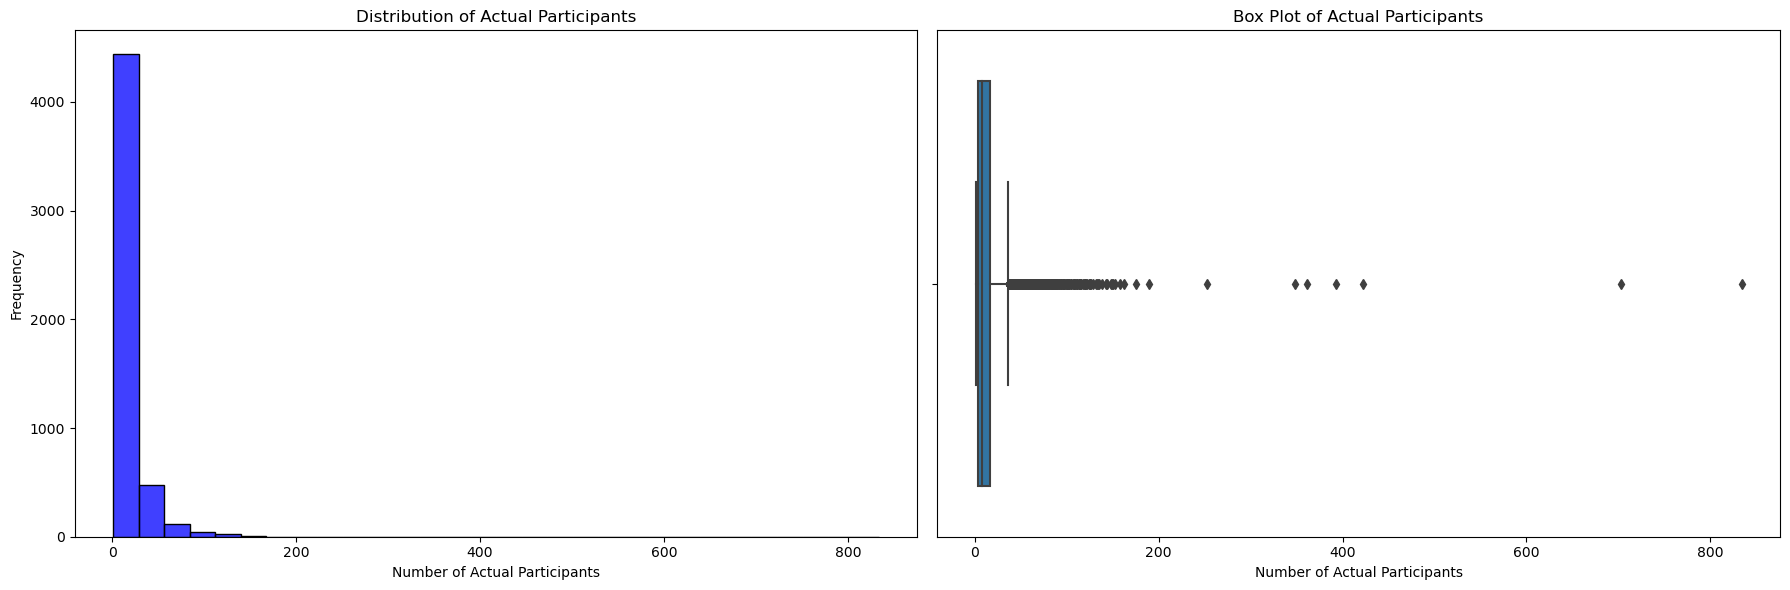

In [20]:
# Calculate descriptive statistics for actual participants
print("Descriptive Statistics for Actual Participants:")
print(hackathons['actual_participants_N'].describe())

# Visualizing actual participants using descriptive stats
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Histogram
sns.histplot(hackathons['actual_participants_N'], kde=False, bins=30, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Actual Participants")
axes[0].set_xlabel("Number of Actual Participants")
axes[0].set_ylabel("Frequency")

# Box Plot
sns.boxplot(x=hackathons['actual_participants_N'], ax=axes[1])
axes[1].set_title("Box Plot of Actual Participants")
axes[1].set_xlabel("Number of Actual Participants")

plt.tight_layout()
plt.show()


/Users/Isha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


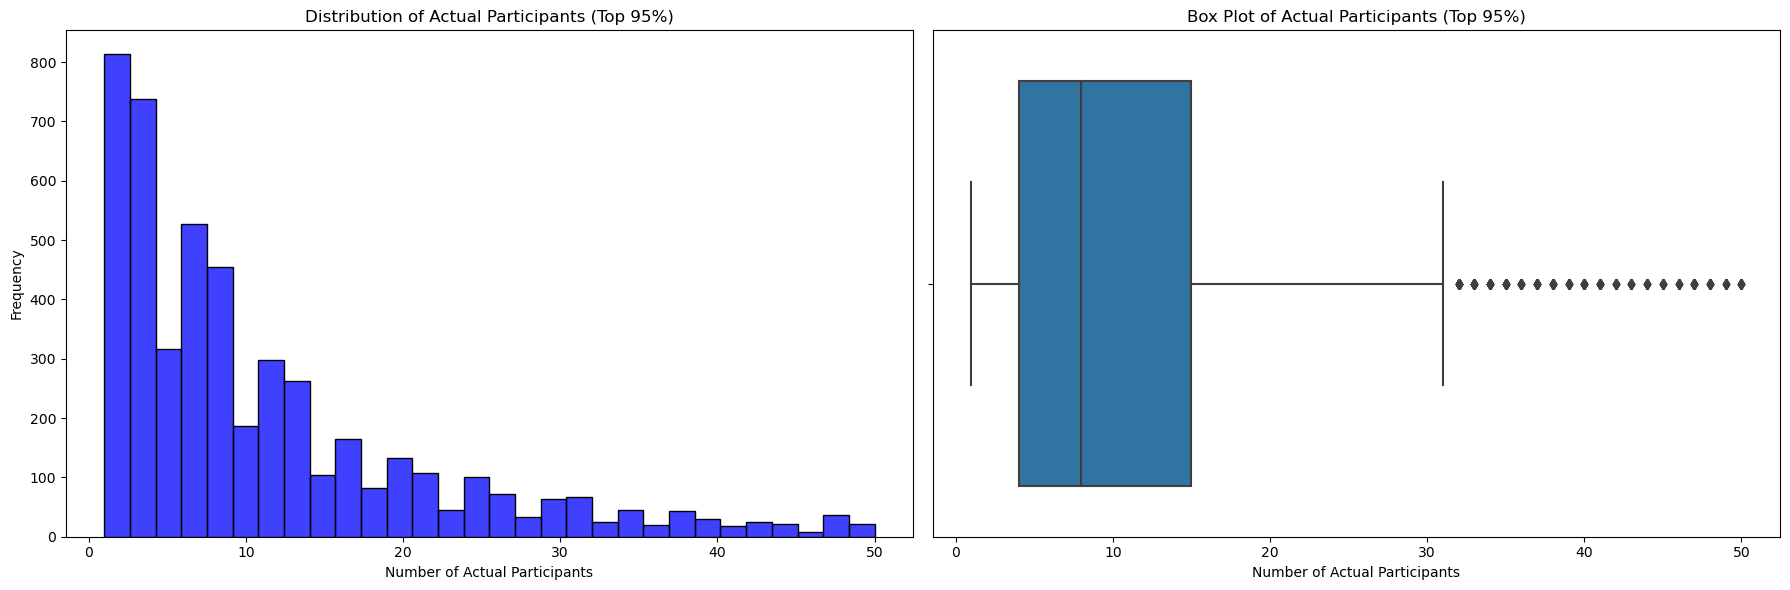

In [21]:
# Approach 1: Calculate the threshold to cut off the top 5% of the data
threshold = hackathons['actual_participants_N'].quantile(0.95)
filtered_data = hackathons[hackathons['actual_participants_N'] <= threshold]

# Visualizing the filtered data
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Histogram
sns.histplot(filtered_data['actual_participants_N'], kde=False, bins=30, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Actual Participants (Top 95%)")
axes[0].set_xlabel("Number of Actual Participants")
axes[0].set_ylabel("Frequency")

# Box Plot
sns.boxplot(x=filtered_data['actual_participants_N'], ax=axes[1])
axes[1].set_title("Box Plot of Actual Participants (Top 95%)")
axes[1].set_xlabel("Number of Actual Participants")

plt.tight_layout()
plt.show()


Histogram:
- The histogram shows that after removing the top 5% of data, the majority of hackathons have fewer than 15 participants. There is a steep drop in frequency as the number of participants increases.

Box Plot:
- The box plot indicates that the interquartile range (IQR) is between approximately 5 and 15 participants. There are still some outliers beyond 30 participants, but they are less extreme than before.

/Users/Isha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


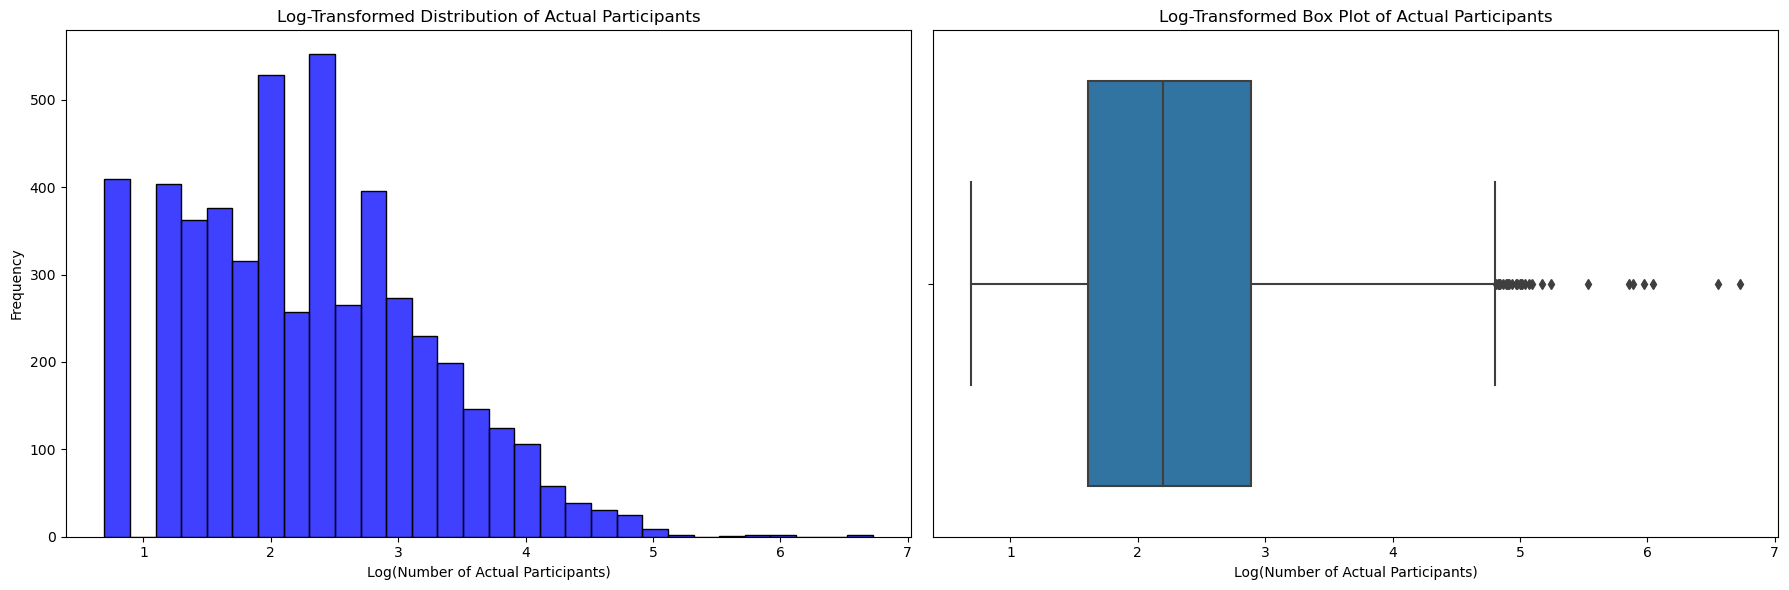

In [22]:
# Approach 2: Apply log transformation to the data
log_actual_participants_N = np.log1p(hackathons['actual_participants_N'])

# Visualizing the log-transformed data
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Histogram
sns.histplot(log_actual_participants_N, kde=False, bins=30, ax=axes[0], color='blue')
axes[0].set_title("Log-Transformed Distribution of Actual Participants")
axes[0].set_xlabel("Log(Number of Actual Participants)")
axes[0].set_ylabel("Frequency")

# Box Plot
sns.boxplot(x=log_actual_participants_N, ax=axes[1])
axes[1].set_title("Log-Transformed Box Plot of Actual Participants")
axes[1].set_xlabel("Log(Number of Actual Participants)")

plt.tight_layout()
plt.show()


### 3) Location distribution of hackathons

In [23]:


# Install geopy
!pip install geopy

from geopy.geocoders import Nominatim
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Clean up the location by stripping white spaces and lowering the case
hackathons['normalized_location'] = hackathons['Location'].str.strip().str.lower()

# Correct common redundancies
# Example: Combining similar "new york" locations
location_replacements = {
    "new york, new york, usa": "new york, ny, usa",
    "nyc, ny, usa": "new york, ny, usa",
    "san francisco, ca, usa": "san francisco, ca, usa",
    "sf, ca, usa": "san francisco, ca, usa",
    "philadelphia, pa, usa": "philadelphia, pa, usa",
    "philly, pa, usa": "philadelphia, pa, usa"
    # Add more known redundancies here
}

hackathons['normalized_location'] = hackathons['normalized_location'].replace(location_replacements)

# Count unique locations
unique_location_counts = hackathons['normalized_location'].value_counts()

# Convert to DataFrame and reset index
unique_location_counts = unique_location_counts.reset_index()
unique_location_counts.columns = ['location', 'count']

# Filter out online hackathons
unique_location_counts = unique_location_counts[unique_location_counts['location'] != 'online']


/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/3192259512.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['normalized_location'] = hackathons['Location'].str.strip().str.lower()
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/3192259512.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['normalized_location'] = hackathons['normalized_location'].replace(location_replacements)


**Suggestions for Future Work:**
1) **Automated Location Standardization**:
- Geocoding Services: Utilize geocoding services (such as Google Maps API, OpenStreetMap, or Geopy) to convert location names into standardized geographic coordinates. This would help in reducing ambiguities and variations in location names.
- Fuzzy Matching Techniques: Implement fuzzy string matching techniques (using libraries like fuzzywuzzy or difflib) to identify and merge similar location names that are not covered by the replacement dictionary.
2) *Machine Learning Approaches:*
- Clustering: Apply clustering algorithms (like K-Means or DBSCAN) to group similar location names based on text similarity measures. This can help in automatically detecting and merging redundant location entries.
- Natural Language Processing (NLP): Use NLP techniques to parse and standardize location names more effectively. Pre-trained language models could assist in understanding context and variations in location names.

In [24]:

# Geocoding function
geolocator = Nominatim(user_agent="hackathon_locator")

def get_coordinates(location):
    try:
        location_obj = geolocator.geocode(location, timeout=10)
        if location_obj:
            return (location_obj.latitude, location_obj.longitude)
        else:
            return (None, None)
    except Exception as e:
        print(f"Error geocoding {location}: {e}")
        return (None, None)

# Add coordinates to the DataFrame
unique_location_counts['coordinates'] = unique_location_counts['location'].apply(get_coordinates)
unique_location_counts['latitude'] = unique_location_counts['coordinates'].apply(lambda x: x[0])
unique_location_counts['longitude'] = unique_location_counts['coordinates'].apply(lambda x: x[1])

# Drop rows with missing coordinates
unique_location_counts = unique_location_counts.dropna(subset=['latitude', 'longitude'])

# Display the DataFrame
print(unique_location_counts)


                                               location  count  \
1                                     new york, ny, usa     37   
2                                san francisco, ca, usa     17   
3                                 philadelphia, pa, usa     10   
4                                university of waterloo     10   
5                                     42 silicon valley      9   
...                                                 ...    ...   
2348                  university of washington, seattle      1   
2349  university of british columbia - student life ...      1   
2353                           florida state university      1   
2356                     rice university student center      1   
2358            university of cambridge - jesus college      1   

                             coordinates   latitude   longitude  
1              (40.7127281, -74.0060152)  40.712728  -74.006015  
2             (37.7792588, -122.4193286)  37.779259 -122.419329  
3        

In [25]:

# Create a folium map
m = folium.Map(location=[20, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for _, row in unique_location_counts.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['location']}: {row['count']} hackathons",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save("hackathon_locations_map.html")

# Display the map
m


### lesser plotted than the previous map but that could be because we removed online. Although, I see some that where not online and still removed - come back to this later
**Code Explanation:**

1) Normalize Location Data:
Strip white spaces and convert the Location column to lowercase to standardize the location names.
Use a dictionary (location_replacements) to replace common redundant location names with a standardized name.

2) Count Unique Locations:
Count occurrences of each unique normalized location.
Convert the result to a DataFrame and reset the index.
Rename the columns to location and count.

3) Filter Out Online Hackathons:
Exclude rows where the location is "online" from the DataFrame.

4) Geocoding Function:
Define a function get_coordinates to get the latitude and longitude of a given location using the Nominatim geocoder.
Handle errors and return (None, None) if the geocoding fails.

5) Add Coordinates to DataFrame:
Apply the get_coordinates function to each location in the DataFrame.
Extract the latitude and longitude into separate columns.
Drop rows where geocoding failed (i.e., where latitude or longitude is None).

6) Create and Display Folium Map:
Initialize a Folium map centered at latitude 20 and longitude 0 with a zoom level of 2.
Add a MarkerCluster to group nearby markers.
Loop through the DataFrame and add a marker for each location to the map with a popup showing the location name and count.
Save the map to an HTML file for later viewing.

**Future work that can use this analysis listed in report** but includes: 
- Geographic Distribution Analysis
- Initiative Impact Analysis on a location basis
- Temporal analysis
- Interactive dashboard to explore the data in more detail, filter by region, time, and other attributes.
- Improve location data used advanced geocoding mechanisms
- Integration with Other Data Sources such as social media

### 4) Online VS Offline Participation

In [26]:
# Create a new column called participation_type based on whether "online" is mentioned in the 'info' column
hackathons['participation_type'] = hackathons['info'].apply(
    lambda x: 'Online' if 'online' in x.lower() else 'Offline'
)

# Step 2: Count the number of hackathons for each type
participation_counts = hackathons['participation_type'].value_counts()
print(participation_counts)

participation_type
Offline    3144
Online     1970
Name: count, dtype: int64


/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/1417211020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['participation_type'] = hackathons['info'].apply(


### 4a) Online vs Offline participation time trend

In [27]:
# Assuming 'start_date_format' and 'end_date_format' are already in a suitable format (e.g., YYYY-MM-DD)
hackathons['start_date_format'] = pd.to_datetime(hackathons['start_date_format'])
hackathons['end_date_format'] = pd.to_datetime(hackathons['end_date_format'])

# Resample to monthly data, count number of hackathons starting each month
monthly_participation = hackathons.groupby('participation_type').resample('M', on='start_date_format').size().unstack(0, fill_value=0)

hackathons[['start_date_format','end_date_format']]
monthly_participation

/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/1110240282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['start_date_format'] = pd.to_datetime(hackathons['start_date_format'])
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/1110240282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['end_date_format'] = pd.to_datetime(hackathons['end_date_format'])
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/1110240282.py:6: FutureWarning:

participation_type  Offline  Online
start_date_format                  
2010-04-30                0       1
2010-05-31                0       0
2010-06-30                0       0
2010-07-31                0       0
2010-08-31                0       1
...                     ...     ...
2022-03-31               29      70
2022-04-30               50      56
2022-05-31               14      35
2022-06-30               10      29
2022-07-31                0       1

[148 rows x 2 columns]

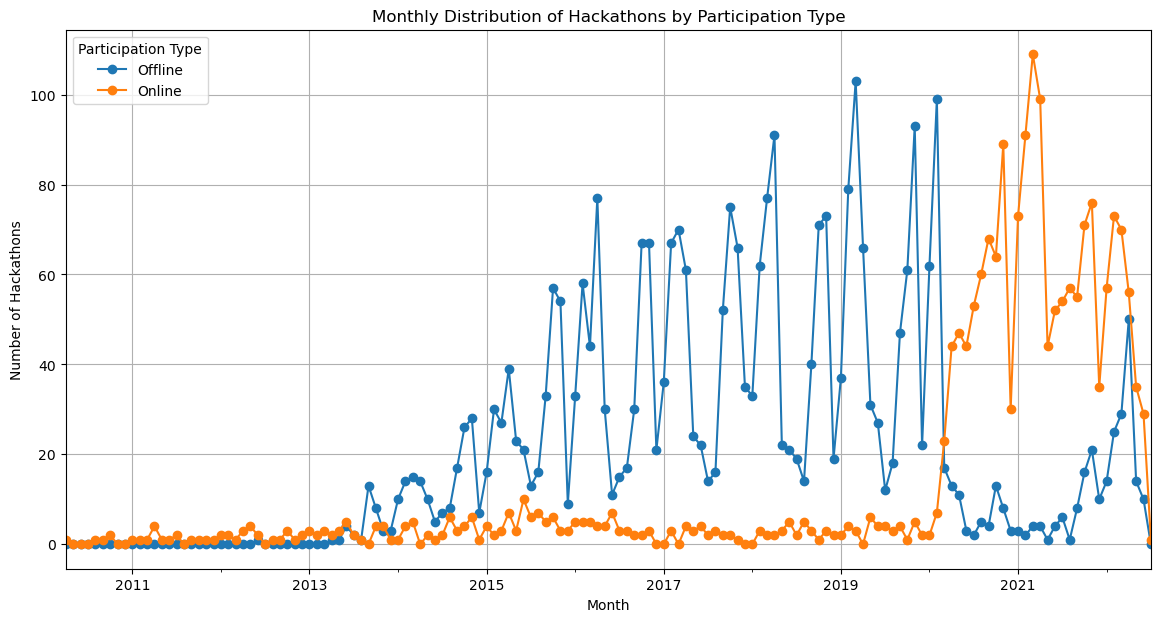

In [28]:
# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size for better readability
monthly_participation.plot(kind='line', marker='o', ax=plt.gca())  # 'o' gives us points at each data point
plt.title('Monthly Distribution of Hackathons by Participation Type')
plt.xlabel('Month')
plt.ylabel('Number of Hackathons')
plt.grid(True)
plt.legend(title='Participation Type')
plt.show()

### 4b) Male vs female participation for ONLINE events: (excluding unknown genders)

In [29]:
# Filter for online hackathons
online_hackathons = hackathons[hackathons['participation_type'] == 'Online']

# Summarize male vs female participation
gender_distribution_online = online_hackathons[['males_participating', 'females_participating']].sum()
print(gender_distribution_online)

males_participating      20359.0
females_participating     7963.0
dtype: float64


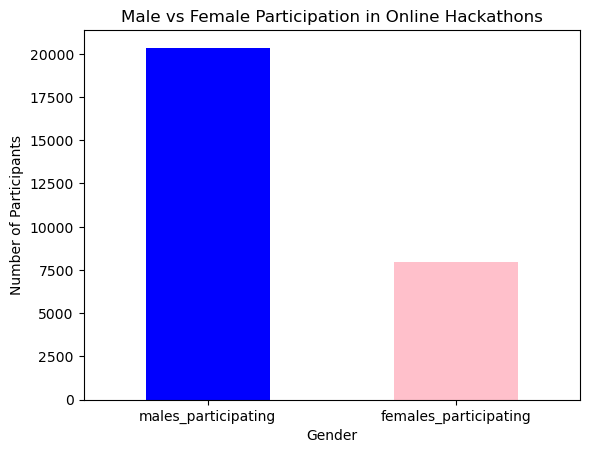

In [30]:
# Plotting
gender_distribution_online.plot(kind='bar', color=['blue', 'pink'])
plt.title('Male vs Female Participation in Online Hackathons')
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)  # Keeps the gender labels horizontal
plt.show()

### 4c) Male vs female participation for OFFLINE events:

In [31]:
# Filter for offline hackathons
offline_hackathons = hackathons[hackathons['participation_type'] == 'Offline']

# Summarize male vs female participation
gender_distribution_offline = offline_hackathons[['males_participating', 'females_participating']].sum()
print(gender_distribution_offline)

males_participating      34822.0
females_participating    10101.0
dtype: float64


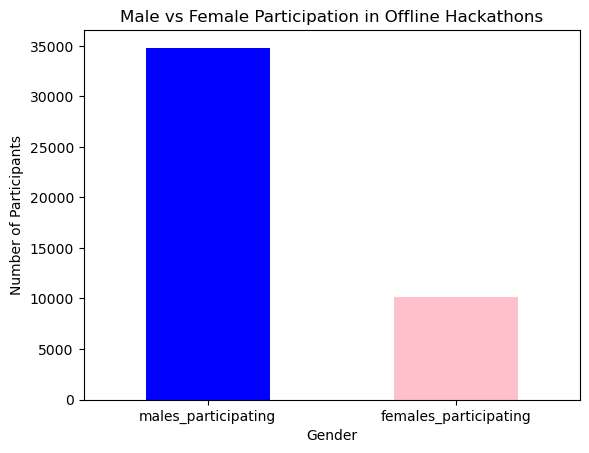

In [32]:
# Plotting
gender_distribution_offline.plot(kind='bar', color=['blue', 'pink'])
plt.title('Male vs Female Participation in Offline Hackathons')
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)  # Keeps the gender labels horizontal
plt.show()

### 4d) **Chi-Square Test of Independence**
The Chi-Square test is suitable here because it is used to determine whether there's a significant association between two categorical variables. In our case, these variables are the type of hackathon (online vs. offline) and gender participation (male vs female). This test will help ascertain if the observed distribution of gender across online and offline hackathons deviates significantly from what would be expected if there was no association between hackathon type and gender participation.

DOES BEING FEMALE AFFECT THE PROBABILITY OF PARTICIPATING IN AN ONLINE OR OFFLINE HACKATHON?

**H0:There is no association between participation type (online vs. offline) and gender distribution in hackathons. In other words, the two variables are independent.**

**H1: There is an association between participation type (online vs. offline) and gender distribution in hackathons. In other words, the two variables are not independent.**


In [33]:
# Creating a contingency table
contingency_table = pd.DataFrame({
    "Online": [gender_distribution_online['males_participating'], gender_distribution_online['females_participating']],
    "Offline": [gender_distribution_offline['males_participating'], gender_distribution_offline['females_participating']]
}, index=["Male", "Female"])

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Displaying the results
print("Chi-square Test for Independence")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(pd.DataFrame(expected, index=['Male', 'Female'], columns=['Online', 'Offline']))


Chi-square Test for Independence
Chi-square statistic: 296.11808779409455
P-value: 2.3095501002480505e-66
Degrees of freedom: 1
Expected frequencies:
              Online       Offline
Male    21337.105359  33843.894641
Female   6984.894641  11079.105359


**Interpretation of result**:
- Chi-square Statistic (296.12):
This value measures how much the observed counts of male and female participants in online and offline hackathons deviate from the expected counts if there were no association between participation type and gender. A higher value indicates a greater difference between the observed and expected counts.

- P-value (2.3095501002480505e-66):
The p-value is extremely small, essentially zero. This value is much smaller than the conventional significance level of 0.05.
This indicates that the observed differences are statistically significant.
Therefore, we reject the null hypothesis that there is no association between participation type (online vs offline) and gender distribution. This means that the participation type and gender distribution are not independent.
- degress of freedom (1): calculated using formula : (number of rows -1)x (number of columns -1)
- Expected Frequencies:
These are the frequencies we would expect to see in each cell of the contingency table if there were no association between the participation type and gender distribution.

**Conclusion from this test:**
The extremely low p-value indicates that there is a statistically significant association between the type of participation (online vs offline) and gender distribution in hackathons.
The observed gender distributions for online and offline hackathons are significantly different from what we would expect if there were no association.
This suggests that the type of hackathon (online or offline) influences the gender distribution of participants.

Cramér's V: 0.06358336035067225


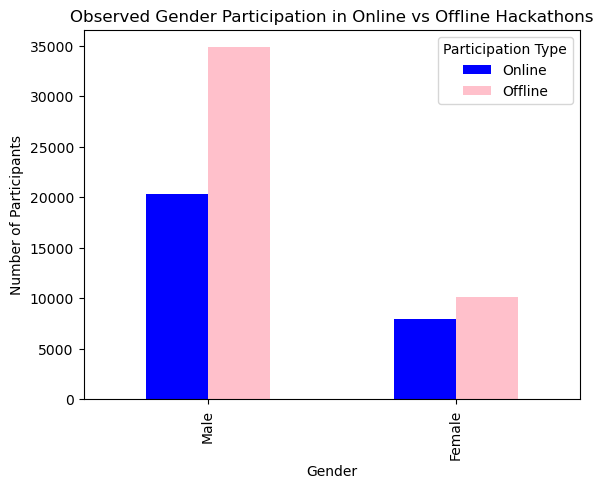

In [34]:
# Calculate Cramér's V  to measure the strength of the association.
n = contingency_table.to_numpy().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v}")

# Bar plot of observed frequencies
observed = pd.DataFrame({
    'Online': [gender_distribution_online['males_participating'], gender_distribution_online['females_participating']],
    'Offline': [gender_distribution_offline['males_participating'], gender_distribution_offline['females_participating']]
}, index=["Male", "Female"])

observed.plot(kind='bar', stacked=False, color=['blue', 'pink'])
plt.title('Observed Gender Participation in Online vs Offline Hackathons')
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.legend(title='Participation Type')
plt.show()


**Cramér's V (0.06358336035067225):**
Cramér's V is a measure of the strength of association between two nominal variables. It ranges from 0 (no association) to 1 (perfect association).
In this case, Cramér's V is approximately 0.064.
This value indicates a very weak association between participation type (online vs offline) and gender distribution. Although the Chi-square test showed a statistically significant difference, the strength of this association is quite weak.

**Conclusion from this:**  Offline hackathons tend to have higher participation rates for both males and females compared to online hackathons, with a more pronounced difference for male participants.

**Future works:**

1) Explore Reasons for Differences:
Investigate why offline hackathons have higher participation rates. Possible factors could include better networking opportunities, hands-on experiences, or marketing strategies.
Look into whether certain types of hackathons (e.g., corporate-sponsored vs. community-organized) influence gender participation differently.

2) Segment Analysis:
Analyze participation rates by other demographic factors such as age, region, or skill level to see if there are similar trends.
Examine if specific themes or topics of hackathons attract different gender participation rates.

3) Enhance Data Collection:
Collect more detailed data on participant preferences and motivations to better understand the underlying reasons for the observed patterns.
Conduct surveys or interviews with participants to gather qualitative insights.

4) Implement Initiatives:
Based on insights from the data, design and implement initiatives aimed at improving gender diversity in hackathons, both online and offline.
Monitor the impact of these initiatives over time to assess their effectiveness.

### 4e) **Proportion Test (Two-Proportion Z-Test)**
The Chi-square test indicated that there is a significant association between participation type (online vs. offline) and gender distribution.
The two-proportion z-test allows you to focus on specific comparisons within this association, such as comparing the proportion of male participants in online hackathons to the proportion of male participants in offline hackathons. For example, if you find that the proportion of males is significantly higher in offline hackathons than in online hackathons, this can lead to further questions and insights.
The z-test provides a way to quantify the difference in proportions and determine if it is statistically significant.
This can complement the Chi-square test by providing more detailed information about the nature of the association.

In [35]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Sample data
# Number of males and females in online hackathons
online_males = gender_distribution_online['males_participating']
online_females = gender_distribution_online['females_participating']
online_total = online_males + online_females

# Number of males and females in offline hackathons
offline_males = gender_distribution_offline['males_participating']
offline_females = gender_distribution_offline['females_participating']
offline_total = offline_males + offline_females

# Proportions of males in online and offline hackathons
count = np.array([online_males, offline_males])
nobs = np.array([online_total, offline_total])

# Perform the two-proportion z-test
stat, pval = proportions_ztest(count, nobs)

print(f"Z-statistic (Male): {stat}")
print(f"P-value (Male): {pval}")

# Proportions of females in online and offline hackathons
count_female = np.array([online_females, offline_females])
nobs_female = np.array([online_total, offline_total])

# Perform the two-proportion z-test for females
stat_female, pval_female = proportions_ztest(count_female, nobs_female)

print(f"Z-statistic (Female): {stat_female}")
print(f"P-value (Female): {pval_female}")


Z-statistic (Male): -17.216883188063402
P-value (Male): 1.9838816540895007e-66
Z-statistic (Female): 17.216883188063374
P-value (Female): 1.9838816540905194e-66


### <span style='color:blue'> Feedback: include this test in report if there are some additional insights that you were able to derive from it. Otherwise, can exclude from paper but keep in code </span>

**Interpretation of result**:

1) Z-statistic (Male): -17.216883188063402
This value represents how many standard deviations the observed proportion of male participants in online hackathons is away from the observed proportion of male participants in offline hackathons.
The negative sign indicates that the proportion of male participants is lower in online hackathons compared to offline hackathons.

2) P-value (Male): 1.9838816540895007e-66
This extremely small p-value (essentially zero) indicates that the observed difference in the proportions of male participants between online and offline hackathons is highly significant.
We reject the null hypothesis, suggesting that there is a significant difference in the proportion of male participants between online and offline hackathons.

3) Z-statistic (Female): 17.216883188063374
This value represents how many standard deviations the observed proportion of female participants in online hackathons is away from the observed proportion of female participants in offline hackathons.
The positive sign indicates that the proportion of female participants is higher in online hackathons compared to offline hackathons.

4) P-value (Female): 1.9838816540905194e-66
This extremely small p-value (essentially zero) indicates that the observed difference in the proportions of female participants between online and offline hackathons is highly significant.
We reject the null hypothesis, suggesting that there is a significant difference in the proportion of female participants between online and offline hackathons.

### ***Conclusion from part 4:***
1) Significant Association Between Participation Type and Gender:
The Chi-square test for independence revealed a significant association between participation type (online vs offline) and gender distribution in hackathons.
The extremely low p-value from the Chi-square test (2.3095501002480505e-66) indicates that the observed differences in gender participation between online and offline hackathons are highly statistically significant.

2) Different Gender Participation Patterns:
The two-proportion z-tests provided more specific insights into these differences:
Male Participation: The z-test for male participants showed a significantly lower proportion of males in online hackathons compared to offline hackathons (z-statistic: -17.216883188063402, p-value: 1.9838816540895007e-66).
Female Participation: Conversely, the z-test for female participants showed a significantly higher proportion of females in online hackathons compared to offline hackathons (z-statistic: 17.216883188063374, p-value: 1.9838816540905194e-66).

3) Strength of Association:
Cramér's V, calculated as approximately 0.064, indicates a very weak association between participation type and gender distribution. Although the association is statistically significant, its strength is relatively weak.

**Implications:**
1) Accessibility and Preferences:
The higher proportion of female participants in online hackathons suggests that online formats may be more accessible or appealing to females. Factors contributing to this could include flexibility, convenience, and potentially lower barriers to entry.
The higher proportion of male participants in offline hackathons may indicate that males prefer the in-person interaction, networking opportunities, and hands-on experiences that offline hackathons provide.

2) Event Design and Marketing:
Event organizers should consider these gender preferences when designing and marketing hackathons. Ensuring that both online and offline events are inclusive and cater to the needs of all participants can help balance gender participation.

3) Targeted Interventions:
Develop targeted interventions to address the specific needs and preferences of different genders. For example, providing more networking opportunities in online hackathons or offering hybrid models could help balance participation.

4) Further Research:
Conduct further research to understand the underlying reasons for these gender differences. Surveys, interviews, and focus groups with participants can provide deeper insights into their preferences and motivations.

### 4f) Adding the time trend to male and female participation in online vs offline events

/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/2570494007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['start_date_format'] = pd.to_datetime(hackathons['start_date_format'])
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/2570494007.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  online_trend = online_trend.set_index('start_date_format').resample('M')[['males_participating', 'females_participating']].sum().reset_index()
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/2570494007.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offline_trend = offline_trend.set_in

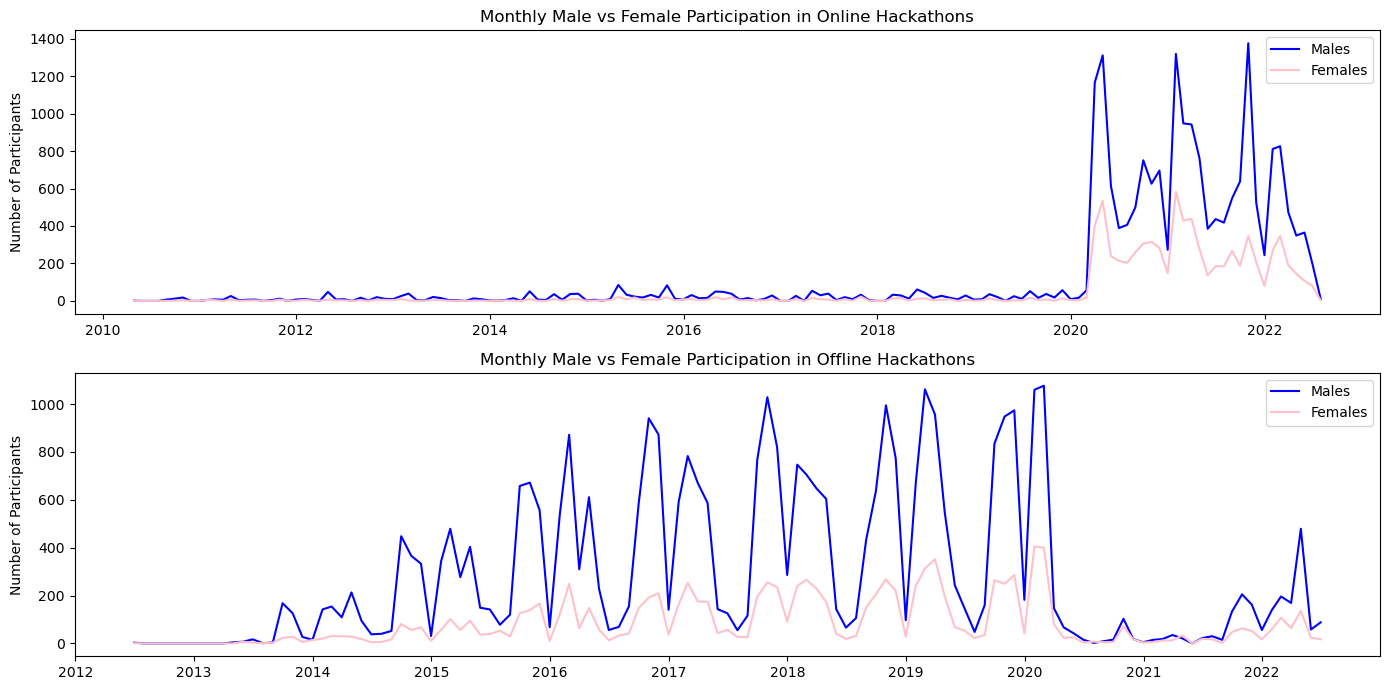

In [36]:
# Ensure start_date_format is in datetime format
hackathons['start_date_format'] = pd.to_datetime(hackathons['start_date_format'])

# Create copies for resampling to avoid altering the original DataFrame
online_trend = hackathons[hackathons['participation_type'] == 'Online'].copy()
offline_trend = hackathons[hackathons['participation_type'] == 'Offline'].copy()

# Resample and calculate trends
online_trend = online_trend.set_index('start_date_format').resample('M')[['males_participating', 'females_participating']].sum().reset_index()
offline_trend = offline_trend.set_index('start_date_format').resample('M')[['males_participating', 'females_participating']].sum().reset_index()

# Plotting the trends
plt.figure(figsize=(14, 7))

# Online trend plot
plt.subplot(2, 1, 1)
plt.plot(online_trend['start_date_format'], online_trend['males_participating'], label='Males', color='blue')
plt.plot(online_trend['start_date_format'], online_trend['females_participating'], label='Females', color='pink')
plt.title('Monthly Male vs Female Participation in Online Hackathons')
plt.ylabel('Number of Participants')
plt.legend()

# Offline trend plot
plt.subplot(2, 1, 2)
plt.plot(offline_trend['start_date_format'], offline_trend['males_participating'], label='Males', color='blue')
plt.plot(offline_trend['start_date_format'], offline_trend['females_participating'], label='Females', color='pink')
plt.title('Monthly Male vs Female Participation in Offline Hackathons')
plt.ylabel('Number of Participants')
plt.legend()

plt.tight_layout()
plt.show()

#### Graph interpretation:

**Online hackathons (top graph):** 
- Low Participation Initially: Both male and female participation in online hackathons starts off quite low, with almost parallel and minimal activity up until around 2016. This could suggest limited availability or lower popularity of online hackathons during the early years.
- Peak and Volatility: The peak in participation occurs around 2020, which likely corresponds with the onset of the COVID-19 pandemic—a period during which many events moved to an online format. The graph shows high volatility around this peak, suggesting perhaps rapid changes in the number or scale of events being organized.
- Decline Towards 2022: Both lines show a decline post-peak, which could indicate a stabilization as the world began adapting to new norms or a potential return to in-person events.

**Offline hackathons (bottom graph):**
- Higher Volatility: The graph for offline hackathons exhibits greater volatility and more pronounced peaks compared to online hackathons. This might be due to seasonal effects where certain months may consistently have more hackathons, possibly aligned with academic calendars or industry conference cycles.
- Gender Gap: Similar to the online hackathons, male participation is notably higher than female participation across the timeline. The gap appears to be somewhat consistent but with moments where it narrows slightly.
- Trend in Female Participation: While male participation shows large jumps, female participation, though lower and following the same trend, appears slightly steadier without as extreme spikes.

Overall Interpretation
Persistent Gender Gap: In both online and offline formats, male participation outweighs female participation. This underscores a gender disparity that hackathon organizers might need to address.
Impact of External Events: The pandemic visibly impacted online participation, highlighting how external factors can significantly affect the mode and scale of hackathon participation.
Volatility in Offline Events: The higher variability in offline event participation could reflect the logistical challenges and higher commitments required for in-person participation.

### 4f - taking it 1 step further to check for male-to-female ratio of participation on a monthly basis and examine the trends and fluctuations over time
That is, I would like to find out if when male participation increases or decrease, female participation follows a similar trend or not and by how much 

/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/3890441190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['start_date_format'] = pd.to_datetime(hackathons['start_date_format'])
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/3890441190.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  online_trend = online_trend.set_index('start_date_format').resample('M')[['males_participating', 'females_participating']].sum().reset_index()
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/3890441190.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offline_trend = offline_trend.set_i

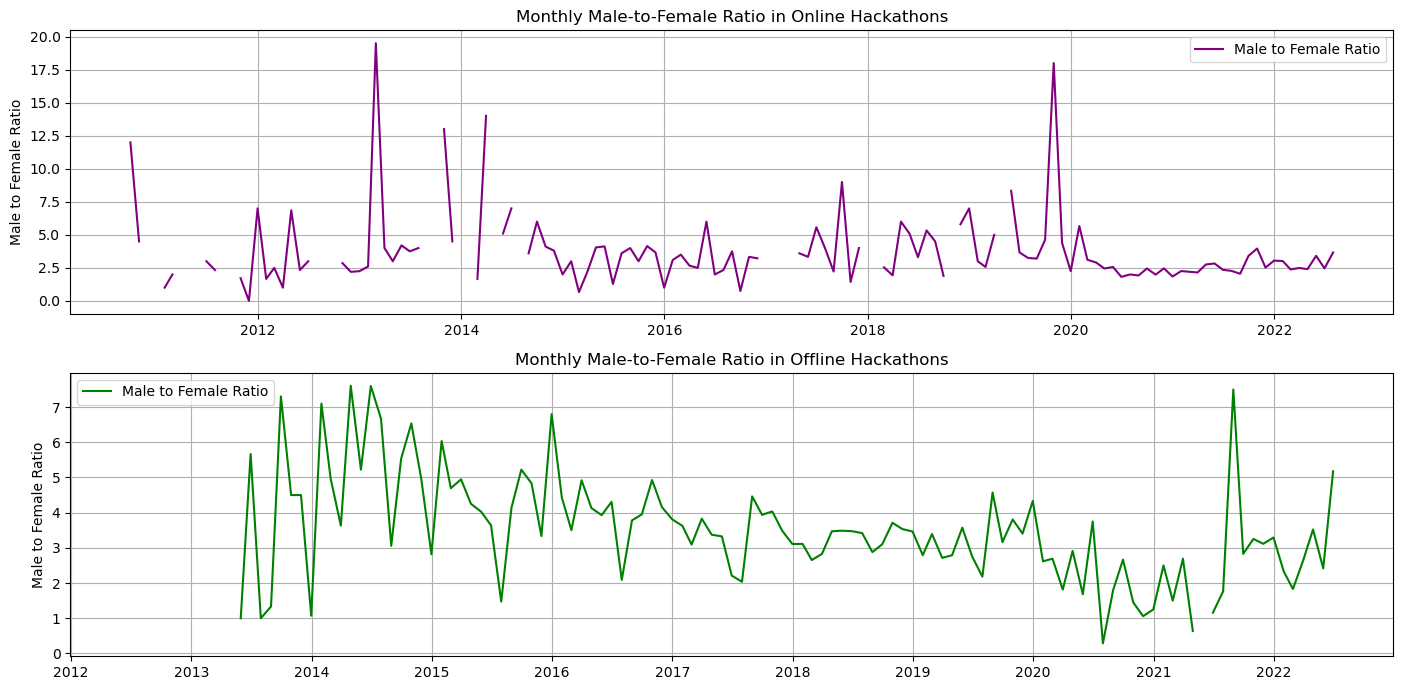

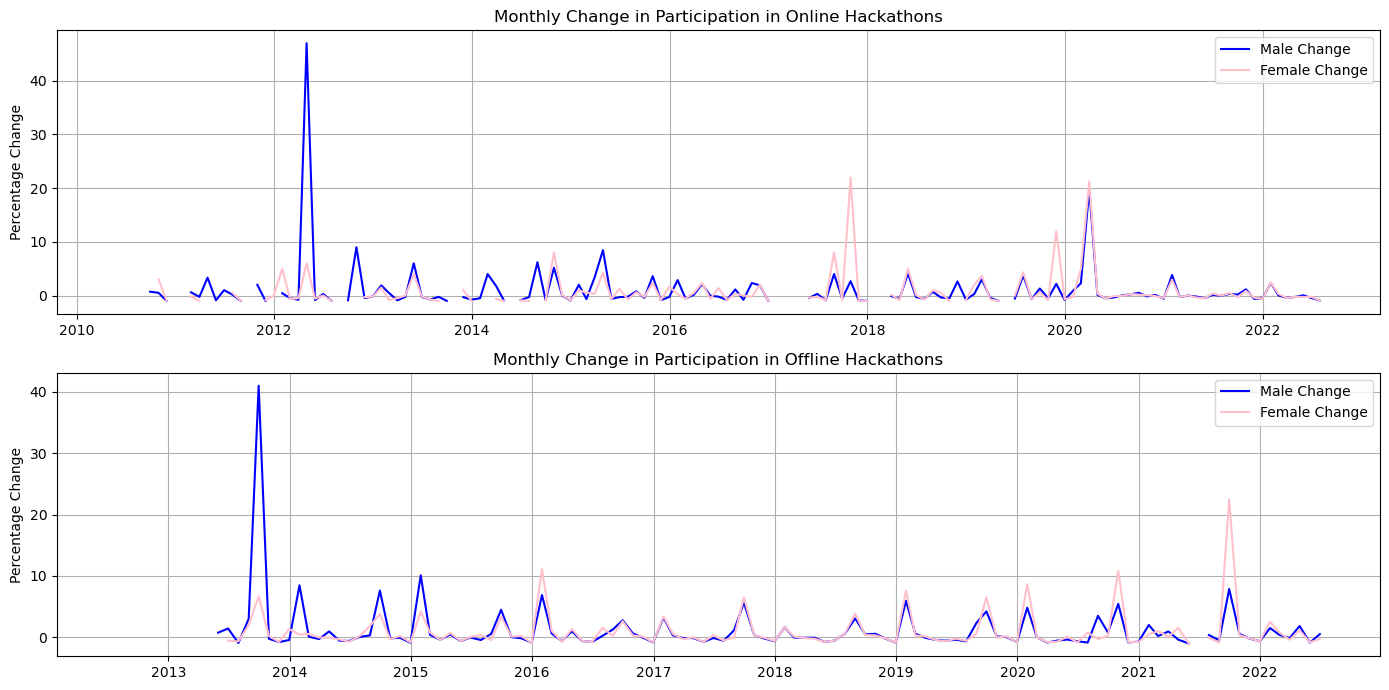

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure start_date_format is in datetime format
hackathons['start_date_format'] = pd.to_datetime(hackathons['start_date_format'])

# Create copies for resampling to avoid altering the original DataFrame
online_trend = hackathons[hackathons['participation_type'] == 'Online'].copy()
offline_trend = hackathons[hackathons['participation_type'] == 'Offline'].copy()

# Resample and calculate trends
online_trend = online_trend.set_index('start_date_format').resample('M')[['males_participating', 'females_participating']].sum().reset_index()
offline_trend = offline_trend.set_index('start_date_format').resample('M')[['males_participating', 'females_participating']].sum().reset_index()

# Calculate the male-to-female ratio for online hackathons
online_trend['male_to_female_ratio'] = online_trend['males_participating'] / online_trend['females_participating']

# Calculate the male-to-female ratio for offline hackathons
offline_trend['male_to_female_ratio'] = offline_trend['males_participating'] / offline_trend['females_participating']

# Plotting the male-to-female ratio over time
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(online_trend['start_date_format'], online_trend['male_to_female_ratio'], label='Male to Female Ratio', color='purple')
plt.title('Monthly Male-to-Female Ratio in Online Hackathons')
plt.ylabel('Male to Female Ratio')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(offline_trend['start_date_format'], offline_trend['male_to_female_ratio'], label='Male to Female Ratio', color='green')
plt.title('Monthly Male-to-Female Ratio in Offline Hackathons')
plt.ylabel('Male to Female Ratio')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate monthly changes
online_trend['monthly_change_male'] = online_trend['males_participating'].pct_change()
online_trend['monthly_change_female'] = online_trend['females_participating'].pct_change()

offline_trend['monthly_change_male'] = offline_trend['males_participating'].pct_change()
offline_trend['monthly_change_female'] = offline_trend['females_participating'].pct_change()

# Plot monthly changes
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(online_trend['start_date_format'], online_trend['monthly_change_male'], label='Male Change', color='blue')
plt.plot(online_trend['start_date_format'], online_trend['monthly_change_female'], label='Female Change', color='pink')
plt.title('Monthly Change in Participation in Online Hackathons')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(offline_trend['start_date_format'], offline_trend['monthly_change_male'], label='Male Change', color='blue')
plt.plot(offline_trend['start_date_format'], offline_trend['monthly_change_female'], label='Female Change', color='pink')
plt.title('Monthly Change in Participation in Offline Hackathons')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [38]:
online_trend
# what happens with the inf and NaN values when plotting? and what do they mean?

start_date_format  males_participating  females_participating  \
0          2010-04-30                  1.0                    0.0   
1          2010-05-31                  0.0                    0.0   
2          2010-06-30                  0.0                    0.0   
3          2010-07-31                  0.0                    0.0   
4          2010-08-31                  7.0                    0.0   
..                ...                  ...                    ...   
143        2022-03-31                473.0                  190.0   
144        2022-04-30                349.0                  145.0   
145        2022-05-31                365.0                  107.0   
146        2022-06-30                197.0                   80.0   
147        2022-07-31                 11.0                    3.0   

     male_to_female_ratio  monthly_change_male  monthly_change_female  
0                     inf                  NaN                    NaN  
1                     NaN            -1.000000                    NaN  
2                     NaN                  NaN                    NaN  
3                     NaN                  NaN                    NaN  
4                     inf                  inf                    NaN  
..                    ...                  ...                    ...  
143              2.489474            -0.427361              -0.452450  
144              2.406897            -0.262156              -0.236842  
145              3.411215             0.045845              -0.262069  
146              2.462500            -0.460274              -0.252336  
147              3.666667            -0.944162              -0.962500  

[148 rows x 6 columns]

In [39]:
offline_trend

start_date_format  males_participating  females_participating  \
0          2012-06-30                  3.0                    1.0   
1          2012-07-31                  0.0                    0.0   
2          2012-08-31                  0.0                    0.0   
3          2012-09-30                  0.0                    0.0   
4          2012-10-31                  0.0                    0.0   
..                ...                  ...                    ...   
116        2022-02-28                196.0                  107.0   
117        2022-03-31                169.0                   64.0   
118        2022-04-30                479.0                  136.0   
119        2022-05-31                 58.0                   24.0   
120        2022-06-30                 88.0                   17.0   

     male_to_female_ratio  monthly_change_male  monthly_change_female  
0                3.000000                  NaN                    NaN  
1                     NaN            -1.000000              -1.000000  
2                     NaN                  NaN                    NaN  
3                     NaN                  NaN                    NaN  
4                     NaN                  NaN                    NaN  
..                    ...                  ...                    ...  
116              1.831776             0.400000               0.783333  
117              2.640625            -0.137755              -0.401869  
118              3.522059             1.834320               1.125000  
119              2.416667            -0.878914              -0.823529  
120              5.176471             0.517241              -0.291667  

[121 rows x 6 columns]

### **What Do inf and NaN Mean?**
- inf (Infinity): This occurs when dividing by zero or when a value becomes extremely large. In the context of the male-to-female ratio, inf means that there were male participants but no female participants, leading to division by zero.
- NaN (Not a Number): This occurs when the calculation is undefined or there is missing data. In the context of percentage changes, NaN indicates that either the current or previous month's value was zero, making the percentage change calculation undefined.

/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/2519138011.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(online_trend.index, online_trend['male_to_female_ratio'].fillna(method='ffill').fillna(method='bfill'), label='Male to Female Ratio', color='purple')
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/2519138011.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(offline_trend.index, offline_trend['male_to_female_ratio'].fillna(method='ffill').fillna(method='bfill'), label='Male to Female Ratio', color='green')


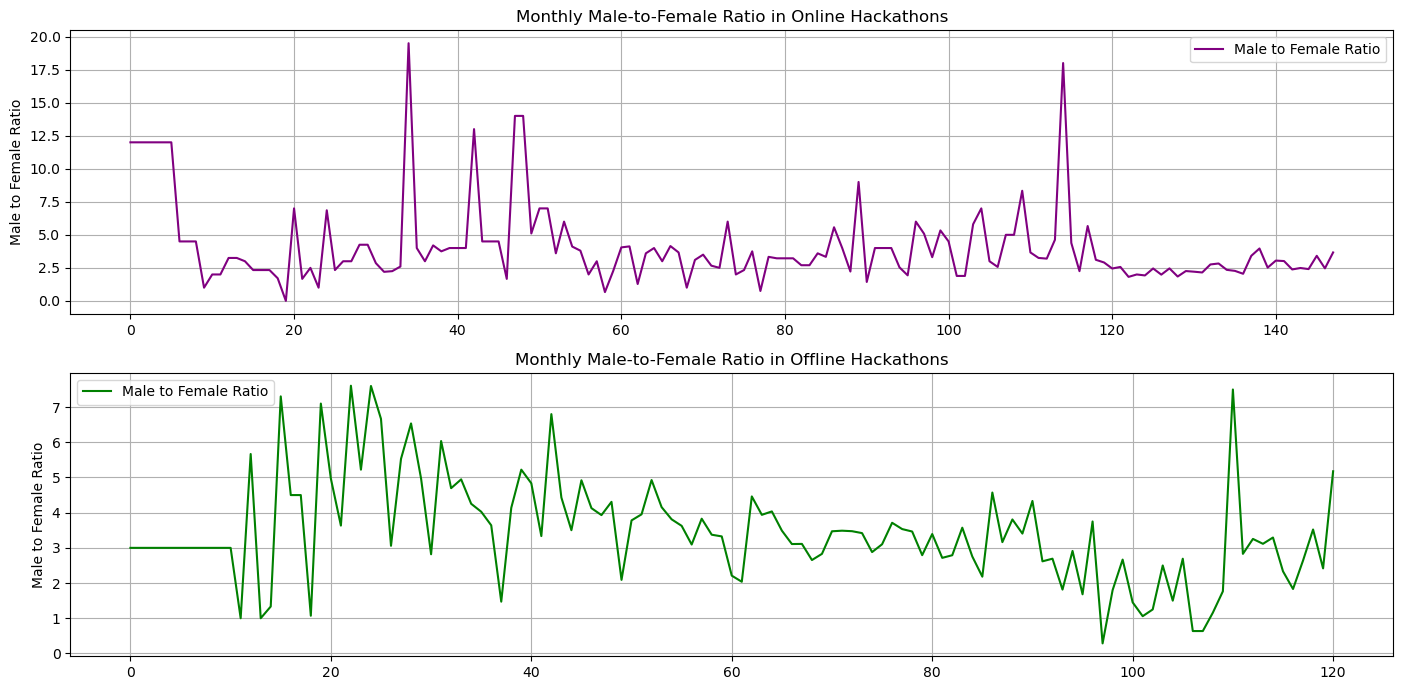

/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/2519138011.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(online_trend.index, online_trend['monthly_change_male'].fillna(method='ffill').fillna(method='bfill'), label='Male Change', color='blue')
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/2519138011.py:40: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(online_trend.index, online_trend['monthly_change_female'].fillna(method='ffill').fillna(method='bfill'), label='Female Change', color='pink')
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/2519138011.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(offline_trend.index, offline_trend['mon

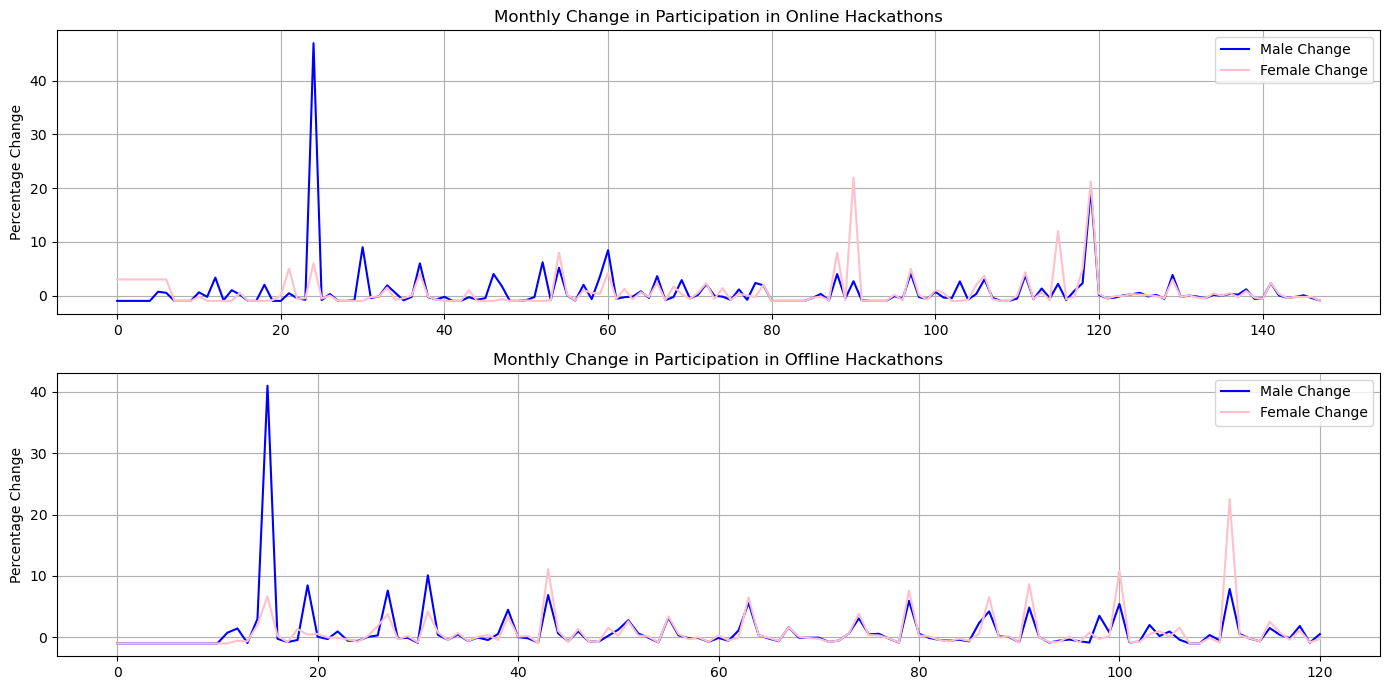

In [40]:
# Replace inf and NaN values with None for plotting
online_trend.replace([np.inf, -np.inf], np.nan, inplace=True)
offline_trend.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plotting the male-to-female ratio over time
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(online_trend.index, online_trend['male_to_female_ratio'].fillna(method='ffill').fillna(method='bfill'), label='Male to Female Ratio', color='purple')
plt.title('Monthly Male-to-Female Ratio in Online Hackathons')
plt.ylabel('Male to Female Ratio')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(offline_trend.index, offline_trend['male_to_female_ratio'].fillna(method='ffill').fillna(method='bfill'), label='Male to Female Ratio', color='green')
plt.title('Monthly Male-to-Female Ratio in Offline Hackathons')
plt.ylabel('Male to Female Ratio')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate monthly changes
online_trend['monthly_change_male'] = online_trend['males_participating'].pct_change()
online_trend['monthly_change_female'] = online_trend['females_participating'].pct_change()
offline_trend['monthly_change_male'] = offline_trend['males_participating'].pct_change()
offline_trend['monthly_change_female'] = offline_trend['females_participating'].pct_change()

# Replace inf and NaN values with None for plotting
online_trend.replace([np.inf, -np.inf], np.nan, inplace=True)
offline_trend.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot monthly changes
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(online_trend.index, online_trend['monthly_change_male'].fillna(method='ffill').fillna(method='bfill'), label='Male Change', color='blue')
plt.plot(online_trend.index, online_trend['monthly_change_female'].fillna(method='ffill').fillna(method='bfill'), label='Female Change', color='pink')
plt.title('Monthly Change in Participation in Online Hackathons')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(offline_trend.index, offline_trend['monthly_change_male'].fillna(method='ffill').fillna(method='bfill'), label='Male Change', color='blue')
plt.plot(offline_trend.index, offline_trend['monthly_change_female'].fillna(method='ffill').fillna(method='bfill'), label='Female Change', color='pink')
plt.title('Monthly Change in Participation in Offline Hackathons')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### <span style='color:blue'> Feedback: explain 1) what u did with inf and nan 2) explain graphs and interpretation 3) how did the spotty bits of the graphs get filled in? what got filled in? </span>

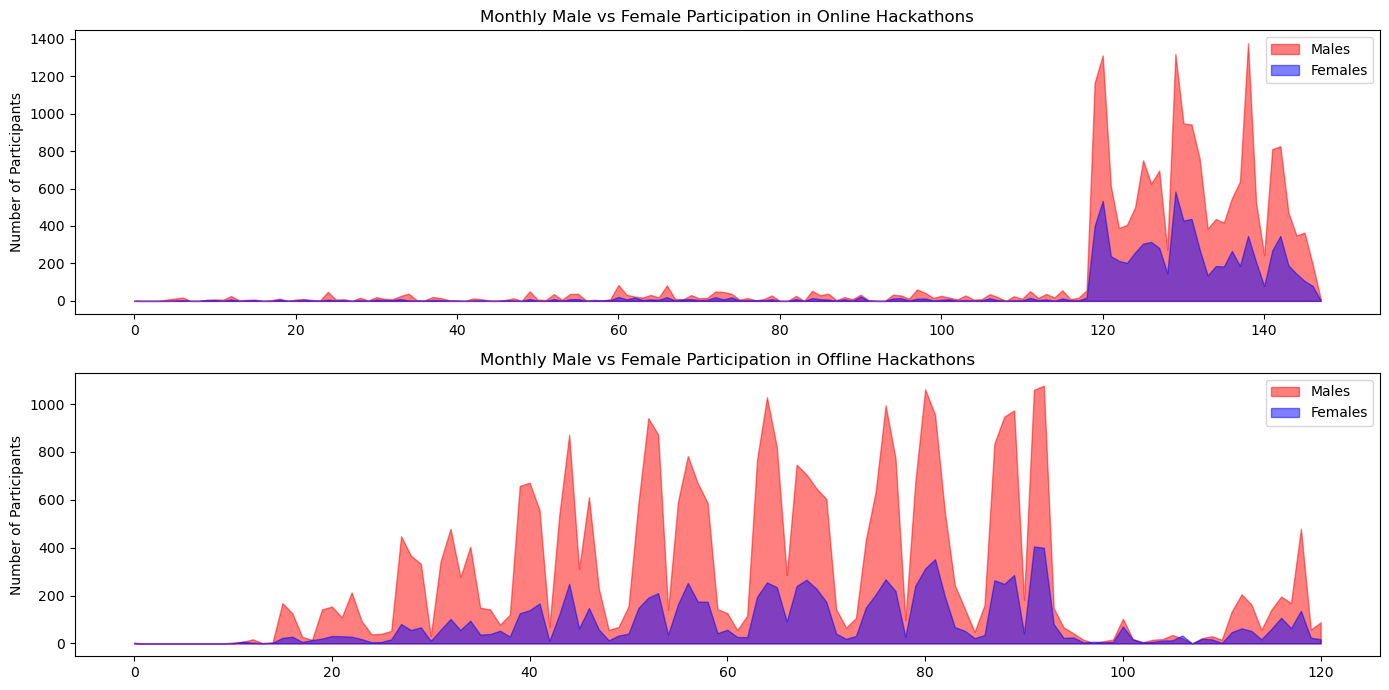

In [41]:
# Stacked Area Chart for Participation Trends:
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.fill_between(online_trend.index, online_trend['males_participating'], label='Males', color='red', alpha=0.5)
plt.fill_between(online_trend.index, online_trend['females_participating'], label='Females', color='blue', alpha=0.5)
plt.title('Monthly Male vs Female Participation in Online Hackathons')
plt.ylabel('Number of Participants')
plt.legend()

plt.subplot(2, 1, 2)
plt.fill_between(offline_trend.index, offline_trend['males_participating'], label='Males', color='red', alpha=0.5)
plt.fill_between(offline_trend.index, offline_trend['females_participating'], label='Females', color='blue', alpha=0.5)
plt.title('Monthly Male vs Female Participation in Offline Hackathons')
plt.ylabel('Number of Participants')
plt.legend()

plt.tight_layout()
plt.show()

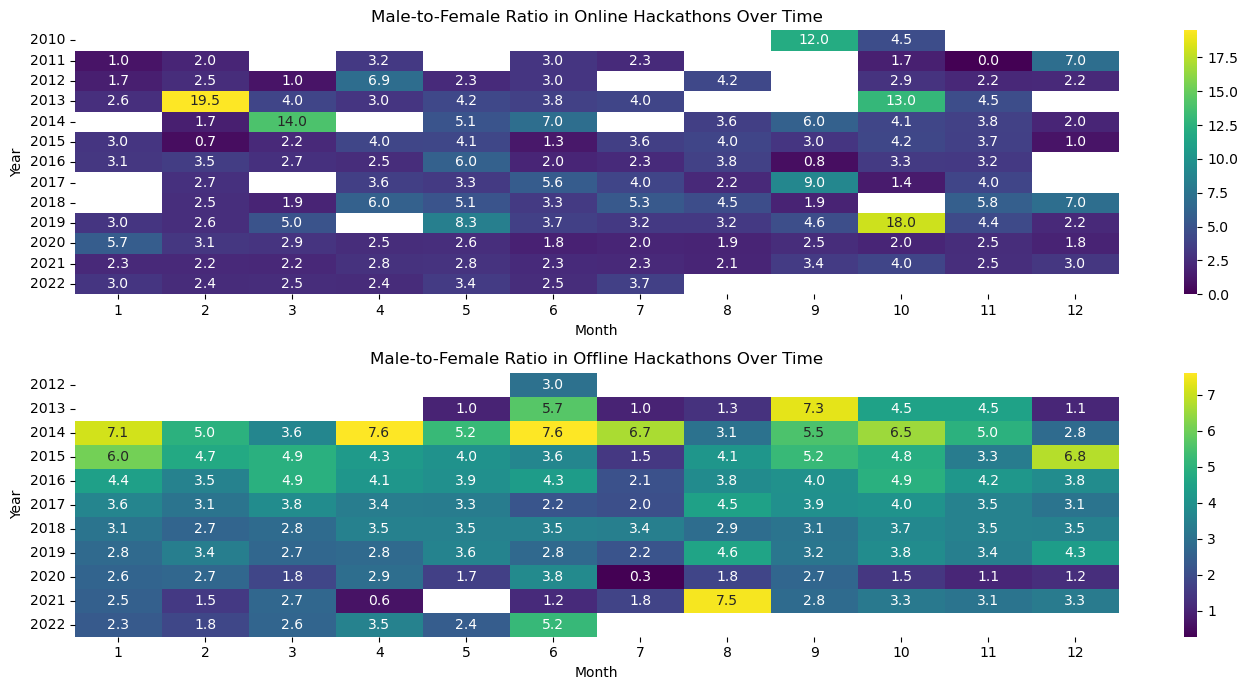

In [42]:
import seaborn as sns

# Ensure 'start_date_format' is in datetime format and set as the index
online_trend.set_index('start_date_format', inplace=True)
offline_trend.set_index('start_date_format', inplace=True)

# Extract year and month for the heatmap preparation
online_trend['year'] = online_trend.index.year
online_trend['month'] = online_trend.index.month
online_pivot = online_trend.pivot(index='year', columns='month', values='male_to_female_ratio')

offline_trend['year'] = offline_trend.index.year
offline_trend['month'] = offline_trend.index.month
offline_pivot = offline_trend.pivot(index='year', columns='month', values='male_to_female_ratio')

# Plot the heatmap
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
sns.heatmap(online_pivot, cmap='viridis', annot=True, fmt=".1f")
plt.title('Male-to-Female Ratio in Online Hackathons Over Time')
plt.xlabel('Month')
plt.ylabel('Year')

plt.subplot(2, 1, 2)
sns.heatmap(offline_pivot, cmap='viridis', annot=True, fmt=".1f")
plt.title('Male-to-Female Ratio in Offline Hackathons Over Time')
plt.xlabel('Month')
plt.ylabel('Year')

plt.tight_layout()
plt.show()


### <span style='color:blue'> Feedback: the heatmap does not count for how many hackathons occured in each of these time frames so it could be that one hackathon that had many more males is showing up here. Thus, 1) can either keep like this and mention it as a caveat or 2) can try to set a threshold for how many hackathons i want to allow for this </span>

**1) what do the numbers mean?**
The numbers in each cell represent the male-to-female ratio for that specific month and year.
A ratio of 3.0 means that there are three times as many male participants as female participants in that month.
The ratios provide a measure of gender balance in participation, with higher numbers indicating more male-dominated participation.

**2) what are the gaps?**
The gaps (empty cells) represent months for which there is no data available.
This could be due to no hackathons being held or the data not being recorded for those months.

**3) did the ratios get progressively better?**
**Online Hackathons:**
Early years (2010-2014) show high variability and extreme ratios (e.g., 19.5 in January 2013).
Middle years (2015-2019) have more stable and lower ratios, often around 2-3.
Recent years (2020-2022) show consistent ratios, generally below 5, indicating some improvement but still male-dominated.
**Offline Hackathons:**
Early years (2012-2014) have high ratios, often exceeding 5.
Middle years (2015-2019) show a decreasing trend, with ratios stabilizing around 3-4.
Recent years (2020-2022) maintain ratios around 2-3, indicating an improvement but still male-dominated.
Overall, there is a trend towards more balanced participation over time, but males still dominate in most months.


### Male-to-Female Ratio in Online Hackathons Over Time:
1) Early Years (2010-2014):
High Variability:
The ratio shows significant variability, with extreme values like 19.5 in February 2013 and 14.0 in May 2014.
These high ratios indicate periods where male participation greatly exceeded female participation.
Initial Low Participation:
Early years show low and inconsistent participation, reflected by the numerous gaps (empty cells) and extreme ratios.

2) Middle Years (2015-2019):
- Increased Stability:
Ratios become more stable with fewer extreme values, generally ranging between 2 and 7.
This indicates a more balanced, but still male-dominated, participation rate.
- Notable Events:
Spikes such as 18.0 in June 2019 suggest specific events or campaigns that significantly increased male participation relative to female.

3) Recent Years (2020-2022):
Pandemic Impact:
Starting around 2020, there is a notable increase in participation, likely due to the shift to online events during the COVID-19 pandemic.
Ratios remain more consistent and generally lower than in the early years, indicating some improvement in gender balance.
Regular Participation:
Ratios are mostly between 2 and 5, suggesting a trend towards more balanced participation, though males still outnumber females.

### Male-to-Female Ratio in Offline Hackathons Over Time:
1) Early Years (2012-2014):
High Ratios:
The ratio is relatively high and fluctuating, often exceeding 5, indicating significant male dominance.
Examples include a ratio of 7.3 in December 2014 and multiple months with ratios above 5.

2) Middle Years (2015-2019):
- Decreasing Trend:
The ratio shows a decreasing trend, stabilizing around 2-4, suggesting improved gender balance over time.
More consistent participation with fewer extreme values compared to the early years.
- Balanced Months:
Some months show ratios close to or below 2, indicating better balance during those periods.

3) Recent Years (2020-2022):
- Pandemic Impact:
There is a noticeable impact of the pandemic around 2020, with fluctuating ratios.
Post-pandemic, the ratios show a gradual return to more balanced participation, though males still generally outnumber females.
- Improved Consistency:
Ratios generally range between 2 and 4, indicating more consistent and balanced participation.

**Key Observations and Insights:**
1) Trend Towards Balance:
Both online and offline hackathons show a trend towards more balanced male-to-female ratios over time.
The improvement is more noticeable in offline hackathons compared to online ones.

2) Impact of COVID-19:
The pandemic significantly affected participation trends, especially in online hackathons where there was a notable increase in participation.
The return to offline events post-2020 shows a gradual recovery in participation with improved gender balance.

3) Seasonal and Event-Specific Influences:
Certain months show higher ratios, indicating the influence of specific events or seasonal trends on participation rates.
For example, the spike in February 2013 for online hackathons suggests a major event with high male participation.


**Recommendations for Further Analysis:**
- Investigate Reasons for Fluctuations:
Conduct qualitative research to understand the reasons behind the fluctuations in male-to-female ratios, particularly in the early years.
Explore factors such as event themes, marketing strategies, and external influences (e.g., societal trends, pandemic effects).

- Targeted Interventions:
Design and implement targeted interventions to promote gender balance, especially during months or years with high ratios.
Monitor the impact of these interventions on future hackathons.

- Monitor and Adapt to Trends:
Continuously monitor participation trends to identify ongoing patterns and adapt strategies accordingly.
Use feedback from participants to understand their experiences and address barriers to participation.

### 5) Prize money analysis (basic)

In [43]:
# Step 1: Classify based on prize_money column
def classify_prize_money(value):
    value_str = str(value).lower()
    if 'no money prize' in value_str:
        return 'No Prize Money'
    else:
        return 'Has Prize Money'

hackathons['prize_money_status'] = hackathons['prize_money'].apply(classify_prize_money)

# Step 2: Count the number of hackathons for each category
prize_money_counts = hackathons['prize_money_status'].value_counts()
print(prize_money_counts)

prize_money_status
Has Prize Money    4018
No Prize Money     1096
Name: count, dtype: int64


/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/3856194503.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['prize_money_status'] = hackathons['prize_money'].apply(classify_prize_money)


### 5a) Explore the Relationship Between Prize Money and Gender Participation:

In [44]:
# Calculate total participants and female participants based on prize money status
participation_prize_money = hackathons.groupby('prize_money_status')[['males_participating', 'females_participating', 'unknown_gender_participating']].sum()
participation_prize_money['total_participating'] = participation_prize_money.sum(axis=1)
participation_prize_money['female_percentage'] = (participation_prize_money['females_participating'] / participation_prize_money['total_participating']) * 100
participation_prize_money['male_percentage'] = (participation_prize_money['males_participating'] / participation_prize_money['total_participating']) * 100
participation_prize_money['unknown_percentage'] = (participation_prize_money['unknown_gender_participating'] / participation_prize_money['total_participating']) * 100

participation_prize_money[['female_percentage','male_percentage','unknown_percentage']]

female_percentage  male_percentage  unknown_percentage
prize_money_status                                                        
Has Prize Money             23.256856        71.801125            4.942020
No Prize Money              24.157907        71.070234            4.771859

Thus, prize AND no prize money hackathons are male-dominated by a value of 71% each, females make up approx 23-24% and unknown genders make up approx 4.7-5%

#### Future work with prize money:
1) Analyze Prize Money Amounts and Gender Participation 
2) Investigate the Impact of Prize Money Announcements
3) Analyze Participation in Hackathons with High Prize Money
4) Investigate Time Trends in Prize Money and Gender Participation

### 6) Hackathon duration analysis

In [45]:
# Convert dates to datetime format
hackathons['start_date_format'] = pd.to_datetime(hackathons['start_date_format'])
hackathons['end_date_format'] = pd.to_datetime(hackathons['end_date_format'])

# Calculate duration
hackathons['duration_days'] = (hackathons['end_date_format'] - hackathons['start_date_format']).dt.days

/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/3048181715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['start_date_format'] = pd.to_datetime(hackathons['start_date_format'])
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/3048181715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hackathons['end_date_format'] = pd.to_datetime(hackathons['end_date_format'])
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/3048181715.py:6: SettingWithCop

In [46]:
hackathons['duration_days'].describe()

count    5114.000000
mean        8.911615
std        23.407244
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       403.000000
Name: duration_days, dtype: float64

In [47]:
hackathons[['duration_days','start_date_format','end_date_format']]

duration_days start_date_format end_date_format
0                 2        2020-03-20      2020-03-22
1                 6        2020-04-03      2020-04-09
2                43        2022-05-10      2022-06-22
3                 2        2018-08-01      2018-08-03
4                36        2022-04-22      2022-05-28
...             ...               ...             ...
7024              1        2021-04-10      2021-04-11
7031              1        2022-06-11      2022-06-12
7032              1        2022-03-26      2022-03-27
7035            146        2021-11-19      2022-04-14
7044              0        2022-06-14      2022-06-14

[5114 rows x 3 columns]

### 6a) Avg duration (online vs offline)

In [48]:
# Calculate average duration for Online vs Offline
average_duration_online_offline = hackathons.groupby('participation_type')['duration_days'].mean()
print("Average Duration (Online vs Offline):")
print(average_duration_online_offline)

Average Duration (Online vs Offline):
participation_type
Offline     2.484097
Online     19.169543
Name: duration_days, dtype: float64


### 6b) Avg duration (prize money vs no prize money)

In [49]:
# Calculate average duration for Prize Money vs No Prize Money
average_duration_prize_money = hackathons.groupby('prize_money_status')['duration_days'].mean()
print("\nAverage Duration (Prize Money vs No Prize Money):")
print(average_duration_prize_money)


Average Duration (Prize Money vs No Prize Money):
prize_money_status
Has Prize Money    9.888502
No Prize Money     5.330292
Name: duration_days, dtype: float64


### 6c) Avg duration (online/offline + prize money/no prize money)

In [50]:
# Calculate average duration for each combination
average_duration_combination = hackathons.groupby(['participation_type', 'prize_money_status'])['duration_days'].mean()

# Display the results
print("Average Duration (Online/Offline + Prize Money/No Prize Money):")
print(average_duration_combination)

Average Duration (Online/Offline + Prize Money/No Prize Money):
participation_type  prize_money_status
Offline             Has Prize Money        2.277433
                    No Prize Money         3.168724
Online              Has Prize Money       21.354959
                    No Prize Money         9.623978
Name: duration_days, dtype: float64


### 7) Public VS Invite-only hackathons

In [51]:
hack_type_counts = hackathons['hack_type'].value_counts()
print(hack_type_counts)

hack_type
Public         4865
Invite only     249
Name: count, dtype: int64


### 7a) Avg duration (public/invite-only + prize money/no prize money)

In [52]:
# Calculate average duration for each combination
average_hack_duration_combination = hackathons.groupby(['hack_type', 'prize_money_status'])['duration_days'].mean()
print(average_hack_duration_combination)

hack_type    prize_money_status
Invite only  Has Prize Money        2.869792
             No Prize Money        12.421053
Public       Has Prize Money       10.240721
             No Prize Money         4.941290
Name: duration_days, dtype: float64


### 8) Skill distribution

In [53]:
participants_expanded[['skills','interests']]

skills  \
0                                                     []   
1      [wordpress, python, tableau, excel, Blockchain, ]   
2      [java, c++, javascript, angular.js, css, html,...   
3                                   [java, javascript, ]   
4      [android, javascript, php, java, ios, jquery, ...   
...                                                  ...   
56490  [python, java, react, react-native, firebase, ...   
56491                              [mac, web, windows, ]   
56492                                                 []   
56493  [web, react, python, flask, html5, websockets,...   
56494                          [java, c++, Blockchain, ]   

                                               interests  
0                                                     []  
1      [AR/VR, Blockchain, Communication, Cybersecuri...  
2      [Beginner Friendly, Blockchain, Cybersecurity,...  
3      [Communication, Cybersecurity, Gaming, IoT, Ma...  
4                                                     []  
...                                                  ...  
56490  [AR/VR, Blockchain, E-commerce/Retail, Fintech...  
56491                                                 []  
56492                                                 []  
56493  [Beginner Friendly, Design, Education, Health,...  
56494  [AR/VR, Blockchain, Cybersecurity, DevOps, IoT...  

[56495 rows x 2 columns]

In [54]:
# Convert pipe-separated strings to lists for 'skills' and 'interests' columns
# participants_expanded['skills'] = participants_expanded['skills'].fillna(",").apply(lambda x: x.split("|") if x else [])
# participants_expanded['interests'] = participants_expanded['interests'].fillna(",").apply(lambda x: x.split("|") if x else [])
# participants_expanded[['skills','interests']]

In [55]:
# Explode the skills column to have one skill per row
exploded_skills = participants_expanded.explode('skills')

# Strip any leading or trailing spaces and remove empty strings
exploded_skills['skills'] = exploded_skills['skills'].str.strip()
exploded_skills = exploded_skills[exploded_skills['skills'] != '']
exploded_skills = exploded_skills[exploded_skills['skills'] != ',']

# Count the occurrences of each skill
skill_counts = exploded_skills['skills'].value_counts().reset_index()
skill_counts.columns = ['Skill', 'Count']

# Get the top 20 skills
top_skills = skill_counts.head(20)

# Display the top 20 skills
print("Top 20 Skills of Participants:")
print(top_skills)

Top 20 Skills of Participants:
         Skill  Count
0       python  23910
1         java  21142
2   javascript  17249
3          c++   9995
4        html5   8812
5          css   8472
6            c   6976
7         html   6041
8   Blockchain   5969
9      android   5058
10     node.js   4281
11       react   4208
12          c#   3589
13        css3   3470
14         sql   3299
15         php   3126
16         ios   2954
17      jquery   2618
18   photoshop   2122
19         web   2037


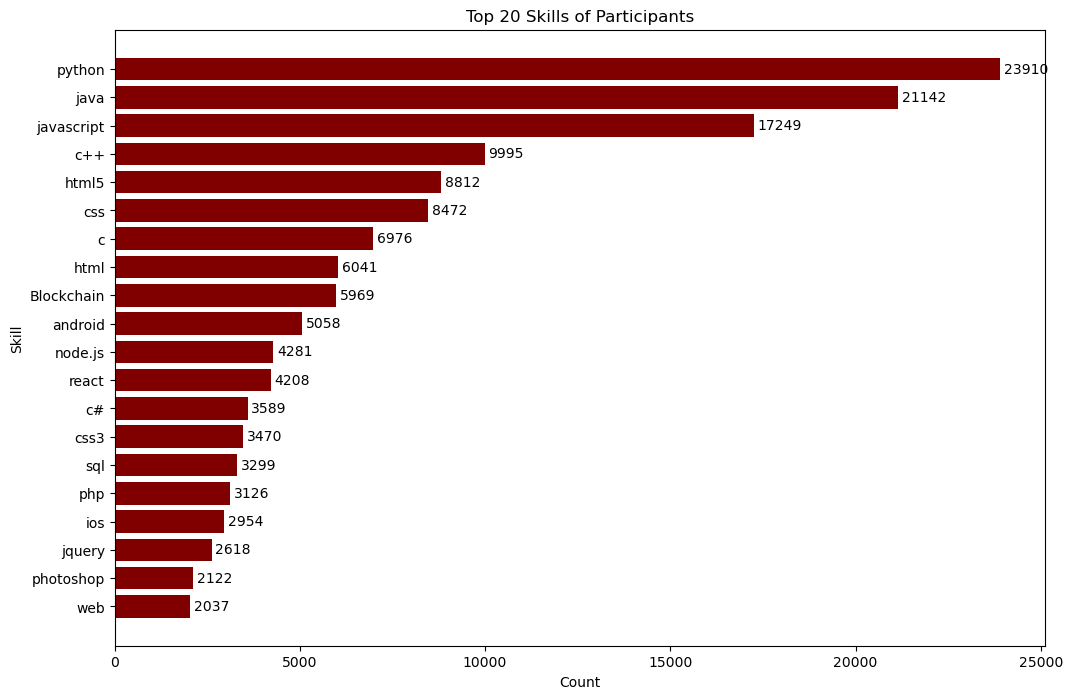

In [56]:
# Plotting the top 20 skills
plt.figure(figsize=(12, 8))
bars = plt.barh(top_skills['Skill'], top_skills['Count'], color='maroon')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 20 Skills of Participants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Adding value numbers to the bars
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center')

plt.show()

In [57]:
participants_expanded.head(20)

url                name  \
0        https://devpost.com/CraigHiller        Craig Hiller   
1           https://devpost.com/asheleby      Andrew Sheleby   
2          https://devpost.com/evanho239             Evan Ho   
3            https://devpost.com/brilamb           Brian Lam   
4          https://devpost.com/linpeng06            lin peng   
5           https://devpost.com/Dendygar        Denis Mukhin   
6      https://devpost.com/FarnazFooladi      Farnaz Fooladi   
7             https://devpost.com/Farnad    Farnad Jahanshah   
8           https://devpost.com/BookSock        Jason Seibel   
9          https://devpost.com/cathyjiao          Cathy Jiao   
10          https://devpost.com/YichenLu           Yichen Lu   
11        https://devpost.com/jorgec4444       Jorge Vinagre   
12       https://devpost.com/MariaMangru  MariaMangru Mangru   
13          https://devpost.com/YunChuan      Yun Chuan Ngin   
14  https://devpost.com/AbdullahAlhutami   Abdullah Alhutami   
15    https://devpost.com/mariamsinger08       Mariam Singer   
16          https://devpost.com/bonnieli           Bonnie Li   
17          https://devpost.com/prasang7      Prasang Sharma   
18           https://devpost.com/Crashnb             Crashnb   
19    https://devpost.com/lakshmidevi777        Lakshmi Devi   

                                               skills  \
0                                                  []   
1   [wordpress, python, tableau, excel, Blockchain, ]   
2   [java, c++, javascript, angular.js, css, html,...   
3                                [java, javascript, ]   
4   [android, javascript, php, java, ios, jquery, ...   
5                                                  []   
6                        [python, c++, html5, css3, ]   
7                                     [c#, mongodb, ]   
8                                                  []   
9                                                  []   
10                                                 []   
11                   [python, java, c, c++, pandas, ]   
12     [python, javascript, html5, css3, bootstrap, ]   
13                                                 []   
14    [html, php, asp.net, css, jquery, javascript, ]   
15                                                 []   
16                                            [web, ]   
17  [android, react-native, redux, javascript, pho...   
18                                                 []   
19             [javascript, html5, python, c#, sql, ]   

                                            interests  \
0                                                  []   
1   [AR/VR, Blockchain, Communication, Cybersecuri...   
2   [Beginner Friendly, Blockchain, Cybersecurity,...   
3   [Communication, Cybersecurity, Gaming, IoT, Ma...   
4                                                  []   
5                                                  []   
6                                                  []   
7                                                  []   
8                                                  []   
9                                                  []   
10                                                 []   
11                       [Machine Learning/AI, Web, ]   
12  [Beginner Friendly, Communication, DevOps, E-c...   
13                                                 []   
14                                                 []   
15                                                 []   
16                                                 []   
17                                                 []   
18                                                 []   
19                                                 []   

                                             projects  \
0                 https://devpost.com/software/googme   
1           https://devpost.com/software/helpr-27tjik   
2       https://devpost.com/software/untitled-for-now   
3   https://devpost.com/software/the-hummingbird-p...   
4          

### 8a) Skill distribution by gender of participants

To analyze the skill distribution for males and females, you can take either approach, depending on the insights you want to derive:

- **Use the top 20 skills found regardless of gender**: This approach allows you to directly compare how males and females rank in terms of the most popular skills overall. It helps to see if the same skills are prominent for both genders and to what extent.

- **Find the top 20 skills for each gender separately**: This approach allows you to see which skills are the most popular specifically within each gender group. It may reveal differences in skill preferences or expertise that are not apparent when looking at the combined data.

Both approaches have merit. If your goal is to compare gender differences directly within the same set of top skills, the first approach is more straightforward. If you're interested in understanding unique preferences or specializations within each gender group, the second approach is more informative.

### *Approach 1: Using the top 20 skills found regardless of gender*

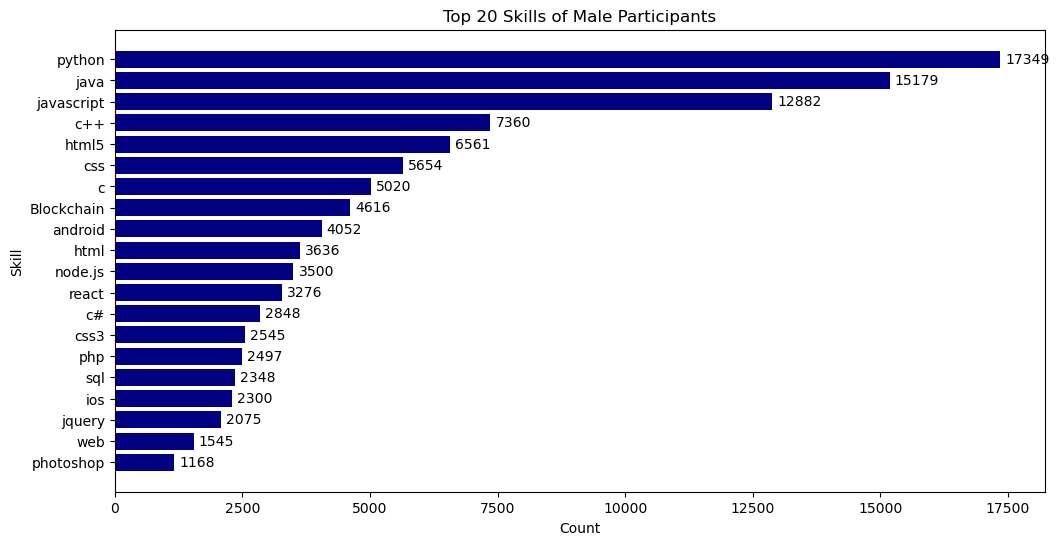

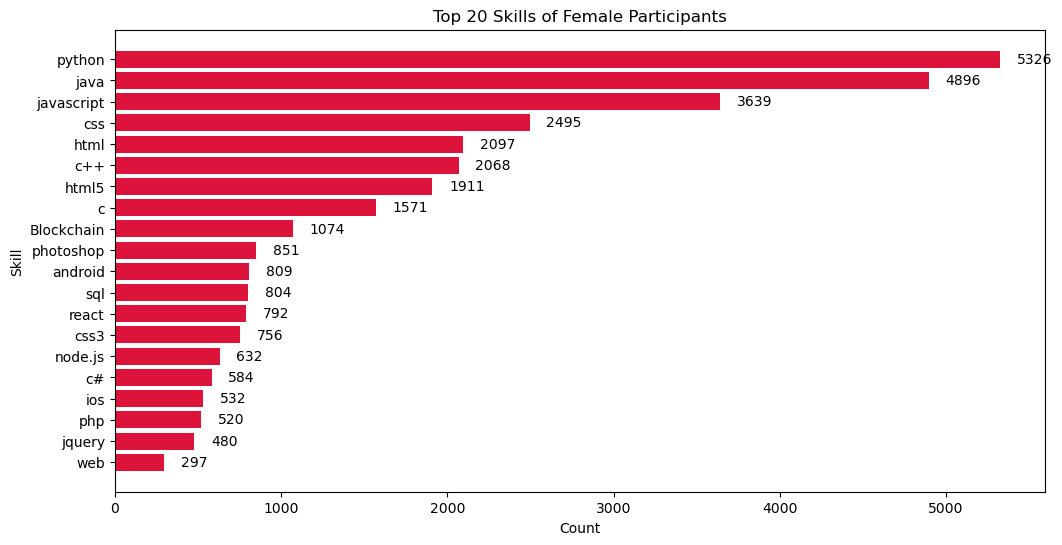

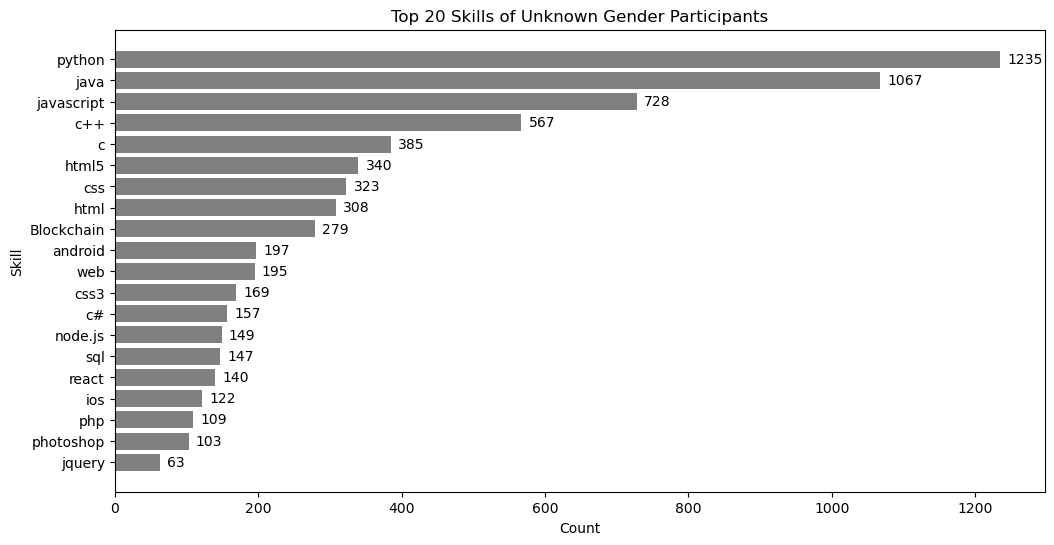

In [58]:
## Approach 1: Using the top 20 skills found regardless of gender

# Get the top 20 skills regardless of gender
exploded_skills['skills'] = exploded_skills['skills'].str.strip()
exploded_skills = exploded_skills[exploded_skills['skills'] != '']  # Remove empty strings
exploded_skills = exploded_skills[exploded_skills['skills'] != ',']  # Remove commas

top_skills = exploded_skills['skills'].value_counts().head(20).index

# Filter participants_expanded to include only the top skills
filtered_skills = exploded_skills[exploded_skills['skills'].isin(top_skills)]

# Group by gender and skill, then count
gender_skill_distribution = filtered_skills.groupby(['Gender', 'skills']).size().unstack(fill_value=0)

# Separate distributions for each gender
male_skills = gender_skill_distribution.loc['m'].sort_values(ascending=False)
female_skills = gender_skill_distribution.loc['f'].sort_values(ascending=False)
unknown_skills = gender_skill_distribution.loc['unknown'].sort_values(ascending=False)

# Plotting for male participants
plt.figure(figsize=(12, 6))
bars = plt.barh(male_skills.index, male_skills.values, color='navy')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 20 Skills of Male Participants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Adding value numbers to the bars
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center')

plt.show()

# Plotting for female participants
plt.figure(figsize=(12, 6))
bars = plt.barh(female_skills.index, female_skills.values, color='crimson')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 20 Skills of Female Participants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Adding value numbers to the bars
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center')

plt.show()

# Plotting for unknown gender participants
plt.figure(figsize=(12, 6))
bars = plt.barh(unknown_skills.index, unknown_skills.values, color='gray')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 20 Skills of Unknown Gender Participants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Adding value numbers to the bars
for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center')

plt.show()


In [59]:
male_skills

skills
python        17349
java          15179
javascript    12882
c++            7360
html5          6561
css            5654
c              5020
Blockchain     4616
android        4052
html           3636
node.js        3500
react          3276
c#             2848
css3           2545
php            2497
sql            2348
ios            2300
jquery         2075
web            1545
photoshop      1168
Name: m, dtype: int64

In [60]:
female_skills

skills
python        5326
java          4896
javascript    3639
css           2495
html          2097
c++           2068
html5         1911
c             1571
Blockchain    1074
photoshop      851
android        809
sql            804
react          792
css3           756
node.js        632
c#             584
ios            532
php            520
jquery         480
web            297
Name: f, dtype: int64

In [61]:
unknown_skills

skills
python        1235
java          1067
javascript     728
c++            567
c              385
html5          340
css            323
html           308
Blockchain     279
android        197
web            195
css3           169
c#             157
node.js        149
sql            147
react          140
ios            122
php            109
photoshop      103
jquery          63
Name: unknown, dtype: int64

In [62]:
# Print top 20 skills for each gender using approach 1 
# print('Top 20 male skills: ','\n',male_skills) 
# print('\n')
# print('Top 20 female skills: ','\n',female_skills)
#print(unknown_skills)

### *Approach 2: Finding the top 20 skills for each gender separately*

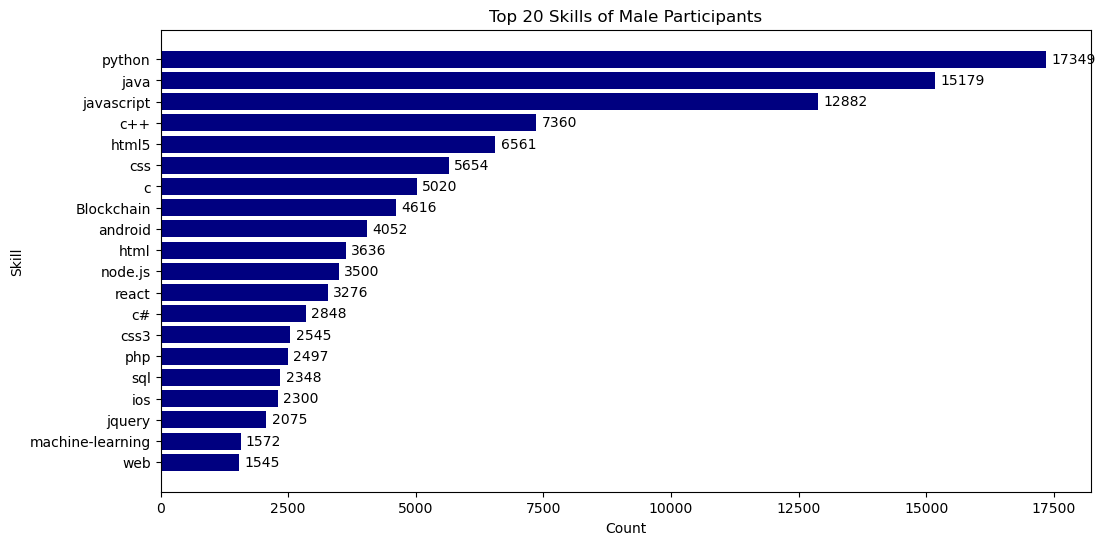

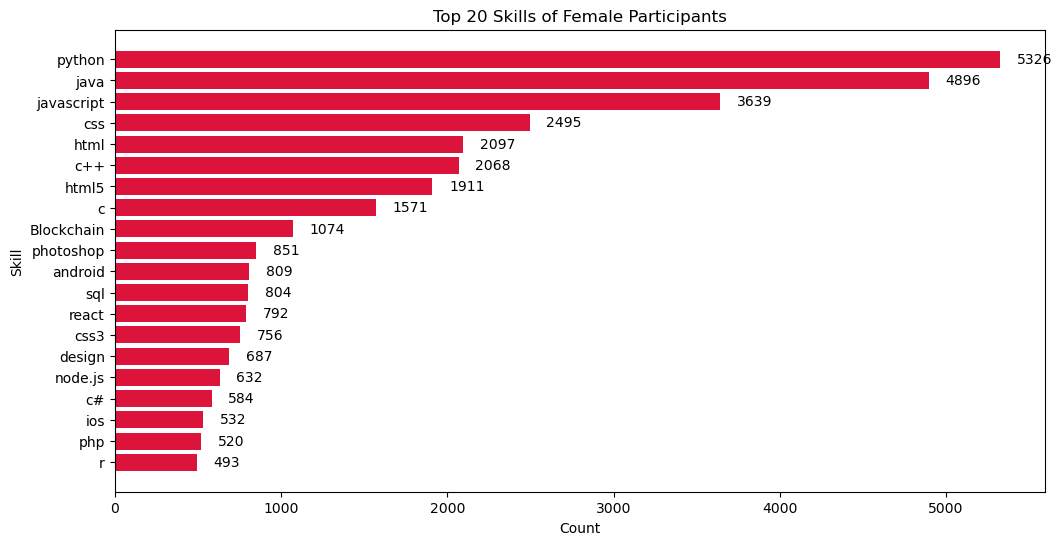

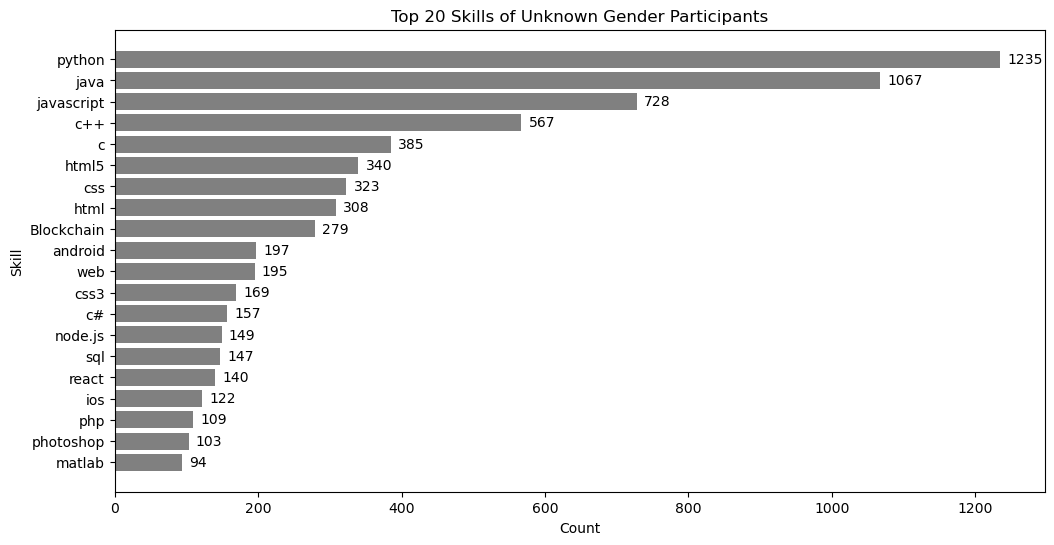

In [63]:
## Approach 2: Finding the top 20 skills for each gender separately

# Explode the skills column
all_skills = exploded_skills
all_skills['skills'] = all_skills['skills'].str.strip()
all_skills = all_skills[all_skills['skills'] != '']  # Remove empty strings
all_skills = all_skills[all_skills['skills'] != ',']  # Remove commas

# Group by gender and skill, then count
gender_skill_distribution = all_skills.groupby(['Gender', 'skills']).size().unstack(fill_value=0)

# Separate distributions for each gender and get top 20 skills
male_skills = gender_skill_distribution.loc['m'].sort_values(ascending=False).head(20)
female_skills = gender_skill_distribution.loc['f'].sort_values(ascending=False).head(20)
unknown_skills = gender_skill_distribution.loc['unknown'].sort_values(ascending=False).head(20)

# Plotting for male participants
plt.figure(figsize=(12, 6))
bars = plt.barh(male_skills.index, male_skills.values, color='navy')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 20 Skills of Male Participants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Adding value numbers to the bars
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center')

plt.show()

# Plotting for female participants
plt.figure(figsize=(12, 6))
bars = plt.barh(female_skills.index, female_skills.values, color='crimson')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 20 Skills of Female Participants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Adding value numbers to the bars
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center')

plt.show()

# Plotting for unknown gender participants
plt.figure(figsize=(12, 6))
bars = plt.barh(unknown_skills.index, unknown_skills.values, color='gray')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 20 Skills of Unknown Gender Participants')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Adding value numbers to the bars
for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center')

plt.show()

### *Differences between approach 1 and 2:*
1) Males
- Common Skills: Both approaches have the same top skills for male participants, reflecting the consistency of these skills' popularity regardless of the approach.
- Additional Skills: Approach 2 includes "Machine Learning" (1,572) in the top 20, which was not present in the top 20 list derived from approach 1.
- Similar Skills: The rankings and counts are consistent between both approaches, indicating that the inclusion of other genders' skills in the first approach does not significantly impact the top skills for males.
- The presence of "Machine Learning" in the male-specific top 20 list from approach 2 highlights its importance among male participants, even though it did not make the overall top 20 in approach 1.
- Consistency: The consistency between the two approaches suggests that the primary skills identified are robust and prevalent among male participants.

2) Female
- Skill Overlap: Both approaches show significant overlap in the top skills for female participants. The primary difference is the inclusion of additional specific skills like 'design' and 'r' in Approach 2.
- Skill Popularity: Python, Java, and JavaScript consistently rank as the top skills in both approaches, indicating their high importance among female participants.
- Additional Skills: Approach 2 provides a broader view by including additional skills that are not as prominent in Approach 1, offering a more comprehensive look at participants' capabilities.


### <span style='color:green'> Feedback: use approach 1 and make a stacked bar chart that shows the prorption of m,f,and unknowns in each of the top 20 skills. if time, normalise the batches to better represent (since it is heavier on the male side)</span>

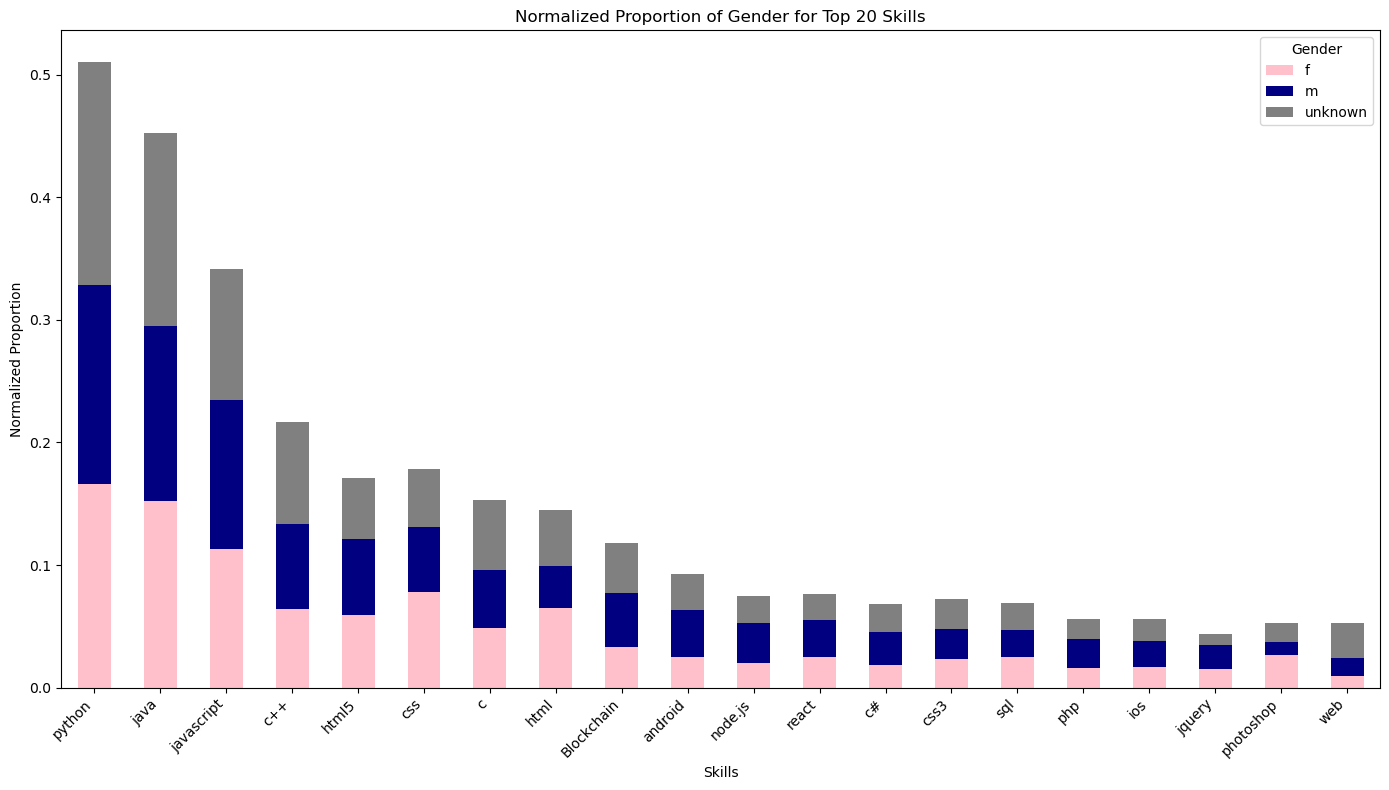

Normalized Proportion of Gender for Top 20 Skills:
skills     python      java  javascript       c++     html5       css  \
Gender                                                                  
f        0.165743  0.152362    0.113245  0.064356  0.059470  0.077644   
m        0.163038  0.142645    0.121059  0.069166  0.061657  0.053134   
unknown  0.182073  0.157305    0.107327  0.083591  0.050125  0.047619   

skills          c      html  Blockchain   android   node.js     react  \
Gender                                                                  
f        0.048889  0.065258    0.033423  0.025176  0.019668  0.024647   
m        0.047176  0.034169    0.043379  0.038079  0.032891  0.030786   
unknown  0.056760  0.045408    0.041132  0.029043  0.021967  0.020640   

skills         c#      css3       sql       php       ios    jquery  \
Gender                                                                
f        0.018174  0.023526  0.025020  0.016182  0.016556  0.014937   
m   

In [64]:
# Ensure the counts are unique per participant, skill, and gender
unique_skills = filtered_skills.drop_duplicates(subset=['url', 'skills', 'Gender'])

# Group by gender and skill, then count unique participants
gender_skill_distribution_unique = unique_skills.groupby(['Gender', 'skills']).size().unstack(fill_value=0)

# Calculate the total counts for each gender
gender_totals = gender_skill_distribution_unique.sum(axis=1)

# Normalize the counts by the total number of participants for each gender
gender_skill_distribution_normalized = gender_skill_distribution_unique.div(gender_totals, axis=0)

# Filter to include only the top 20 skills
top_skills_list = top_skills.tolist()
top_gender_skill_distribution_normalized = gender_skill_distribution_normalized[top_skills_list]

# Plotting the normalized distribution for the top 20 skills
fig, ax = plt.subplots(figsize=(14, 8))
top_gender_skill_distribution_normalized.T.plot(kind='bar', stacked=True, ax=ax, color=['pink', 'navy', 'gray'])
ax.set_title('Normalized Proportion of Gender for Top 20 Skills')
ax.set_xlabel('Skills')
ax.set_ylabel('Normalized Proportion')
ax.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the normalized counts for validation
print("Normalized Proportion of Gender for Top 20 Skills:")
print(top_gender_skill_distribution_normalized)


### 8b) Skill distribution of TECHNICAL SKILLS VS PROGRAMMING LANGUAGES among male and female participants

In [65]:

'''
# Flatten the list of skills and remove empty values and commas
all_skills = exploded_skills
# all_skills = all_skills[all_skills.str.strip().astype(bool)]  # Remove empty values
all_skills = all_skills[all_skills != ',']  # Remove comma entries

# Count unique skills
unique_skills_counts = all_skills.value_counts().reset_index()
unique_skills_counts.columns = ['Skill', 'Count']

# Display the unique skills and their counts
#print(unique_skills_counts.head(60))
'''
# Flatten the list of skills across all entries
all_skills = [skill for sublist in participants_expanded['skills'] for skill in sublist if skill and skill != ',']

# Convert to Series to utilize value_counts for counting occurrences
skill_series = pd.Series(all_skills)
unique_skills_counts = skill_series.value_counts().reset_index()
unique_skills_counts.columns = ['Skill', 'Count']

# Display the top 60 unique skills
print(unique_skills_counts.head(60))


                  Skill  Count
0                python  23910
1                  java  21142
2            javascript  17249
3                   c++   9995
4                 html5   8812
5                   css   8472
6                     c   6976
7                  html   6041
8            Blockchain   5969
9               android   5058
10              node.js   4281
11                react   4208
12                   c#   3589
13                 css3   3470
14                  sql   3299
15                  php   3126
16                  ios   2954
17               jquery   2618
18            photoshop   2122
19                  web   2037
20     machine-learning   2009
21              arduino   1784
22                unity   1755
23                mysql   1754
24               matlab   1718
25              mongodb   1632
26                swift   1589
27               design   1493
28                    r   1471
29           angular.js   1372
30               django   1209
31  amaz

<Figure size 1400x1000 with 0 Axes>

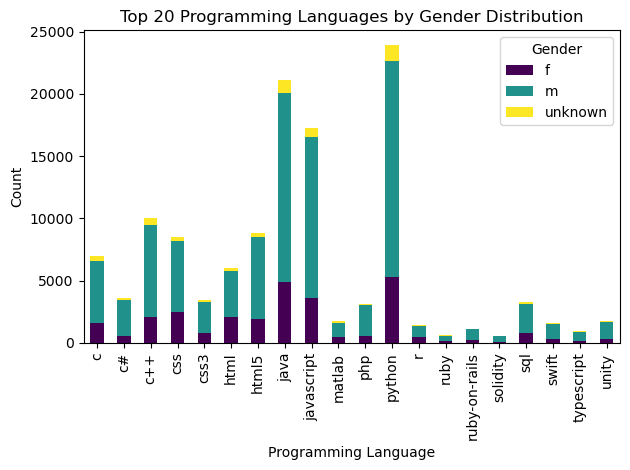

<Figure size 1400x1000 with 0 Axes>

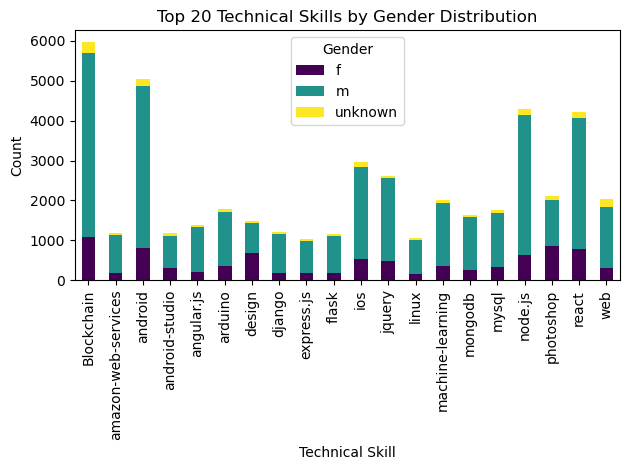

In [66]:
# Classification of skills
classification = {
    'python': 'PL', 'java': 'PL', 'javascript': 'PL', 'c++': 'PL', 'html5': 'PL', 'css': 'PL', 'c': 'PL',
    'html': 'PL', 'Blockchain': 'TS', 'android': 'TS', 'node.js': 'TS', 'react': 'TS', 'c#': 'PL', 
    'css3': 'PL', 'sql': 'PL', 'php': 'PL', 'ios': 'TS', 'jquery': 'TS', 'photoshop': 'TS', 'web': 'TS',
    'machine-learning': 'TS', 'arduino': 'TS', 'unity': 'PL', 'mysql': 'TS', 'matlab': 'PL', 'mongodb': 'TS',
    'swift': 'PL', 'design': 'TS', 'r': 'PL', 'angular.js': 'TS', 'django': 'TS', 'amazon-web-services': 'TS',
    'boostrap': 'TS', 'android-studio': 'TS', 'flask': 'TS', 'ruby-on-rails': 'PL', 'linux': 'TS', 
    'express.js': 'TS', 'adobe-illustrator': 'TS', 'git': 'TS', 'firebase': 'TS', 'typescript': 'PL', 
    'react-native': 'TS', 'windows': 'TS', 'hardware': 'TS', 'flutter': 'TS', 'github': 'TS', 'postgresql': 'TS',
    'raspberry-pi': 'TS', 'ruby': 'PL', 'solidity': 'PL', 'pandas': 'TS', 'bash': 'PL'
}

# Apply classification
unique_skills_counts['Category'] = unique_skills_counts['Skill'].map(classification)

# Separate DataFrames for PL and TS
pl_skills = unique_skills_counts[unique_skills_counts['Category'] == 'PL'].nlargest(20, 'Count')
ts_skills = unique_skills_counts[unique_skills_counts['Category'] == 'TS'].nlargest(20, 'Count')

# Merge with original participants_expanded DataFrame to get gender distribution
#pl_distribution = participants_expanded.explode('skills')
pl_distribution = exploded_skills
pl_distribution = pl_distribution[pl_distribution['skills'].isin(pl_skills['Skill'])]

# ts_distribution = participants_expanded.explode('skills')
ts_distribution = exploded_skills
ts_distribution = ts_distribution[ts_distribution['skills'].isin(ts_skills['Skill'])]

# Calculate counts by gender
pl_gender_distribution = pl_distribution.groupby(['skills', 'Gender']).size().unstack(fill_value=0)
ts_gender_distribution = ts_distribution.groupby(['skills', 'Gender']).size().unstack(fill_value=0)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Programming Languages
plt.figure(figsize=(14, 10))
pl_gender_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 20 Programming Languages by Gender Distribution')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Plot for Technical Skills
plt.figure(figsize=(14, 10))
ts_gender_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 20 Technical Skills by Gender Distribution')
plt.xlabel('Technical Skill')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


*Explanation:*
Classification: The classification dictionary maps each skill to its category.
Apply Classification: The unique_skills_counts DataFrame is updated with the category for each skill.
Filter Top Skills: The top 20 programming languages (PL) and technical skills (TS) are extracted based on their counts.
Gender Distribution: The distribution of genders for the top PL and TS skills is calculated using the participants_expanded DataFrame.
Plotting: Stacked bar plots are created to visualize the gender distribution for the top 20 programming languages and technical skills.

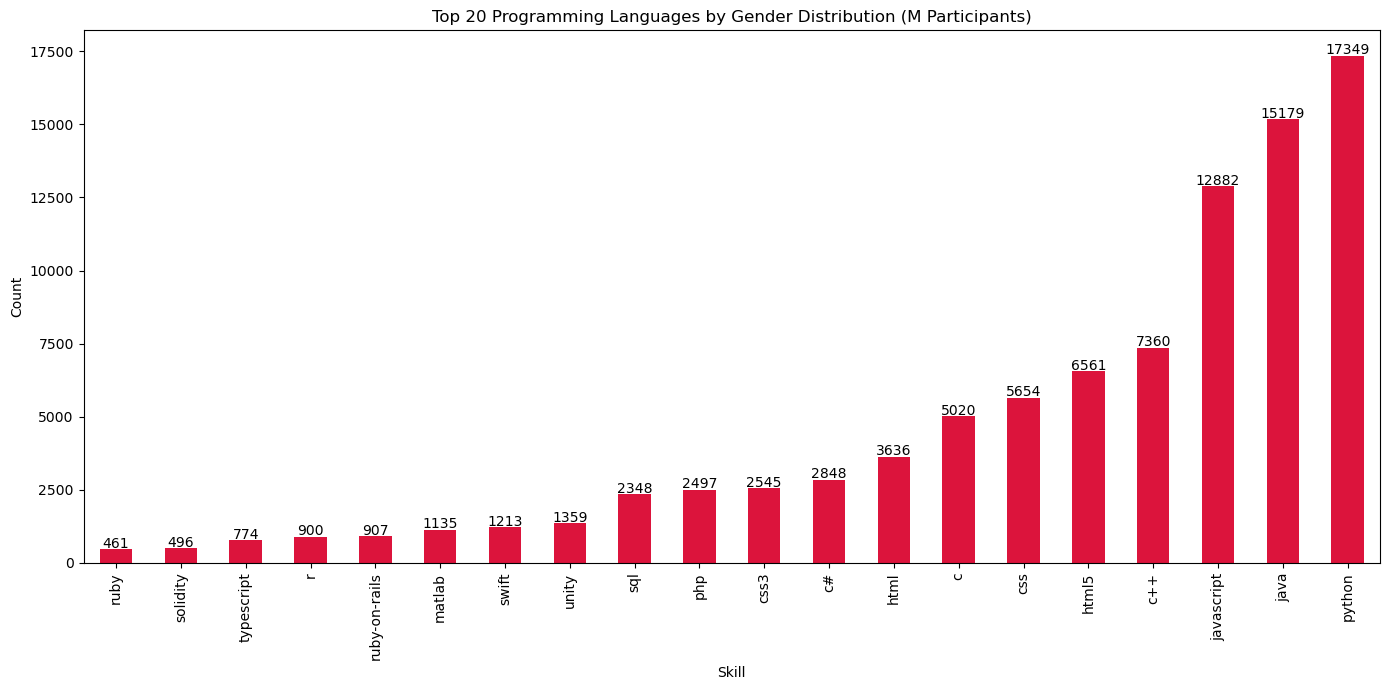

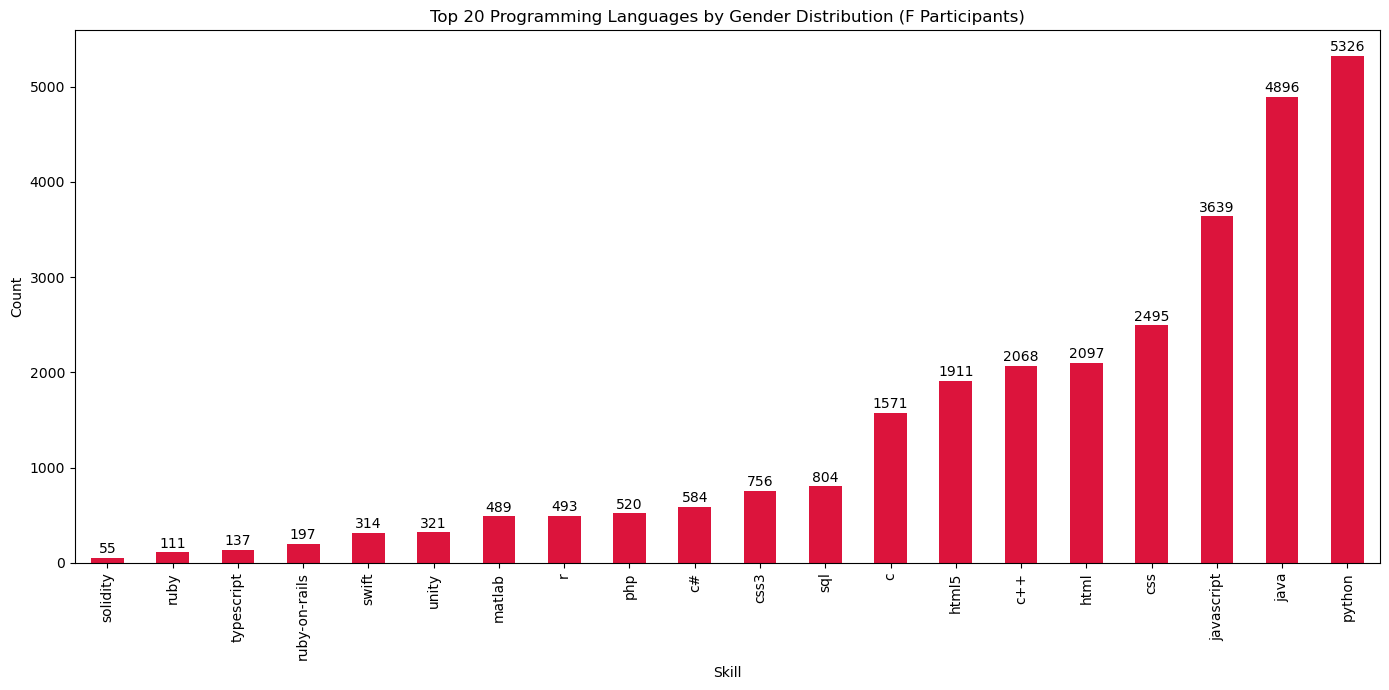

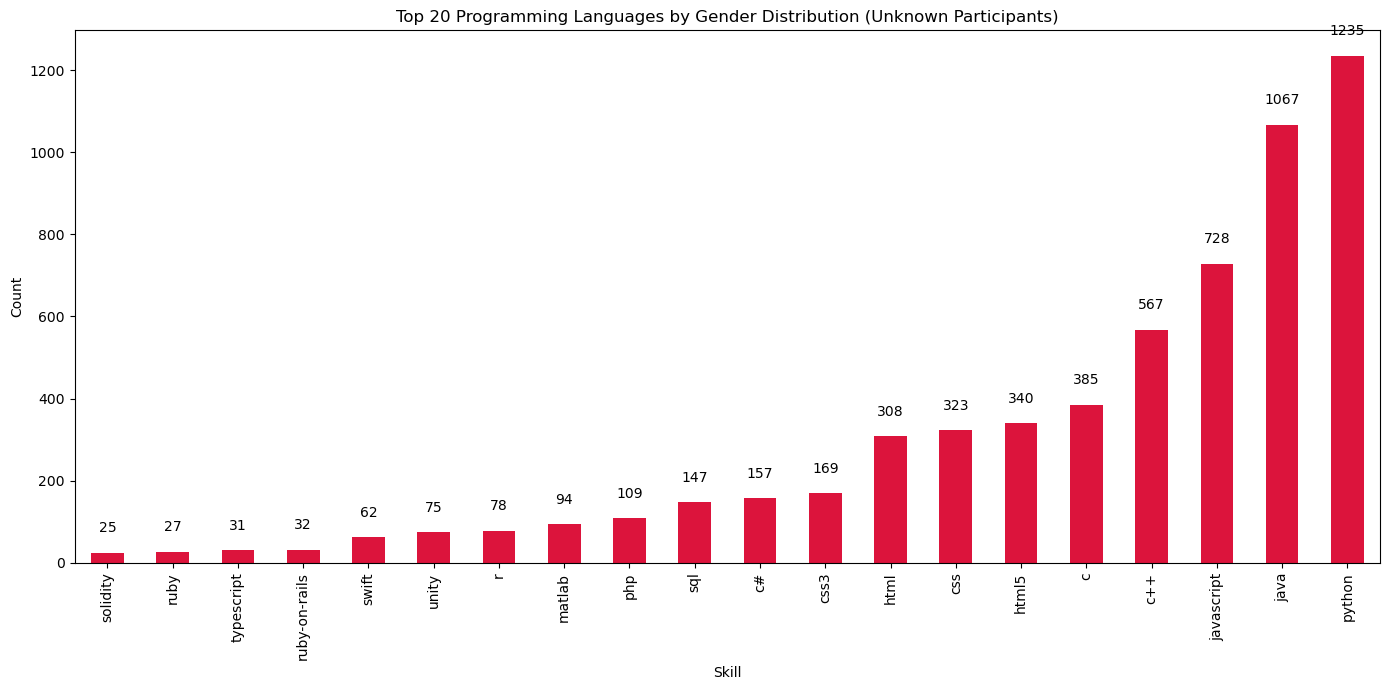

In [67]:
# Define a function to plot the distributions
def plot_skill_distribution(distribution, gender, title):
    plt.figure(figsize=(14, 7))
    if gender in distribution.columns:
        distribution_sorted = distribution[gender].sort_values(ascending=True)
        distribution_sorted.plot(kind='bar', color='crimson')
        plt.title(f'{title} ({gender.capitalize()} Participants)')
        plt.xlabel('Skill')
        plt.ylabel('Count')
        for i, v in enumerate(distribution_sorted):
            plt.text(i, v + 50, str(v), color='black', ha='center')
    else:
        plt.title(f'{title} ({gender.capitalize()} Participants)')
        plt.xlabel('Skill')
        plt.ylabel('Count')
        plt.text(0.5, 0.5, 'No Data Available', horizontalalignment='center', verticalalignment='center')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Plot for Programming Languages
plot_skill_distribution(pl_gender_distribution, 'm', 'Top 20 Programming Languages by Gender Distribution')
plot_skill_distribution(pl_gender_distribution, 'f', 'Top 20 Programming Languages by Gender Distribution')
plot_skill_distribution(pl_gender_distribution, 'unknown', 'Top 20 Programming Languages by Gender Distribution')


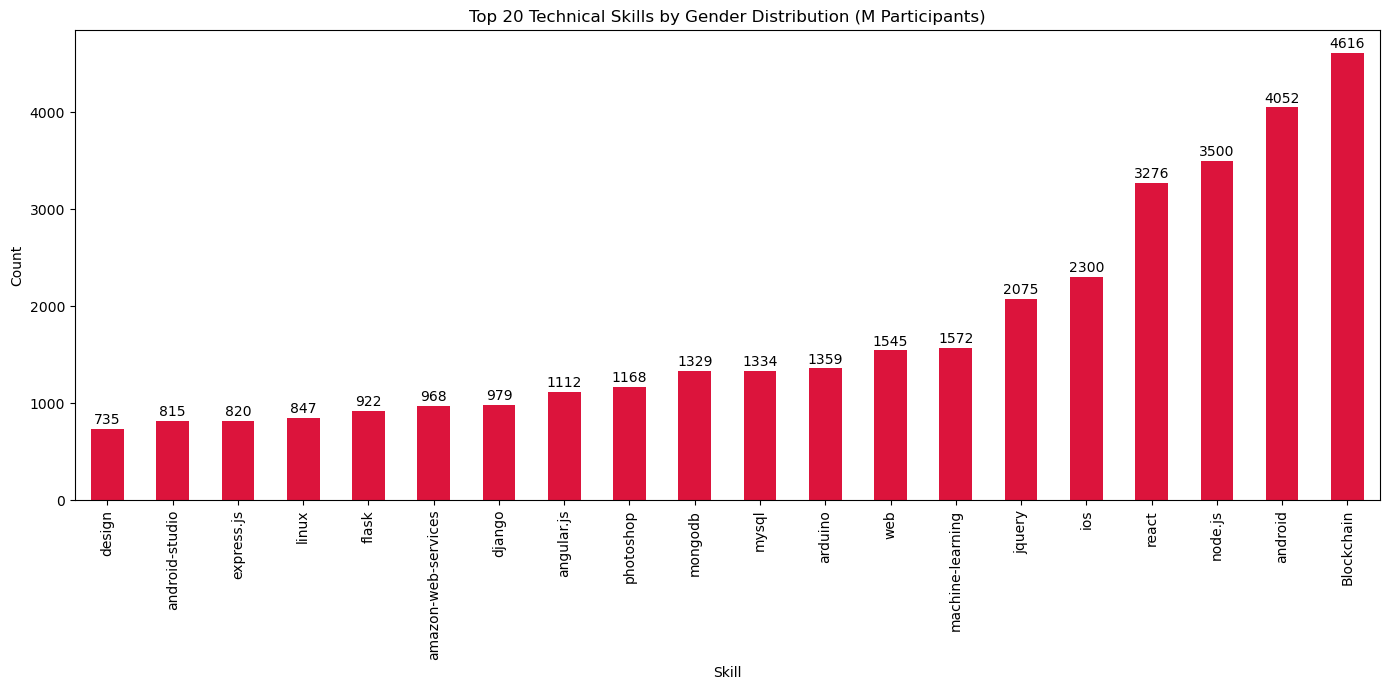

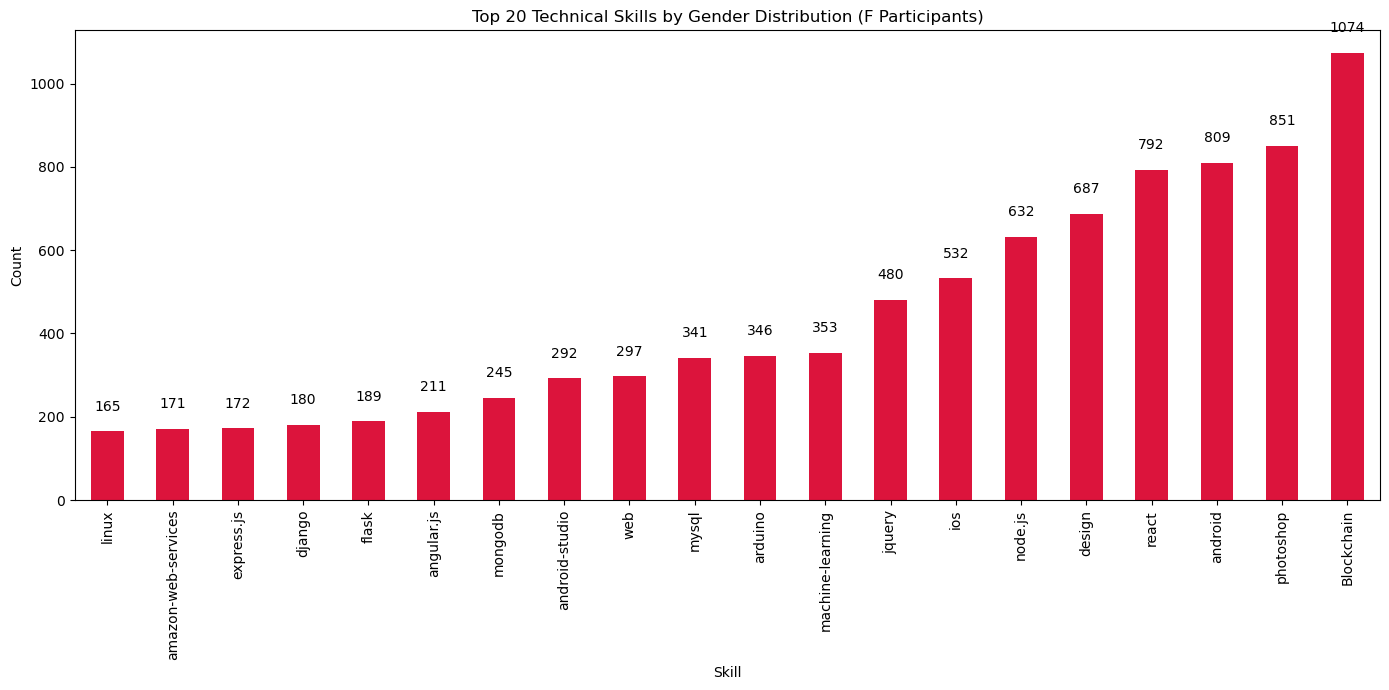

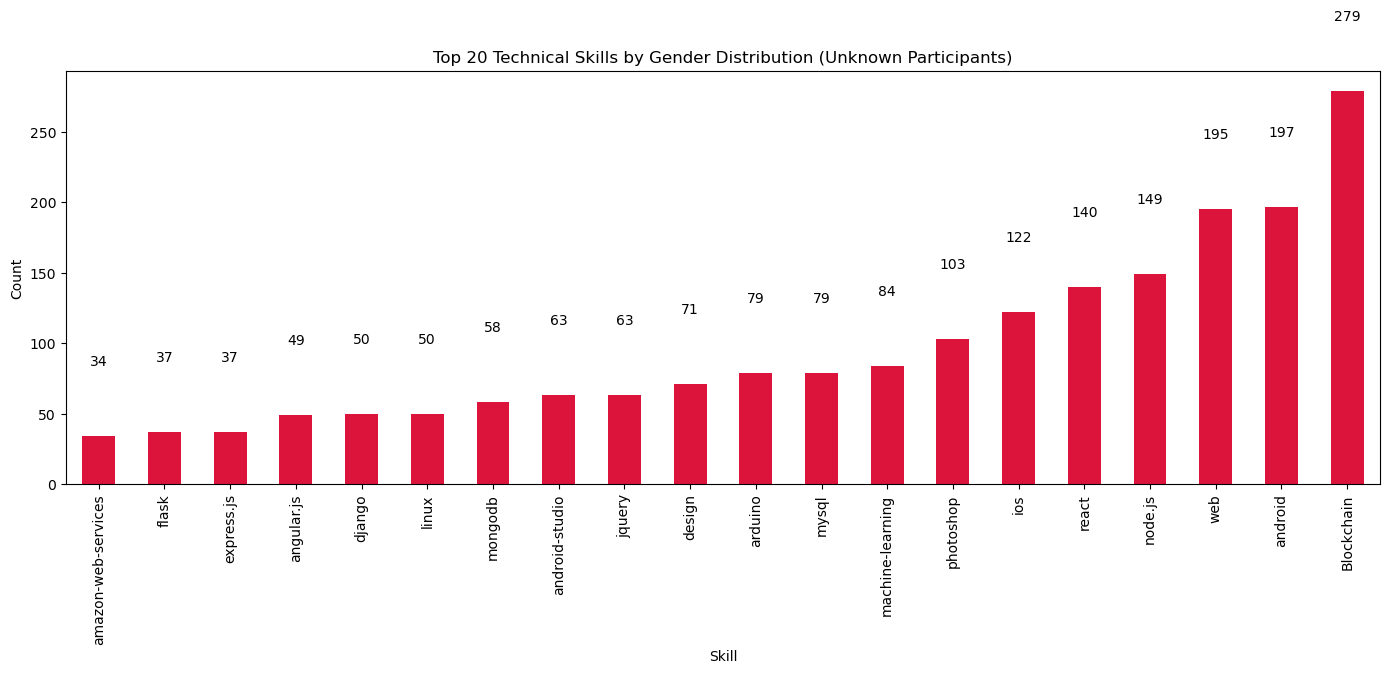

In [68]:
# Plot for Technical Skills
plot_skill_distribution(ts_gender_distribution, 'm', 'Top 20 Technical Skills by Gender Distribution')
plot_skill_distribution(ts_gender_distribution, 'f', 'Top 20 Technical Skills by Gender Distribution')
plot_skill_distribution(ts_gender_distribution, 'unknown', 'Top 20 Technical Skills by Gender Distribution')

### 8c) Chi square test of independence
To test the relationship or independence between the gender variable (male or female) and the type of skill (technical skill or programming language), you can use a chi-square test of independence. This statistical test is appropriate for categorical data and helps determine if there is a significant association between two categorical variables.
Steps:
1) Create a Contingency Table:
Construct a table that displays the frequency distribution of the variables. In this case, it will be a table with gender on one axis and type of skill on the other.

2) Calculate Expected Frequencies:
Determine the expected frequencies for each cell of the table if there were no association between the variables.

3) Compute the Chi-Square Statistic:
Compare the observed frequencies with the expected frequencies using the chi-square formula.

4) Determine the p-value:
Use the chi-square distribution to find the p-value associated with the computed chi-square statistic.

5) Interpret the Results:
If the p-value is less than the chosen significance level (e.g., 0.05), reject the null hypothesis, which states that the variables are independent. Otherwise, do not reject the null hypothesis.

In [69]:
# '''
# Classification of skills
classification = {
    'python': 'PL', 'java': 'PL', 'javascript': 'PL', 'c++': 'PL', 'html5': 'PL', 'css': 'PL', 'c': 'PL',
    'html': 'PL', 'Blockchain': 'TS', 'android': 'TS', 'node.js': 'TS', 'react': 'TS', 'c#': 'PL', 
    'css3': 'TS', 'sql': 'PL', 'php': 'PL', 'ios': 'TS', 'jquery': 'TS', 'photoshop': 'TS', 'web': 'TS',
    'machine-learning': 'TS', 'arduino': 'TS', 'unity': 'PL', 'mysql': 'TS', 'matlab': 'PL', 'mongodb': 'TS',
    'swift': 'PL', 'design': 'TS', 'r': 'PL', 'angular.js': 'TS', 'django': 'TS', 'amazon-web-services': 'TS',
    'bootstrap': 'TS', 'android-studio': 'TS', 'flask': 'TS', 'ruby-on-rails': 'PL', 'linux': 'TS', 
    'express.js': 'TS', 'adobe-illustrator': 'TS', 'git': 'TS', 'firebase': 'TS', 'typescript': 'PL', 
    'react-native': 'TS', 'windows': 'TS', 'hardware': 'TS', 'flutter': 'TS', 'github': 'TS', 'postgresql': 'TS',
    'raspberry-pi': 'TS', 'ruby': 'PL', 'solidity': 'PL', 'pandas': 'TS', 'bash': 'PL', 'jira': 'TS', 
    'scala': 'PL', 'kotlin': 'PL', 'sass': 'TS', 'less': 'TS', 'perl': 'PL', 'objective-c': 'PL', 
    'shell': 'PL', 'vba': 'PL', 'salesforce': 'TS', 'spark': 'TS', 'hadoop': 'TS', 'kubernetes': 'TS', 
    'docker': 'TS', 'ansible': 'TS', 'puppet': 'TS', 'chef': 'TS', 'jenkins': 'TS', 'travis-ci': 'TS', 
    'circleci': 'TS', 'azure': 'TS', 'gcp': 'TS', 'bigquery': 'TS', 'tableau': 'TS', 'power-bi': 'TS', 
    'd3.js': 'TS', 'vue.js': 'TS', 'svelte': 'TS', 'next.js': 'TS', 'nuxt.js': 'TS', 'gatsby': 'TS',
    'redux': 'TS', 'mobx': 'TS', 'ember.js': 'TS', 'backbone.js': 'TS', 'three.js': 'TS', 'webgl': 'TS',
    'tensorflow': 'TS', 'keras': 'TS', 'pytorch': 'TS', 'theano': 'TS', 'mxnet': 'TS', 'opencv': 'TS',
    'nltk': 'TS', 'spacy': 'TS', 'gensim': 'TS', 'beautifulsoup': 'TS', 'scrapy': 'TS', 'selenium': 'TS',
    'robot-framework': 'TS', 'cucumber': 'TS', 'pytest': 'TS', 'unittest': 'TS', 'mocha': 'TS', 'chai': 'TS',
    'jest': 'TS', 'karma': 'TS', 'enzyme': 'TS', 'nightwatch.js': 'TS', 'phantomjs': 'TS', 'protractor': 'TS',
    'cypress': 'TS', 'webdriverio': 'TS', 'testcafe': 'TS', 'grunt': 'TS', 'gulp': 'TS', 'webpack': 'TS',
    'rollup': 'TS', 'parcel': 'TS', 'browserify': 'TS', 'babel': 'TS', 'typescript': 'PL', 'flow': 'TS',
    'eslint': 'TS', 'prettier': 'TS', 'stylelint': 'TS', 'eslint-config-airbnb': 'TS', 'eslint-config-google': 'TS',
    'eslint-plugin-react': 'TS', 'eslint-plugin-jsx-a11y': 'TS', 'eslint-plugin-import': 'TS', 'eslint-plugin-flowtype': 'TS',
    'eslint-plugin-vue': 'TS', 'eslint-plugin-promise': 'TS', 'eslint-plugin-standard': 'TS', 'eslint-plugin-node': 'TS',
    'eslint-plugin-security': 'TS', 'eslint-plugin-compat': 'TS', 'eslint-plugin-functional': 'TS', 'eslint-plugin-optimize-regex': 'TS'
}
# '''

'''
# Classification of skills
classification = {
    'python': 'PL', 'java': 'PL', 'javascript': 'PL', 'c++': 'PL', 'html5': 'PL', 'css': 'PL', 'c': 'PL',
    'html': 'PL', 'Blockchain': 'TS', 'android': 'TS', 'node.js': 'TS', 'react': 'TS', 'c#': 'PL', 
    'css3': 'PL', 'sql': 'PL', 'php': 'PL', 'ios': 'TS', 'jquery': 'TS', 'photoshop': 'TS', 'web': 'TS',
    'machine-learning': 'TS', 'arduino': 'TS', 'unity': 'PL', 'mysql': 'TS', 'matlab': 'PL', 'mongodb': 'TS',
    'swift': 'PL', 'design': 'TS', 'r': 'PL', 'angular.js': 'TS', 'django': 'TS', 'amazon-web-services': 'TS',
    'boostrap': 'TS', 'android-studio': 'TS', 'flask': 'TS', 'ruby-on-rails': 'PL', 'linux': 'TS', 
    'typescript': 'PL', 'ruby': 'PL', 'solidity': 'PL'
}
'''

# Convert skills column to list format if not already
# participants_expanded['skills'] = participants_expanded['skills'].apply(lambda x: x.split('|') if isinstance(x, str) else x)

# Explode the skills list
participants_expanded_exploded = participants_expanded.explode('skills')

# Apply classification
participants_expanded_exploded['Category'] = participants_expanded_exploded['skills'].apply(lambda x: classification.get(x, 'Other'))

# Create contingency table for gender and skill category
contingency_table = pd.crosstab(participants_expanded_exploded['Gender'], participants_expanded_exploded['Category'])

# Perform Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print('\n')
# Display the observed frequencies table
print("Observed Frequencies Table:")
print(contingency_table)
print('\n')
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))
print('\n')
# Interpretation
if p < 0.05:
    print("Reject the null hypothesis. Thus, there is a significant association between gender and skill category.")
else:
    print("Fail to reject the null hypothesis. Thus, there is no significant association between gender and skill category.")

Chi-Square Statistic: 485.3646536272276
P-value: 9.800057916562529e-104
Degrees of Freedom: 4


Observed Frequencies Table:
Category  Other     PL     TS
Gender                       
f         18068  28250  12310
m         55316  89619  48208
unknown    4118   5844   2694


Expected Frequencies Table:
Category         Other            PL            TS
Gender                                            
f         17183.522318  27429.293393  14015.184289
m         56609.078445  90362.557375  46171.364180
unknown    3709.399237   5921.149232   3025.451531


Reject the null hypothesis. Thus, there is a significant association between gender and skill category.


### <span style='color:Red'> Feedback:again, use the top 20/60 skills for this and either put the rest in other category or just not consider it at all. </span>

**Interpretation:**

The null hypothesis for the Chi-Square test of independence states that there is no association between the two categorical variables (gender and skill category).
Given the p-value is significantly less than 0.05, we reject the null hypothesis.
This means there is a significant association between gender and skill category, indicating that the distribution of skill categories (Technical Skills, Programming Languages, and Other) is dependent on gender.

### *Future work for this:*
 If many skills are classified as 'Other' due to lack of specific categorization, the results might be biased. To improve the accuracy and fairness of the analysis, it would be better to classify as many skills as possible. 
 - Complete Skill Classification:
Continuously update and refine the skill classification dictionary to ensure comprehensive coverage of all skills.
Use a combination of automated tools and manual review to classify new and uncommon skills accurately.

In [70]:
participants_expanded.head(20) # everything fine till here
participants_copy = participants_expanded.copy()

In [71]:
participants_copy.head(20)

url                name  \
0        https://devpost.com/CraigHiller        Craig Hiller   
1           https://devpost.com/asheleby      Andrew Sheleby   
2          https://devpost.com/evanho239             Evan Ho   
3            https://devpost.com/brilamb           Brian Lam   
4          https://devpost.com/linpeng06            lin peng   
5           https://devpost.com/Dendygar        Denis Mukhin   
6      https://devpost.com/FarnazFooladi      Farnaz Fooladi   
7             https://devpost.com/Farnad    Farnad Jahanshah   
8           https://devpost.com/BookSock        Jason Seibel   
9          https://devpost.com/cathyjiao          Cathy Jiao   
10          https://devpost.com/YichenLu           Yichen Lu   
11        https://devpost.com/jorgec4444       Jorge Vinagre   
12       https://devpost.com/MariaMangru  MariaMangru Mangru   
13          https://devpost.com/YunChuan      Yun Chuan Ngin   
14  https://devpost.com/AbdullahAlhutami   Abdullah Alhutami   
15    https://devpost.com/mariamsinger08       Mariam Singer   
16          https://devpost.com/bonnieli           Bonnie Li   
17          https://devpost.com/prasang7      Prasang Sharma   
18           https://devpost.com/Crashnb             Crashnb   
19    https://devpost.com/lakshmidevi777        Lakshmi Devi   

                                               skills  \
0                                                  []   
1   [wordpress, python, tableau, excel, Blockchain, ]   
2   [java, c++, javascript, angular.js, css, html,...   
3                                [java, javascript, ]   
4   [android, javascript, php, java, ios, jquery, ...   
5                                                  []   
6                        [python, c++, html5, css3, ]   
7                                     [c#, mongodb, ]   
8                                                  []   
9                                                  []   
10                                                 []   
11                   [python, java, c, c++, pandas, ]   
12     [python, javascript, html5, css3, bootstrap, ]   
13                                                 []   
14    [html, php, asp.net, css, jquery, javascript, ]   
15                                                 []   
16                                            [web, ]   
17  [android, react-native, redux, javascript, pho...   
18                                                 []   
19             [javascript, html5, python, c#, sql, ]   

                                            interests  \
0                                                  []   
1   [AR/VR, Blockchain, Communication, Cybersecuri...   
2   [Beginner Friendly, Blockchain, Cybersecurity,...   
3   [Communication, Cybersecurity, Gaming, IoT, Ma...   
4                                                  []   
5                                                  []   
6                                                  []   
7                                                  []   
8                                                  []   
9                                                  []   
10                                                 []   
11                       [Machine Learning/AI, Web, ]   
12  [Beginner Friendly, Communication, DevOps, E-c...   
13                                                 []   
14                                                 []   
15                                                 []   
16                                                 []   
17                                                 []   
18                                                 []   
19                                                 []   

                                             projects  \
0                 https://devpost.com/software/googme   
1           https://devpost.com/software/helpr-27tjik   
2       https://devpost.com/software/untitled-for-now   
3   https://devpost.com/software/the-hummingbird-p...   
4          

### 9) Interest distribution

In [72]:
# Remove empty strings and commas from the interests column
participants_expanded['interests'] = participants_expanded['interests'].apply(lambda x: [i for i in x if i not in ['', ',']])

# Explode the interests list
participants_expanded = participants_expanded.explode('interests')

# Display the updated DataFrame
print(participants_expanded[['skills', 'interests']].head())

                                              skills      interests
0                                                 []            NaN
1  [wordpress, python, tableau, excel, Blockchain, ]          AR/VR
1  [wordpress, python, tableau, excel, Blockchain, ]     Blockchain
1  [wordpress, python, tableau, excel, Blockchain, ]  Communication
1  [wordpress, python, tableau, excel, Blockchain, ]  Cybersecurity


In [73]:
participants_expanded.head(20) # can see that the interests have been exploded

url            name  \
0  https://devpost.com/CraigHiller    Craig Hiller   
1     https://devpost.com/asheleby  Andrew Sheleby   
1     https://devpost.com/asheleby  Andrew Sheleby   
1     https://devpost.com/asheleby  Andrew Sheleby   
1     https://devpost.com/asheleby  Andrew Sheleby   
1     https://devpost.com/asheleby  Andrew Sheleby   
1     https://devpost.com/asheleby  Andrew Sheleby   
1     https://devpost.com/asheleby  Andrew Sheleby   
1     https://devpost.com/asheleby  Andrew Sheleby   
1     https://devpost.com/asheleby  Andrew Sheleby   
1     https://devpost.com/asheleby  Andrew Sheleby   
2    https://devpost.com/evanho239         Evan Ho   
2    https://devpost.com/evanho239         Evan Ho   
2    https://devpost.com/evanho239         Evan Ho   
2    https://devpost.com/evanho239         Evan Ho   
2    https://devpost.com/evanho239         Evan Ho   
2    https://devpost.com/evanho239         Evan Ho   
2    https://devpost.com/evanho239         Evan Ho   
2    https://devpost.com/evanho239         Evan Ho   
2    https://devpost.com/evanho239         Evan Ho   

                                              skills            interests  \
0                                                 []                  NaN   
1  [wordpress, python, tableau, excel, Blockchain, ]                AR/VR   
1  [wordpress, python, tableau, excel, Blockchain, ]           Blockchain   
1  [wordpress, python, tableau, excel, Blockchain, ]        Communication   
1  [wordpress, python, tableau, excel, Blockchain, ]        Cybersecurity   
1  [wordpress, python, tableau, excel, Blockchain, ]               Design   
1  [wordpress, python, tableau, excel, Blockchain, ]               DevOps   
1  [wordpress, python, tableau, excel, Blockchain, ]    E-commerce/Retail   
1  [wordpress, python, tableau, excel, Blockchain, ]              Fintech   
1  [wordpress, python, tableau, excel, Blockchain, ]               Gaming   
1  [wordpress, python, tableau, excel, Blockchain, ]                  IoT   
2  [java, c++, javascript, angular.js, css, html,...    Beginner Friendly   
2  [java, c++, javascript, angular.js, css, html,...           Blockchain   
2  [java, c++, javascript, angular.js, css, html,...        Cybersecurity   
2  [java, c++, javascript, angular.js, css, html,...               Design   
2  [java, c++, javascript, angular.js, css, html,...            Education   
2  [java, c++, javascript, angular.js, css, html,...           Enterprise   
2  [java, c++, javascript, angular.js, css, html,...              Fintech   
2  [java, c++, javascript, angular.js, css, html,...  Machine Learning/AI   
2  [java, c++, javascript, angular.js, css, html,...         Productivity   

                                        projects  \
0            https://devpost.com/software/googme   
1      https://devpost.com/software/helpr-27tjik   
1      https://devpost.com/software/helpr-27tjik   
1      https://devpost.com/software/helpr-27tjik   
1      https://devpost.com/software/helpr-27tjik   
1      https://devpost.com/software/helpr-27tjik   
1      https://devpost.com/software/helpr-27tjik   
1      https://devpost.com/software/helpr-27tjik   
1      https://devpost.com/software/helpr-27tjik   
1      https://devpost.com/software/helpr-27tjik   
1      https://devpost.com/software/helpr-27tjik   
2  https://devpost.com/software/untitled-for-now   
2  https://devpost.com/software/untitled-for-now   
2  https://devpost.com/software/untitled-for-now   
2  https://devpost.com/software/untitled-for-now   
2  https://devpost.com/software/untitled-for-now   
2  https://devpost.com/software/untitled-for-now   
2  https://devpost.com/software/untitled-for-now   
2  https://devpost.com/software/untitled-for-now   
2  https://devpost.com/software/untitled-for-now   

                             hackathons   cleaned_names Gender genderize.io  \
0         https://calhacks.devpost.com/    Craig Hiller      m            m   
1  https://hackhealth-2021.

In [74]:
# Count the occurrences of each interest
interest_counts = participants_expanded['interests'].value_counts().reset_index()
interest_counts.columns = ['Interest', 'Count']

# Display the top 20 interests
top_20_interests = interest_counts.head(20)
print(top_20_interests)

               Interest  Count
0   Machine Learning/AI  13487
1           Social Good   9438
2          Productivity   9097
3                Gaming   8148
4         Communication   6418
5                   IoT   6063
6         Cybersecurity   6005
7                 AR/VR   5974
8            Blockchain   5969
9             Lifehacks   5299
10               DevOps   4830
11              Fintech   4540
12                  Web   4257
13    Beginner Friendly   4035
14               Design   3652
15            Education   3085
16               Health   3043
17            Music/Art   2855
18               Mobile   2357
19         Voice skills   2351


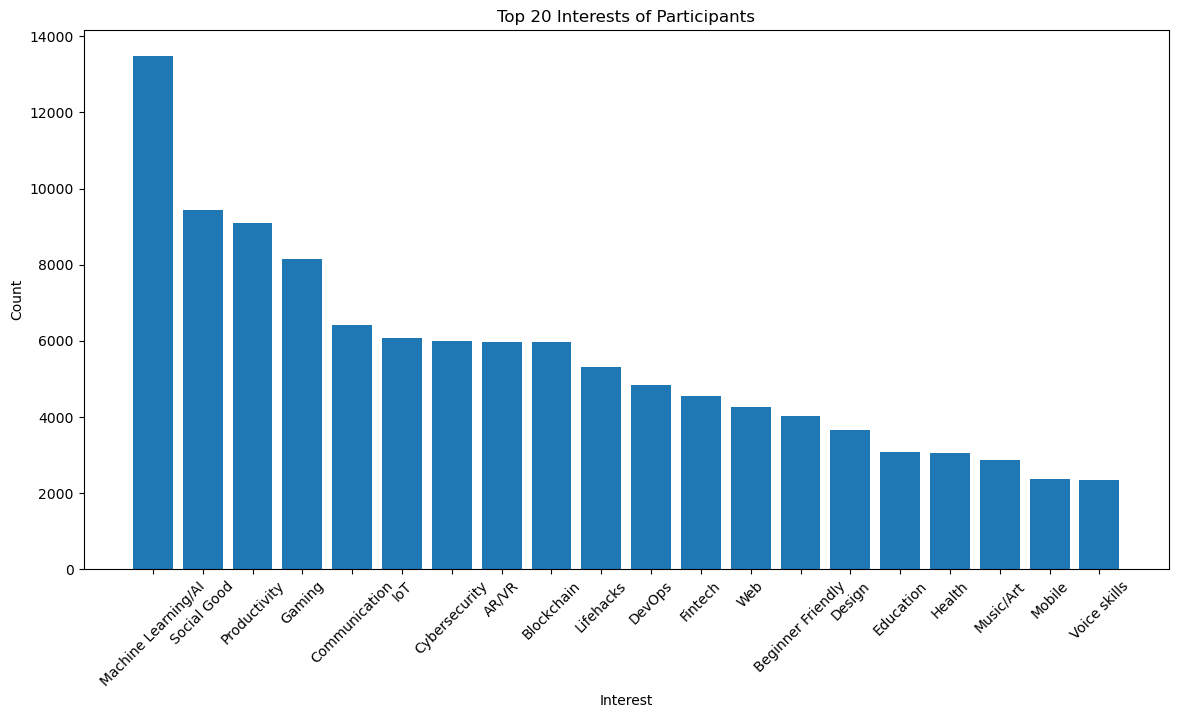

In [75]:
# Plot the top 20 interests
plt.figure(figsize=(14, 7))
plt.bar(top_20_interests['Interest'], top_20_interests['Count'])
plt.title('Top 20 Interests of Participants')
plt.xlabel('Interest')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 9a) Explore Gender Distribution for Top Interests

In [76]:
# Filter for top 20 interests
top_interests = top_20_interests['Interest']

# Get the gender distribution for the top interests
interest_gender_distribution = participants_expanded[participants_expanded['interests'].isin(top_interests)]
interest_gender_distribution = interest_gender_distribution.groupby(['interests', 'Gender']).size().unstack(fill_value=0)

# Display the gender distribution table
print(interest_gender_distribution)


Gender                  f     m  unknown
interests                               
AR/VR                1518  4202      254
Beginner Friendly    1295  2564      176
Blockchain           1074  4616      279
Communication        2080  4062      276
Cybersecurity        1439  4262      304
Design               1281  2217      154
DevOps               1006  3592      232
Education            1011  1940      134
Fintech              1016  3321      203
Gaming               1793  5972      383
Health               1082  1833      128
IoT                  1258  4532      273
Lifehacks            1595  3464      240
Machine Learning/AI  3272  9611      604
Mobile                685  1577       95
Music/Art            1055  1679      121
Productivity         2588  6131      378
Social Good          3338  5723      377
Voice skills          687  1551      113
Web                  1116  2952      189


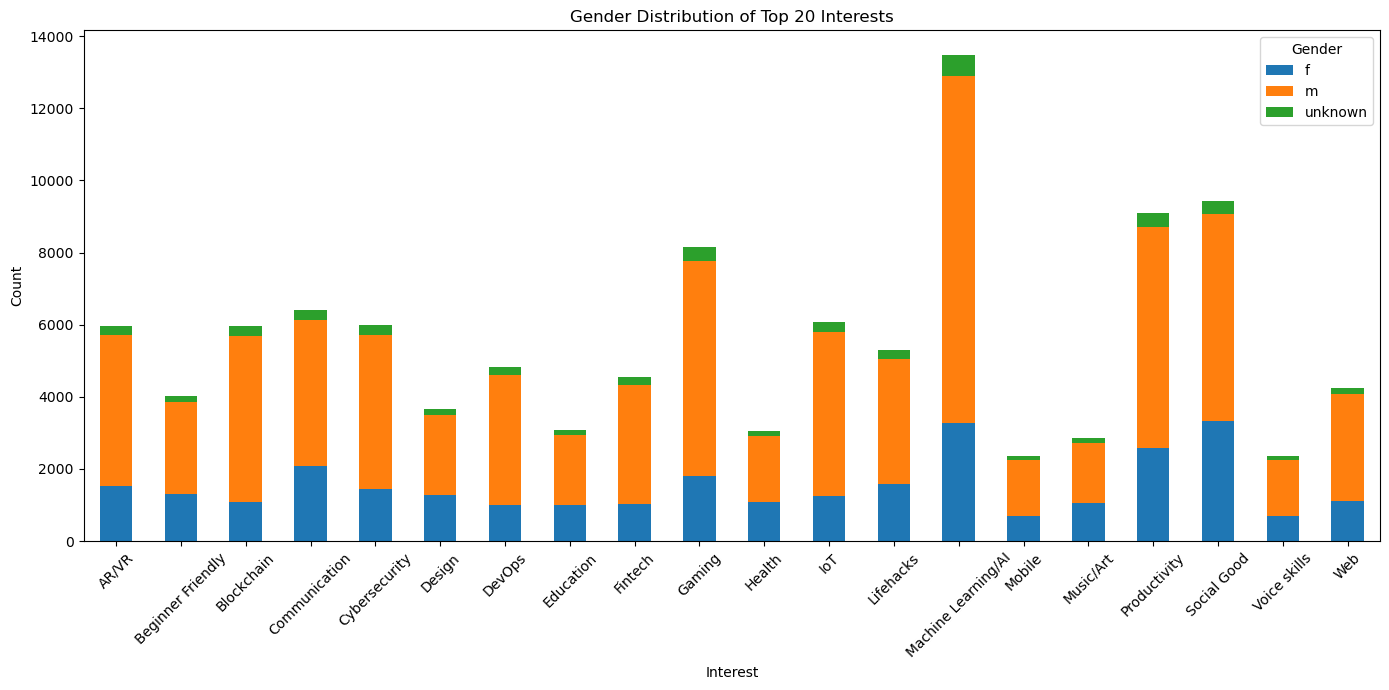

In [77]:
# Plot the gender distribution for top interests
interest_gender_distribution.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Gender Distribution of Top 20 Interests')
plt.xlabel('Interest')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


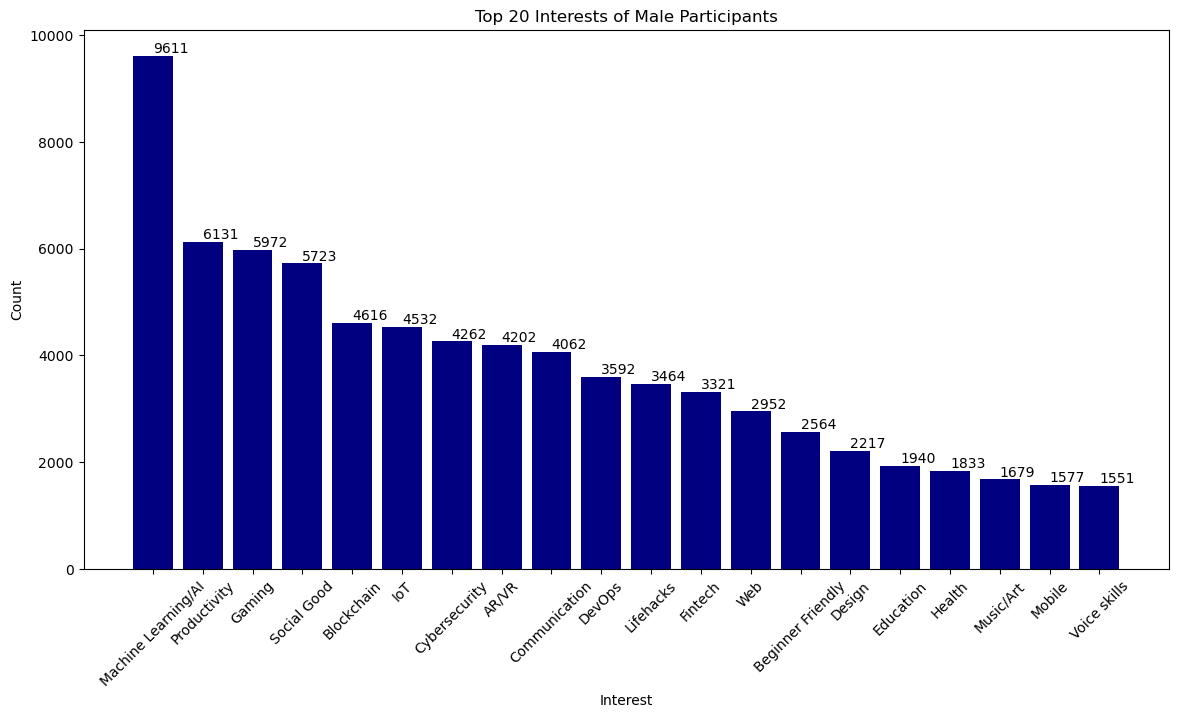

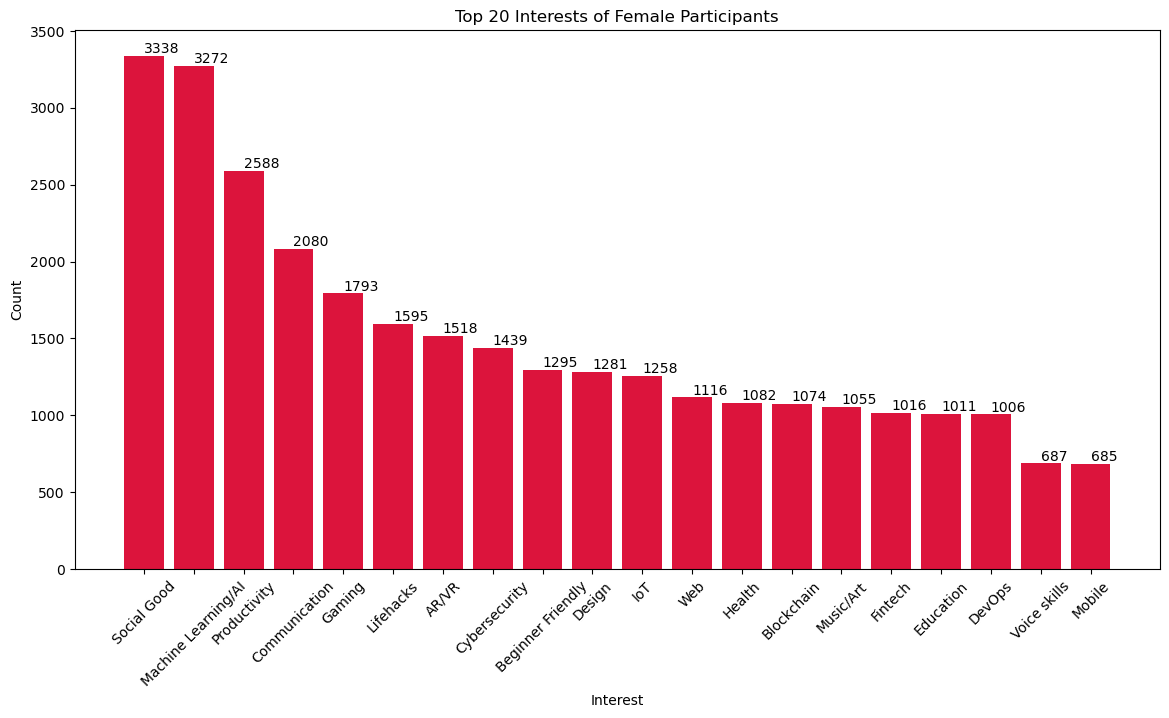

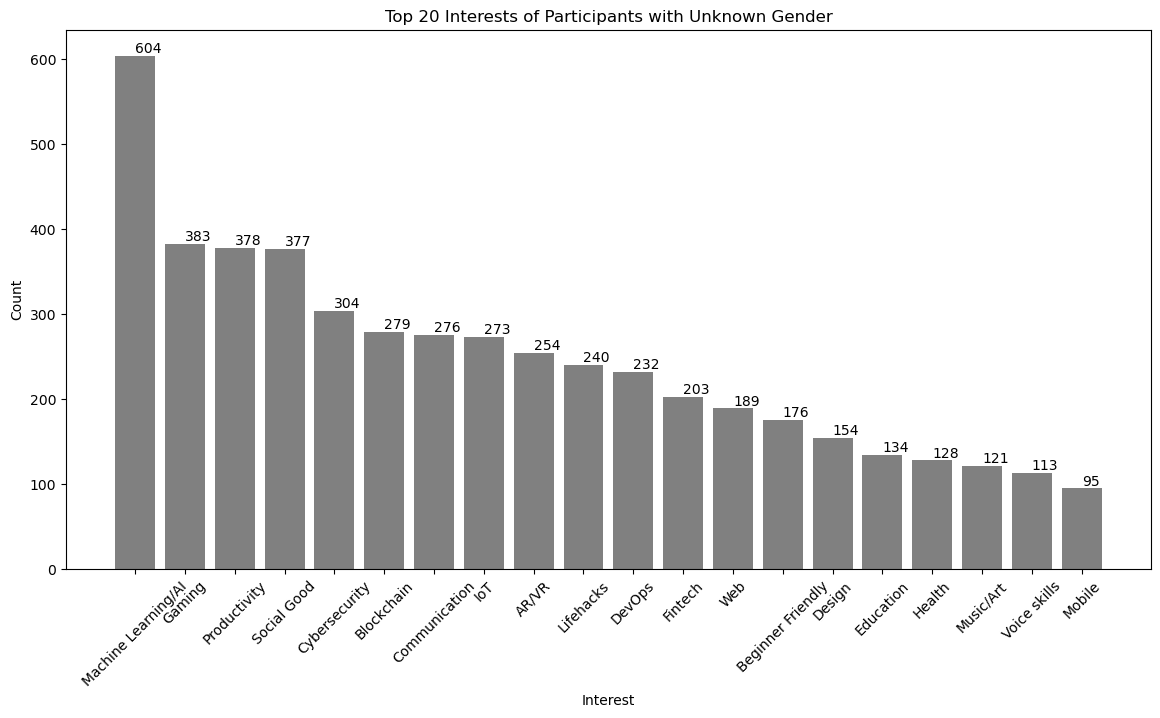

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert pipe-separated strings to lists for 'interests' column, ensuring only lists are processed
def clean_interests(value):
    if isinstance(value, list):
        return value
    elif pd.isna(value) or value in ['', ',']:
        return []
    else:
        return [item.strip() for item in str(value).split('|') if item.strip() not in ['', ',']]

# participants_expanded['interests'] = participants_expanded['interests'].apply(clean_interests)

# Explode the interests list
# participants_expanded = participants_expanded.explode('interests')

# Count the occurrences of each interest
interest_counts = participants_expanded['interests'].value_counts().reset_index()
interest_counts.columns = ['Interest', 'Count']

# Separate data by gender
males = participants_expanded[participants_expanded['Gender'] == 'm']
females = participants_expanded[participants_expanded['Gender'] == 'f']
unknown = participants_expanded[participants_expanded['Gender'] == 'unknown']

# Count top 20 interests for each gender
top_20_interests_males = males['interests'].value_counts().head(20).reset_index()
top_20_interests_males.columns = ['Interest', 'Count']

top_20_interests_females = females['interests'].value_counts().head(20).reset_index()
top_20_interests_females.columns = ['Interest', 'Count']

top_20_interests_unknown = unknown['interests'].value_counts().head(20).reset_index()
top_20_interests_unknown.columns = ['Interest', 'Count']

# Function to plot the top 20 interests for each gender
def plot_top_interests(data, title, color):
    plt.figure(figsize=(14, 7))
    bars = plt.bar(data['Interest'], data['Count'], color=color)
    plt.title(title)
    plt.xlabel('Interest')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    # Adding the values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # va: vertical alignment
    plt.show()

# Plotting
plot_top_interests(top_20_interests_males, 'Top 20 Interests of Male Participants', 'navy')
plot_top_interests(top_20_interests_females, 'Top 20 Interests of Female Participants', 'crimson')
plot_top_interests(top_20_interests_unknown, 'Top 20 Interests of Participants with Unknown Gender', 'gray')


### <span style='color:Red'> Feedback: if time, can also do some interesting analysis with this (do the males have more technical interests? or does gender affect the range of interests (technical vs non-technical)? </span>

### Reversing the exploding on participants_expanded

In [79]:
import pandas as pd

# Reverse the explode operation for the 'interests' and 'skills' columns
participants_expanded = participants_expanded.groupby(
    ['url', 'name', 'projects', 'hackathons', 'cleaned_names', 'Gender', 'genderize.io', 
     'Gender Probability', 'Genderize.io Probability'], as_index=False
).agg(lambda x: list(x) if x.name in ['skills', 'interests'] else x.iloc[0])

# Convert the lists back to pipe-separated strings if necessary
def join_unique_elements(x):
    if isinstance(x, list):
        return '|'.join(set(filter(None, map(str, x))))
    return x

participants_expanded['skills'] = participants_expanded['skills'].apply(join_unique_elements)
participants_expanded['interests'] = participants_expanded['interests'].apply(join_unique_elements)


In [80]:
# Check the data types of the 'skills' and 'interests' columns
print(participants_expanded['skills'].apply(type).unique())
print(participants_expanded['interests'].apply(type).unique())

# Define a function to convert the column to a list
def convert_to_list(x):
    if pd.isna(x):
        return []
    return x.split('|')

# Apply the function to the interests columns
participants_expanded['interests'] = participants_expanded['interests'].apply(convert_to_list)

# Display the first few rows of the DataFrame to inspect 'skills' and 'interests'
participants_expanded[['name', 'skills', 'interests']].head(20)

[<class 'str'>]
[<class 'str'>]


name                                             skills  \
0           Justin Jeong                                                 []   
1           Mark Mileyev                                        ['c++', '']   
2             Eddie Tang                                     ['python', '']   
3               -Marius-              ['hardware', 'ios', 'mac', 'web', '']   
4            Jack Fiddes                       ['3ds-max', 'photoshop', '']   
5       -Silverwolfstar-                ['python', 'java', 'html', 'c', '']   
6                    Ben  ['android', 'javascript', 'html5', 'python', '...   
7          walid mestadi                                                 []   
8          Bui Quang Huy                       ['python', 'javascript', '']   
9          Jeffrey Zhang                      ['android', 'mac', 'web', '']   
10            Riaz Ahmed                                        ['c++', '']   
11         Huanxin Zhong                 ['android', 'hardware', 'web', '']   
12        Gabo Rodriguez                                                 []   
13   Kanapot Thinnongjik                                     ['python', '']   
14            Owen Salmi                                 ['javascript', '']   
15         Jatin Solanki  ['flutter', 'c', 'c++', 'python', 'oracle', 's...   
16      Divyansh Singhal                                                 []   
17    Vedant Raghuwanshi  ['python', 'django', 'flask', 'typescript', 'm...   
18  009-hackthis Agarwal  ['javascript', 'html5', 'html', 'css3', 'sass'...   
19               00Delly  ['java', 'javascript', 'python', 'html5', 'htm...   

                                            interests  
0                                               [nan]  
1                                               [nan]  
2                                [Gaming, Open Ended]  
3                                               [nan]  
4                                               [nan]  
5                                               [nan]  
6                                               [nan]  
7                                               [nan]  
8   [Machine Learning/AI, Productivity, Gaming, De...  
9                                               [nan]  
10  [Machine Learning/AI, Productivity, Gaming, Co...  
11                                              [nan]  
12                                              [nan]  
13                                            [AR/VR]  
14                         [Beginner Friendly, AR/VR]  
15  [IoT, Social Good, Cybersecurity, Machine Lear...  
16                                              [nan]  
17                             [Productivity, Health]  
18  [Machine Learning/AI, Productivity, Lifehacks,...  
19                                              [nan]

In [81]:
# Ensure both DataFrames are sorted by 'name' and reset index to make comparison easier
participants_copy_sorted = participants_copy.sort_values('name').reset_index(drop=True)
participants_expanded_sorted = participants_expanded.sort_values('name').reset_index(drop=True)

# Merge the dataframes on the 'name' column
merged_df = pd.merge(participants_copy_sorted, participants_expanded_sorted, on='name', suffixes=('_original', '_expanded'))

# Check if the names match
names_match = participants_copy_sorted['name'].equals(participants_expanded_sorted['name'])
print(f"Do the names match? {names_match}")

# Check if the skills match
skills_match = merged_df['skills_original'].apply(lambda x: sorted(x) if isinstance(x, list) else x).equals(
    merged_df['skills_expanded'].apply(lambda x: sorted(x) if isinstance(x, list) else x))
print(f"Do the skills match? {skills_match}")

# Check if the interests match
interests_match = merged_df['interests_original'].apply(lambda x: sorted(x) if isinstance(x, list) else x).equals(
    merged_df['interests_expanded'].apply(lambda x: sorted(x) if isinstance(x, list) else x))
print(f"Do the interests match? {interests_match}")


Do the names match? False
Do the skills match? False
Do the interests match? False


Are some names lost??

In [82]:
# Extract the row for the specific participant from the participants_expanded dataframe
name_to_check = 'Andrew Sheleby'

# Display the rows for the participant in participants_expanded
participant_expanded_row = participants_expanded[participants_expanded['name'] == name_to_check]

# Display the rows for the participant in participants_copy
participant_copy_row = participants_copy[participants_copy['name'] == name_to_check]

# Ensure the skills and interests columns are in list format
participant_expanded_row['skills'] = participant_expanded_row['skills'].apply(lambda x: x if isinstance(x, list) else eval(x))
participant_expanded_row['interests'] = participant_expanded_row['interests'].apply(lambda x: x if isinstance(x, list) else eval(x))

participant_copy_row['skills'] = participant_copy_row['skills'].apply(lambda x: x if isinstance(x, list) else eval(x))
participant_copy_row['interests'] = participant_copy_row['interests'].apply(lambda x: x if isinstance(x, list) else eval(x))

# Convert the 'skills' and 'interests' columns to sets for comparison
expanded_skills_set = set(filter(None, participant_expanded_row['skills'].values[0]))
copy_skills_set = set(filter(None, participant_copy_row['skills'].values[0]))

expanded_interests_set = set(filter(None, participant_expanded_row['interests'].values[0]))
copy_interests_set = set(filter(None, participant_copy_row['interests'].values[0]))

# Compare the sets
skills_match = expanded_skills_set == copy_skills_set
interests_match = expanded_interests_set == copy_interests_set

# Check if both skills and interests match
if skills_match and interests_match:
    print("The skills and interests for Andrew Sheleby match in both dataframes.")
else:
    print("The skills and/or interests for Andrew Sheleby do not match in both dataframes.")
    if not skills_match:
        print("Discrepancies in skills:")
        print("Expanded:", expanded_skills_set)
        print("Copy:", copy_skills_set)
    if not interests_match:
        print("Discrepancies in interests:")
        print("Expanded:", expanded_interests_set)
        print("Copy:", copy_interests_set)


The skills and interests for Andrew Sheleby match in both dataframes.


/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/1888747855.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_expanded_row['skills'] = participant_expanded_row['skills'].apply(lambda x: x if isinstance(x, list) else eval(x))
/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_46436/1888747855.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_expanded_row['interests'] = participant_expanded_row['interests'].apply(lambda x: x if isinstance(x, list) else eva

thank god.

In [83]:
print(expanded_skills_set)
print(copy_skills_set)

print (expanded_interests_set)
print (copy_interests_set)

print(skills_match)
print(interests_match)

{'wordpress', 'excel', 'tableau', 'python', 'Blockchain'}
{'wordpress', 'excel', 'tableau', 'python', 'Blockchain'}
{'Gaming', 'Communication', 'DevOps', 'Cybersecurity', 'Fintech', 'E-commerce/Retail', 'IoT', 'Design', 'Blockchain', 'AR/VR'}
{'Communication', 'DevOps', 'Fintech', 'Cybersecurity', 'Gaming', 'E-commerce/Retail', 'IoT', 'Design', 'Blockchain', 'AR/VR'}
True
True


In [84]:
participants_copy # has everything so can save this 

url              name  \
0          https://devpost.com/CraigHiller      Craig Hiller   
1             https://devpost.com/asheleby    Andrew Sheleby   
2            https://devpost.com/evanho239           Evan Ho   
3              https://devpost.com/brilamb         Brian Lam   
4            https://devpost.com/linpeng06          lin peng   
...                                    ...               ...   
56490         https://devpost.com/mike1572     Mike Dimitrov   
56491           https://devpost.com/bengao  Baiyun (Ben) Gao   
56492          https://devpost.com/EveretS       Everet Siew   
56493  https://devpost.com/amulyagarimella  Amulya Garimella   
56494  https://devpost.com/daironrodriguez  Dairon Rodriguez   

                                                  skills  \
0                                                     []   
1      [wordpress, python, tableau, excel, Blockchain, ]   
2      [java, c++, javascript, angular.js, css, html,...   
3                                   [java, javascript, ]   
4      [android, javascript, php, java, ios, jquery, ...   
...                                                  ...   
56490  [python, java, react, react-native, firebase, ...   
56491                              [mac, web, windows, ]   
56492                                                 []   
56493  [web, react, python, flask, html5, websockets,...   
56494                          [java, c++, Blockchain, ]   

                                               interests  \
0                                                     []   
1      [AR/VR, Blockchain, Communication, Cybersecuri...   
2      [Beginner Friendly, Blockchain, Cybersecurity,...   
3      [Communication, Cybersecurity, Gaming, IoT, Ma...   
4                                                     []   
...                                                  ...   
56490  [AR/VR, Blockchain, E-commerce/Retail, Fintech...   
56491                                                 []   
56492                                                 []   
56493  [Beginner Friendly, Design, Education, Health,...   
56494  [AR/VR, Blockchain, Cybersecurity, DevOps, IoT...   

                                                projects  \
0                    https://devpost.com/software/googme   
1              https://devpost.com/software/helpr-27tjik   
2          https://devpost.com/software/untitled-for-now   
3      https://devpost.com/software/the-hummingbird-p...   
4              https://devpost.com/software/arduinosetup   
...                                                  ...   
56490  https://devpost.com/software/textbook-exchange...   
56491  https://devpost.com/software/odataxpt-open-dat...   
56492           https://devpost.com/software/let-s-greet   
56493              https://devpost.com/software/locavore   
56494  https://devpost.com/software/benjamin-financia...   

                                              hackathons      cleaned_names  \
0                          https://calhacks.devpost.com/       Craig Hiller   
1                   https://hackhealth-2021.devpost.com/     Andrew Sheleby   
2                         https://hack32022.devpost.com/            Evan Ho   
3      https://hacksc-2020.devpost.com/,https://sd-ha...          Brian Lam   
4                    https://pearlhacks2016.devpost.com/           Lin Peng   
...                                                  ...                ...   
56490              https://hack-mcwics-2022.devpost.com/      Mike Dimitrov   
56491                 https://gsatraveldata.devpost.com/  Baiyun ( Ben) Gao   
56492                https://tactrickdevcup.devpost.com/        Everet Siew   
56493              https://wafflehacks-2022.devpost.com/   Amulya Garimella   
56494               https://shellhacks-2020.devpost.com/   Dairon Rodriguez   

      Gender genderize.io  Gender Probability  Genderize.io Probability  \
0          m            m                1.00                      1.00   
1       

### <span style='color:Red'> Feedback:add classification of women targeted/encouraged/no initiative either here or new notebook using the dataset expanded from here </span>

In [85]:
participants_copy.to_csv('participants_new_post_stats.csv')
hackathons.to_csv('hackathons_copy_new_stats.csv')